##### Copyright 2018 The TensorFlow Authors.
https://www.tensorflow.org/tutorials/images/classification

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 이미지 분류

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/tutorials/images/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소스 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드</a></td>
</table>

이 튜토리얼은 꽃 이미지를 분류하는 방법을 보여줍니다. `keras.Sequential` 모델을 사용하여 이미지 분류자를 만들고 `preprocessing.image_dataset_from_directory`를 사용하여 데이터를 로드합니다. 이를 통해 다음 개념을 실제로 경험해 볼 수 있습니다.

- 디스크에서 데이터세트를 효율적으로 로드합니다.
- 데이터 증강 및 드롭아웃을 포함하여 과대적합을 식별하고 이를 완화하는 기술을 적용합니다.

이 튜토리얼은 기본적인 머신러닝 워크플로를 따릅니다.

1. 데이터 검사 및 이해하기
2. 입력 파이프라인 빌드하기
3. 모델 빌드하기
4. 모델 훈련하기
5. 모델 테스트하기
6. 모델을 개선하고 프로세스 반복하기

In [ ]:
#!pip install -q tf-nightly

## TensorFlow 및 기타 라이브러리 가져오기

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## 데이터세트 다운로드 및 탐색하기

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirtORtop', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
print(len(train_labels))
print(train_images.shape)
print(test_images.shape)
train_images

60000
(60000, 28, 28)
(10000, 28, 28)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## 데이터를 저장하기

In [5]:
import numpy as np
from PIL import Image, ImageOps
import os

def save_image(filename, data_array):
    im = Image.fromarray(data_array.astype('uint8'))
    im_invert = ImageOps.invert(im)
    im_invert.save(filename)

In [6]:
def save_image_data(data_dir_name, images, index = 0):
    i = index
    for li in images:
        print("[---------------------------------------------------------------]")
        for x in li:
            sub_dir_name = data_dir_name + "/" + class_names[train_labels[i]]
            if os.path.exists(sub_dir_name) == False:
                os.mkdir(sub_dir_name)
            file_name = "{0}/{1:05d}.jpg".format(sub_dir_name, i)
            print(file_name)
            save_image(file_name, x)
            i += 1
    return i

data_dir_name = "mnist_fashion"
if os.path.exists(data_dir_name) == False:
    os.mkdir(data_dir_name)
index = 0
index = save_image_data(data_dir_name, [train_images], index)
save_image_data(data_dir_name, [test_images], index)

[---------------------------------------------------------------]
mnist_fashion/Ankle boot/00000.jpg
mnist_fashion/T-shirtORtop/00001.jpg
mnist_fashion/T-shirtORtop/00002.jpg
mnist_fashion/Dress/00003.jpg
mnist_fashion/T-shirtORtop/00004.jpg
mnist_fashion/Pullover/00005.jpg
mnist_fashion/Sneaker/00006.jpg
mnist_fashion/Pullover/00007.jpg
mnist_fashion/Sandal/00008.jpg
mnist_fashion/Sandal/00009.jpg
mnist_fashion/T-shirtORtop/00010.jpg
mnist_fashion/Ankle boot/00011.jpg
mnist_fashion/Sandal/00012.jpg
mnist_fashion/Sandal/00013.jpg
mnist_fashion/Sneaker/00014.jpg
mnist_fashion/Ankle boot/00015.jpg
mnist_fashion/Trouser/00016.jpg
mnist_fashion/T-shirtORtop/00017.jpg
mnist_fashion/Shirt/00018.jpg
mnist_fashion/Coat/00019.jpg
mnist_fashion/Dress/00020.jpg
mnist_fashion/Trouser/00021.jpg
mnist_fashion/Coat/00022.jpg
mnist_fashion/Bag/00023.jpg
mnist_fashion/Coat/00024.jpg
mnist_fashion/Dress/00025.jpg
mnist_fashion/T-shirtORtop/00026.jpg
mnist_fashion/Pullover/00027.jpg
mnist_fashion/Coat/00

mnist_fashion/Shirt/00301.jpg
mnist_fashion/T-shirtORtop/00302.jpg
mnist_fashion/Sandal/00303.jpg
mnist_fashion/T-shirtORtop/00304.jpg
mnist_fashion/Trouser/00305.jpg
mnist_fashion/Shirt/00306.jpg
mnist_fashion/Trouser/00307.jpg
mnist_fashion/Trouser/00308.jpg
mnist_fashion/Shirt/00309.jpg
mnist_fashion/Sneaker/00310.jpg
mnist_fashion/Coat/00311.jpg
mnist_fashion/Coat/00312.jpg
mnist_fashion/Bag/00313.jpg
mnist_fashion/Shirt/00314.jpg
mnist_fashion/Coat/00315.jpg
mnist_fashion/Shirt/00316.jpg
mnist_fashion/Ankle boot/00317.jpg
mnist_fashion/Dress/00318.jpg
mnist_fashion/Sneaker/00319.jpg
mnist_fashion/Sandal/00320.jpg
mnist_fashion/T-shirtORtop/00321.jpg
mnist_fashion/Bag/00322.jpg
mnist_fashion/Dress/00323.jpg
mnist_fashion/Coat/00324.jpg
mnist_fashion/T-shirtORtop/00325.jpg
mnist_fashion/Dress/00326.jpg
mnist_fashion/Dress/00327.jpg
mnist_fashion/Pullover/00328.jpg
mnist_fashion/T-shirtORtop/00329.jpg
mnist_fashion/Trouser/00330.jpg
mnist_fashion/T-shirtORtop/00331.jpg
mnist_fashion/

mnist_fashion/Bag/00611.jpg
mnist_fashion/Coat/00612.jpg
mnist_fashion/Bag/00613.jpg
mnist_fashion/Sandal/00614.jpg
mnist_fashion/Coat/00615.jpg
mnist_fashion/Pullover/00616.jpg
mnist_fashion/Pullover/00617.jpg
mnist_fashion/Sneaker/00618.jpg
mnist_fashion/Sneaker/00619.jpg
mnist_fashion/Sandal/00620.jpg
mnist_fashion/Bag/00621.jpg
mnist_fashion/Coat/00622.jpg
mnist_fashion/Shirt/00623.jpg
mnist_fashion/Ankle boot/00624.jpg
mnist_fashion/Coat/00625.jpg
mnist_fashion/Dress/00626.jpg
mnist_fashion/Sneaker/00627.jpg
mnist_fashion/Bag/00628.jpg
mnist_fashion/Sneaker/00629.jpg
mnist_fashion/Bag/00630.jpg
mnist_fashion/Dress/00631.jpg
mnist_fashion/Sneaker/00632.jpg
mnist_fashion/Bag/00633.jpg
mnist_fashion/Coat/00634.jpg
mnist_fashion/Sneaker/00635.jpg
mnist_fashion/Sneaker/00636.jpg
mnist_fashion/Pullover/00637.jpg
mnist_fashion/Pullover/00638.jpg
mnist_fashion/T-shirtORtop/00639.jpg
mnist_fashion/T-shirtORtop/00640.jpg
mnist_fashion/T-shirtORtop/00641.jpg
mnist_fashion/Dress/00642.jpg
mni

mnist_fashion/Bag/00901.jpg
mnist_fashion/Sandal/00902.jpg
mnist_fashion/Shirt/00903.jpg
mnist_fashion/Sneaker/00904.jpg
mnist_fashion/T-shirtORtop/00905.jpg
mnist_fashion/Shirt/00906.jpg
mnist_fashion/Bag/00907.jpg
mnist_fashion/Sneaker/00908.jpg
mnist_fashion/Trouser/00909.jpg
mnist_fashion/T-shirtORtop/00910.jpg
mnist_fashion/Dress/00911.jpg
mnist_fashion/Coat/00912.jpg
mnist_fashion/Sneaker/00913.jpg
mnist_fashion/Sandal/00914.jpg
mnist_fashion/Pullover/00915.jpg
mnist_fashion/Sandal/00916.jpg
mnist_fashion/Trouser/00917.jpg
mnist_fashion/Trouser/00918.jpg
mnist_fashion/Sandal/00919.jpg
mnist_fashion/Sneaker/00920.jpg
mnist_fashion/Sandal/00921.jpg
mnist_fashion/Trouser/00922.jpg
mnist_fashion/Coat/00923.jpg
mnist_fashion/Ankle boot/00924.jpg
mnist_fashion/Shirt/00925.jpg
mnist_fashion/Sneaker/00926.jpg
mnist_fashion/Sandal/00927.jpg
mnist_fashion/Sneaker/00928.jpg
mnist_fashion/Dress/00929.jpg
mnist_fashion/Bag/00930.jpg
mnist_fashion/Pullover/00931.jpg
mnist_fashion/Ankle boot/00

mnist_fashion/Pullover/01176.jpg
mnist_fashion/Coat/01177.jpg
mnist_fashion/Pullover/01178.jpg
mnist_fashion/Sneaker/01179.jpg
mnist_fashion/Sandal/01180.jpg
mnist_fashion/Dress/01181.jpg
mnist_fashion/Shirt/01182.jpg
mnist_fashion/Bag/01183.jpg
mnist_fashion/Coat/01184.jpg
mnist_fashion/Ankle boot/01185.jpg
mnist_fashion/Sneaker/01186.jpg
mnist_fashion/Sandal/01187.jpg
mnist_fashion/Pullover/01188.jpg
mnist_fashion/Bag/01189.jpg
mnist_fashion/Dress/01190.jpg
mnist_fashion/Sandal/01191.jpg
mnist_fashion/Trouser/01192.jpg
mnist_fashion/Coat/01193.jpg
mnist_fashion/Dress/01194.jpg
mnist_fashion/Sneaker/01195.jpg
mnist_fashion/Sneaker/01196.jpg
mnist_fashion/Pullover/01197.jpg
mnist_fashion/Trouser/01198.jpg
mnist_fashion/Trouser/01199.jpg
mnist_fashion/Shirt/01200.jpg
mnist_fashion/Bag/01201.jpg
mnist_fashion/T-shirtORtop/01202.jpg
mnist_fashion/Trouser/01203.jpg
mnist_fashion/Sneaker/01204.jpg
mnist_fashion/Ankle boot/01205.jpg
mnist_fashion/Pullover/01206.jpg
mnist_fashion/Coat/01207.j

mnist_fashion/Trouser/01499.jpg
mnist_fashion/Trouser/01500.jpg
mnist_fashion/Sneaker/01501.jpg
mnist_fashion/Trouser/01502.jpg
mnist_fashion/T-shirtORtop/01503.jpg
mnist_fashion/Trouser/01504.jpg
mnist_fashion/Sneaker/01505.jpg
mnist_fashion/Dress/01506.jpg
mnist_fashion/Ankle boot/01507.jpg
mnist_fashion/Trouser/01508.jpg
mnist_fashion/Trouser/01509.jpg
mnist_fashion/Dress/01510.jpg
mnist_fashion/Dress/01511.jpg
mnist_fashion/Shirt/01512.jpg
mnist_fashion/Trouser/01513.jpg
mnist_fashion/Trouser/01514.jpg
mnist_fashion/Pullover/01515.jpg
mnist_fashion/T-shirtORtop/01516.jpg
mnist_fashion/Sneaker/01517.jpg
mnist_fashion/Trouser/01518.jpg
mnist_fashion/Ankle boot/01519.jpg
mnist_fashion/Shirt/01520.jpg
mnist_fashion/Shirt/01521.jpg
mnist_fashion/Sandal/01522.jpg
mnist_fashion/Bag/01523.jpg
mnist_fashion/Bag/01524.jpg
mnist_fashion/T-shirtORtop/01525.jpg
mnist_fashion/T-shirtORtop/01526.jpg
mnist_fashion/Bag/01527.jpg
mnist_fashion/Ankle boot/01528.jpg
mnist_fashion/Ankle boot/01529.jpg


mnist_fashion/Bag/01875.jpg
mnist_fashion/Coat/01876.jpg
mnist_fashion/T-shirtORtop/01877.jpg
mnist_fashion/Trouser/01878.jpg
mnist_fashion/Trouser/01879.jpg
mnist_fashion/Sandal/01880.jpg
mnist_fashion/Pullover/01881.jpg
mnist_fashion/Pullover/01882.jpg
mnist_fashion/Sandal/01883.jpg
mnist_fashion/T-shirtORtop/01884.jpg
mnist_fashion/Coat/01885.jpg
mnist_fashion/Sandal/01886.jpg
mnist_fashion/Sandal/01887.jpg
mnist_fashion/Trouser/01888.jpg
mnist_fashion/Ankle boot/01889.jpg
mnist_fashion/Trouser/01890.jpg
mnist_fashion/Sneaker/01891.jpg
mnist_fashion/Pullover/01892.jpg
mnist_fashion/Sneaker/01893.jpg
mnist_fashion/Dress/01894.jpg
mnist_fashion/T-shirtORtop/01895.jpg
mnist_fashion/Sneaker/01896.jpg
mnist_fashion/T-shirtORtop/01897.jpg
mnist_fashion/Ankle boot/01898.jpg
mnist_fashion/Sneaker/01899.jpg
mnist_fashion/Sandal/01900.jpg
mnist_fashion/Trouser/01901.jpg
mnist_fashion/Dress/01902.jpg
mnist_fashion/Sandal/01903.jpg
mnist_fashion/Shirt/01904.jpg
mnist_fashion/Sandal/01905.jpg
mn

mnist_fashion/Dress/02137.jpg
mnist_fashion/T-shirtORtop/02138.jpg
mnist_fashion/Bag/02139.jpg
mnist_fashion/Coat/02140.jpg
mnist_fashion/Dress/02141.jpg
mnist_fashion/Sandal/02142.jpg
mnist_fashion/Sandal/02143.jpg
mnist_fashion/Shirt/02144.jpg
mnist_fashion/Trouser/02145.jpg
mnist_fashion/Coat/02146.jpg
mnist_fashion/Sandal/02147.jpg
mnist_fashion/Sneaker/02148.jpg
mnist_fashion/Pullover/02149.jpg
mnist_fashion/Trouser/02150.jpg
mnist_fashion/Sandal/02151.jpg
mnist_fashion/Sandal/02152.jpg
mnist_fashion/Dress/02153.jpg
mnist_fashion/Pullover/02154.jpg
mnist_fashion/T-shirtORtop/02155.jpg
mnist_fashion/Ankle boot/02156.jpg
mnist_fashion/Sandal/02157.jpg
mnist_fashion/Coat/02158.jpg
mnist_fashion/T-shirtORtop/02159.jpg
mnist_fashion/Ankle boot/02160.jpg
mnist_fashion/Dress/02161.jpg
mnist_fashion/Coat/02162.jpg
mnist_fashion/T-shirtORtop/02163.jpg
mnist_fashion/Coat/02164.jpg
mnist_fashion/Dress/02165.jpg
mnist_fashion/Dress/02166.jpg
mnist_fashion/T-shirtORtop/02167.jpg
mnist_fashion/

mnist_fashion/Shirt/02453.jpg
mnist_fashion/Pullover/02454.jpg
mnist_fashion/Bag/02455.jpg
mnist_fashion/Dress/02456.jpg
mnist_fashion/Dress/02457.jpg
mnist_fashion/Sandal/02458.jpg
mnist_fashion/T-shirtORtop/02459.jpg
mnist_fashion/Sandal/02460.jpg
mnist_fashion/Sneaker/02461.jpg
mnist_fashion/Coat/02462.jpg
mnist_fashion/Sneaker/02463.jpg
mnist_fashion/Coat/02464.jpg
mnist_fashion/Ankle boot/02465.jpg
mnist_fashion/Shirt/02466.jpg
mnist_fashion/Shirt/02467.jpg
mnist_fashion/Shirt/02468.jpg
mnist_fashion/Sneaker/02469.jpg
mnist_fashion/Trouser/02470.jpg
mnist_fashion/T-shirtORtop/02471.jpg
mnist_fashion/Trouser/02472.jpg
mnist_fashion/Bag/02473.jpg
mnist_fashion/T-shirtORtop/02474.jpg
mnist_fashion/Bag/02475.jpg
mnist_fashion/Pullover/02476.jpg
mnist_fashion/Sneaker/02477.jpg
mnist_fashion/Dress/02478.jpg
mnist_fashion/T-shirtORtop/02479.jpg
mnist_fashion/Dress/02480.jpg
mnist_fashion/Sandal/02481.jpg
mnist_fashion/Sandal/02482.jpg
mnist_fashion/Pullover/02483.jpg
mnist_fashion/Sandal

mnist_fashion/Shirt/02757.jpg
mnist_fashion/Ankle boot/02758.jpg
mnist_fashion/T-shirtORtop/02759.jpg
mnist_fashion/Bag/02760.jpg
mnist_fashion/Bag/02761.jpg
mnist_fashion/Bag/02762.jpg
mnist_fashion/Bag/02763.jpg
mnist_fashion/Trouser/02764.jpg
mnist_fashion/Dress/02765.jpg
mnist_fashion/Sneaker/02766.jpg
mnist_fashion/Sneaker/02767.jpg
mnist_fashion/Bag/02768.jpg
mnist_fashion/Sneaker/02769.jpg
mnist_fashion/Pullover/02770.jpg
mnist_fashion/Sneaker/02771.jpg
mnist_fashion/T-shirtORtop/02772.jpg
mnist_fashion/Coat/02773.jpg
mnist_fashion/Shirt/02774.jpg
mnist_fashion/Shirt/02775.jpg
mnist_fashion/Dress/02776.jpg
mnist_fashion/Bag/02777.jpg
mnist_fashion/Sandal/02778.jpg
mnist_fashion/Trouser/02779.jpg
mnist_fashion/Bag/02780.jpg
mnist_fashion/Trouser/02781.jpg
mnist_fashion/Bag/02782.jpg
mnist_fashion/Pullover/02783.jpg
mnist_fashion/Ankle boot/02784.jpg
mnist_fashion/Coat/02785.jpg
mnist_fashion/Pullover/02786.jpg
mnist_fashion/Coat/02787.jpg
mnist_fashion/Shirt/02788.jpg
mnist_fashi

mnist_fashion/T-shirtORtop/03078.jpg
mnist_fashion/T-shirtORtop/03079.jpg
mnist_fashion/Bag/03080.jpg
mnist_fashion/Bag/03081.jpg
mnist_fashion/Ankle boot/03082.jpg
mnist_fashion/Trouser/03083.jpg
mnist_fashion/Sneaker/03084.jpg
mnist_fashion/Trouser/03085.jpg
mnist_fashion/T-shirtORtop/03086.jpg
mnist_fashion/Shirt/03087.jpg
mnist_fashion/Sandal/03088.jpg
mnist_fashion/T-shirtORtop/03089.jpg
mnist_fashion/T-shirtORtop/03090.jpg
mnist_fashion/Pullover/03091.jpg
mnist_fashion/Ankle boot/03092.jpg
mnist_fashion/Dress/03093.jpg
mnist_fashion/Coat/03094.jpg
mnist_fashion/Sandal/03095.jpg
mnist_fashion/Ankle boot/03096.jpg
mnist_fashion/Pullover/03097.jpg
mnist_fashion/Dress/03098.jpg
mnist_fashion/Sandal/03099.jpg
mnist_fashion/Trouser/03100.jpg
mnist_fashion/Bag/03101.jpg
mnist_fashion/Trouser/03102.jpg
mnist_fashion/Bag/03103.jpg
mnist_fashion/Coat/03104.jpg
mnist_fashion/Pullover/03105.jpg
mnist_fashion/Trouser/03106.jpg
mnist_fashion/Ankle boot/03107.jpg
mnist_fashion/Bag/03108.jpg
mni

mnist_fashion/Coat/03380.jpg
mnist_fashion/Ankle boot/03381.jpg
mnist_fashion/Trouser/03382.jpg
mnist_fashion/Bag/03383.jpg
mnist_fashion/Sneaker/03384.jpg
mnist_fashion/Sandal/03385.jpg
mnist_fashion/Sandal/03386.jpg
mnist_fashion/Bag/03387.jpg
mnist_fashion/Pullover/03388.jpg
mnist_fashion/Coat/03389.jpg
mnist_fashion/Pullover/03390.jpg
mnist_fashion/Pullover/03391.jpg
mnist_fashion/Sandal/03392.jpg
mnist_fashion/Sneaker/03393.jpg
mnist_fashion/Trouser/03394.jpg
mnist_fashion/Coat/03395.jpg
mnist_fashion/Pullover/03396.jpg
mnist_fashion/Bag/03397.jpg
mnist_fashion/Shirt/03398.jpg
mnist_fashion/Trouser/03399.jpg
mnist_fashion/Trouser/03400.jpg
mnist_fashion/Shirt/03401.jpg
mnist_fashion/Sandal/03402.jpg
mnist_fashion/Trouser/03403.jpg
mnist_fashion/Pullover/03404.jpg
mnist_fashion/T-shirtORtop/03405.jpg
mnist_fashion/Sandal/03406.jpg
mnist_fashion/Sneaker/03407.jpg
mnist_fashion/Trouser/03408.jpg
mnist_fashion/Ankle boot/03409.jpg
mnist_fashion/Bag/03410.jpg
mnist_fashion/Dress/03411.

mnist_fashion/T-shirtORtop/03679.jpg
mnist_fashion/Bag/03680.jpg
mnist_fashion/Ankle boot/03681.jpg
mnist_fashion/Sandal/03682.jpg
mnist_fashion/Coat/03683.jpg
mnist_fashion/Trouser/03684.jpg
mnist_fashion/Pullover/03685.jpg
mnist_fashion/T-shirtORtop/03686.jpg
mnist_fashion/Sneaker/03687.jpg
mnist_fashion/Trouser/03688.jpg
mnist_fashion/Dress/03689.jpg
mnist_fashion/Ankle boot/03690.jpg
mnist_fashion/Sneaker/03691.jpg
mnist_fashion/Ankle boot/03692.jpg
mnist_fashion/Trouser/03693.jpg
mnist_fashion/Pullover/03694.jpg
mnist_fashion/Coat/03695.jpg
mnist_fashion/Dress/03696.jpg
mnist_fashion/Shirt/03697.jpg
mnist_fashion/Coat/03698.jpg
mnist_fashion/Pullover/03699.jpg
mnist_fashion/Bag/03700.jpg
mnist_fashion/Trouser/03701.jpg
mnist_fashion/Sandal/03702.jpg
mnist_fashion/Sandal/03703.jpg
mnist_fashion/Pullover/03704.jpg
mnist_fashion/Sandal/03705.jpg
mnist_fashion/Pullover/03706.jpg
mnist_fashion/Coat/03707.jpg
mnist_fashion/Sneaker/03708.jpg
mnist_fashion/Sandal/03709.jpg
mnist_fashion/P

mnist_fashion/Ankle boot/03958.jpg
mnist_fashion/Sneaker/03959.jpg
mnist_fashion/Sneaker/03960.jpg
mnist_fashion/Sandal/03961.jpg
mnist_fashion/Bag/03962.jpg
mnist_fashion/Bag/03963.jpg
mnist_fashion/T-shirtORtop/03964.jpg
mnist_fashion/Pullover/03965.jpg
mnist_fashion/T-shirtORtop/03966.jpg
mnist_fashion/Sandal/03967.jpg
mnist_fashion/T-shirtORtop/03968.jpg
mnist_fashion/Dress/03969.jpg
mnist_fashion/Dress/03970.jpg
mnist_fashion/Sneaker/03971.jpg
mnist_fashion/Shirt/03972.jpg
mnist_fashion/Trouser/03973.jpg
mnist_fashion/Pullover/03974.jpg
mnist_fashion/Trouser/03975.jpg
mnist_fashion/Ankle boot/03976.jpg
mnist_fashion/Sandal/03977.jpg
mnist_fashion/Pullover/03978.jpg
mnist_fashion/Ankle boot/03979.jpg
mnist_fashion/T-shirtORtop/03980.jpg
mnist_fashion/Sandal/03981.jpg
mnist_fashion/Dress/03982.jpg
mnist_fashion/Bag/03983.jpg
mnist_fashion/Bag/03984.jpg
mnist_fashion/Sandal/03985.jpg
mnist_fashion/Coat/03986.jpg
mnist_fashion/Shirt/03987.jpg
mnist_fashion/Coat/03988.jpg
mnist_fashion

mnist_fashion/Pullover/04323.jpg
mnist_fashion/Trouser/04324.jpg
mnist_fashion/T-shirtORtop/04325.jpg
mnist_fashion/Ankle boot/04326.jpg
mnist_fashion/Pullover/04327.jpg
mnist_fashion/Coat/04328.jpg
mnist_fashion/Sneaker/04329.jpg
mnist_fashion/T-shirtORtop/04330.jpg
mnist_fashion/Shirt/04331.jpg
mnist_fashion/Shirt/04332.jpg
mnist_fashion/Dress/04333.jpg
mnist_fashion/Sandal/04334.jpg
mnist_fashion/Bag/04335.jpg
mnist_fashion/Trouser/04336.jpg
mnist_fashion/Shirt/04337.jpg
mnist_fashion/Shirt/04338.jpg
mnist_fashion/Sandal/04339.jpg
mnist_fashion/T-shirtORtop/04340.jpg
mnist_fashion/Coat/04341.jpg
mnist_fashion/Coat/04342.jpg
mnist_fashion/Coat/04343.jpg
mnist_fashion/Ankle boot/04344.jpg
mnist_fashion/Trouser/04345.jpg
mnist_fashion/Sneaker/04346.jpg
mnist_fashion/Ankle boot/04347.jpg
mnist_fashion/Bag/04348.jpg
mnist_fashion/Trouser/04349.jpg
mnist_fashion/Trouser/04350.jpg
mnist_fashion/Shirt/04351.jpg
mnist_fashion/Sneaker/04352.jpg
mnist_fashion/Shirt/04353.jpg
mnist_fashion/Bag/

mnist_fashion/Sneaker/04593.jpg
mnist_fashion/Sandal/04594.jpg
mnist_fashion/Coat/04595.jpg
mnist_fashion/Bag/04596.jpg
mnist_fashion/Sneaker/04597.jpg
mnist_fashion/Shirt/04598.jpg
mnist_fashion/Pullover/04599.jpg
mnist_fashion/Sandal/04600.jpg
mnist_fashion/Sandal/04601.jpg
mnist_fashion/Sandal/04602.jpg
mnist_fashion/Trouser/04603.jpg
mnist_fashion/Sandal/04604.jpg
mnist_fashion/Ankle boot/04605.jpg
mnist_fashion/Sneaker/04606.jpg
mnist_fashion/Trouser/04607.jpg
mnist_fashion/Ankle boot/04608.jpg
mnist_fashion/Trouser/04609.jpg
mnist_fashion/Pullover/04610.jpg
mnist_fashion/T-shirtORtop/04611.jpg
mnist_fashion/Ankle boot/04612.jpg
mnist_fashion/Sneaker/04613.jpg
mnist_fashion/Bag/04614.jpg
mnist_fashion/Shirt/04615.jpg
mnist_fashion/Ankle boot/04616.jpg
mnist_fashion/Trouser/04617.jpg
mnist_fashion/Pullover/04618.jpg
mnist_fashion/Dress/04619.jpg
mnist_fashion/Bag/04620.jpg
mnist_fashion/T-shirtORtop/04621.jpg
mnist_fashion/Bag/04622.jpg
mnist_fashion/Bag/04623.jpg
mnist_fashion/Shi

mnist_fashion/Trouser/04872.jpg
mnist_fashion/Sandal/04873.jpg
mnist_fashion/Sneaker/04874.jpg
mnist_fashion/Trouser/04875.jpg
mnist_fashion/Sneaker/04876.jpg
mnist_fashion/Sneaker/04877.jpg
mnist_fashion/Coat/04878.jpg
mnist_fashion/T-shirtORtop/04879.jpg
mnist_fashion/Pullover/04880.jpg
mnist_fashion/Trouser/04881.jpg
mnist_fashion/Shirt/04882.jpg
mnist_fashion/Ankle boot/04883.jpg
mnist_fashion/T-shirtORtop/04884.jpg
mnist_fashion/Ankle boot/04885.jpg
mnist_fashion/Bag/04886.jpg
mnist_fashion/Sneaker/04887.jpg
mnist_fashion/Pullover/04888.jpg
mnist_fashion/T-shirtORtop/04889.jpg
mnist_fashion/Sandal/04890.jpg
mnist_fashion/Coat/04891.jpg
mnist_fashion/Shirt/04892.jpg
mnist_fashion/Shirt/04893.jpg
mnist_fashion/Trouser/04894.jpg
mnist_fashion/Dress/04895.jpg
mnist_fashion/Sandal/04896.jpg
mnist_fashion/Ankle boot/04897.jpg
mnist_fashion/Coat/04898.jpg
mnist_fashion/Sneaker/04899.jpg
mnist_fashion/Ankle boot/04900.jpg
mnist_fashion/Sneaker/04901.jpg
mnist_fashion/Bag/04902.jpg
mnist_f

mnist_fashion/Coat/05257.jpg
mnist_fashion/Bag/05258.jpg
mnist_fashion/Dress/05259.jpg
mnist_fashion/Bag/05260.jpg
mnist_fashion/Sneaker/05261.jpg
mnist_fashion/Shirt/05262.jpg
mnist_fashion/Pullover/05263.jpg
mnist_fashion/Ankle boot/05264.jpg
mnist_fashion/T-shirtORtop/05265.jpg
mnist_fashion/T-shirtORtop/05266.jpg
mnist_fashion/Dress/05267.jpg
mnist_fashion/T-shirtORtop/05268.jpg
mnist_fashion/Bag/05269.jpg
mnist_fashion/Coat/05270.jpg
mnist_fashion/Sandal/05271.jpg
mnist_fashion/T-shirtORtop/05272.jpg
mnist_fashion/Trouser/05273.jpg
mnist_fashion/Ankle boot/05274.jpg
mnist_fashion/Dress/05275.jpg
mnist_fashion/Sneaker/05276.jpg
mnist_fashion/Dress/05277.jpg
mnist_fashion/Ankle boot/05278.jpg
mnist_fashion/Trouser/05279.jpg
mnist_fashion/Dress/05280.jpg
mnist_fashion/Coat/05281.jpg
mnist_fashion/Sneaker/05282.jpg
mnist_fashion/Coat/05283.jpg
mnist_fashion/Shirt/05284.jpg
mnist_fashion/Bag/05285.jpg
mnist_fashion/Ankle boot/05286.jpg
mnist_fashion/Bag/05287.jpg
mnist_fashion/Sneaker/

mnist_fashion/Trouser/05525.jpg
mnist_fashion/Coat/05526.jpg
mnist_fashion/Bag/05527.jpg
mnist_fashion/Shirt/05528.jpg
mnist_fashion/Sneaker/05529.jpg
mnist_fashion/Coat/05530.jpg
mnist_fashion/Dress/05531.jpg
mnist_fashion/Shirt/05532.jpg
mnist_fashion/Dress/05533.jpg
mnist_fashion/T-shirtORtop/05534.jpg
mnist_fashion/Bag/05535.jpg
mnist_fashion/Sneaker/05536.jpg
mnist_fashion/Dress/05537.jpg
mnist_fashion/Dress/05538.jpg
mnist_fashion/Ankle boot/05539.jpg
mnist_fashion/Bag/05540.jpg
mnist_fashion/Sandal/05541.jpg
mnist_fashion/Dress/05542.jpg
mnist_fashion/Trouser/05543.jpg
mnist_fashion/Trouser/05544.jpg
mnist_fashion/T-shirtORtop/05545.jpg
mnist_fashion/T-shirtORtop/05546.jpg
mnist_fashion/Coat/05547.jpg
mnist_fashion/Bag/05548.jpg
mnist_fashion/Ankle boot/05549.jpg
mnist_fashion/T-shirtORtop/05550.jpg
mnist_fashion/Dress/05551.jpg
mnist_fashion/Trouser/05552.jpg
mnist_fashion/Coat/05553.jpg
mnist_fashion/Pullover/05554.jpg
mnist_fashion/Bag/05555.jpg
mnist_fashion/Trouser/05556.jp

mnist_fashion/Bag/05799.jpg
mnist_fashion/Sneaker/05800.jpg
mnist_fashion/Trouser/05801.jpg
mnist_fashion/T-shirtORtop/05802.jpg
mnist_fashion/T-shirtORtop/05803.jpg
mnist_fashion/Shirt/05804.jpg
mnist_fashion/Sneaker/05805.jpg
mnist_fashion/Pullover/05806.jpg
mnist_fashion/Trouser/05807.jpg
mnist_fashion/Coat/05808.jpg
mnist_fashion/Dress/05809.jpg
mnist_fashion/Sneaker/05810.jpg
mnist_fashion/Ankle boot/05811.jpg
mnist_fashion/T-shirtORtop/05812.jpg
mnist_fashion/Trouser/05813.jpg
mnist_fashion/Sandal/05814.jpg
mnist_fashion/Pullover/05815.jpg
mnist_fashion/Sandal/05816.jpg
mnist_fashion/Dress/05817.jpg
mnist_fashion/Dress/05818.jpg
mnist_fashion/Sandal/05819.jpg
mnist_fashion/Sandal/05820.jpg
mnist_fashion/T-shirtORtop/05821.jpg
mnist_fashion/Trouser/05822.jpg
mnist_fashion/Sneaker/05823.jpg
mnist_fashion/Ankle boot/05824.jpg
mnist_fashion/Sneaker/05825.jpg
mnist_fashion/Sandal/05826.jpg
mnist_fashion/Pullover/05827.jpg
mnist_fashion/Trouser/05828.jpg
mnist_fashion/Shirt/05829.jpg
m

mnist_fashion/Shirt/06072.jpg
mnist_fashion/Sandal/06073.jpg
mnist_fashion/Ankle boot/06074.jpg
mnist_fashion/Trouser/06075.jpg
mnist_fashion/Ankle boot/06076.jpg
mnist_fashion/Dress/06077.jpg
mnist_fashion/T-shirtORtop/06078.jpg
mnist_fashion/Coat/06079.jpg
mnist_fashion/Bag/06080.jpg
mnist_fashion/Trouser/06081.jpg
mnist_fashion/Shirt/06082.jpg
mnist_fashion/T-shirtORtop/06083.jpg
mnist_fashion/Trouser/06084.jpg
mnist_fashion/T-shirtORtop/06085.jpg
mnist_fashion/Dress/06086.jpg
mnist_fashion/Pullover/06087.jpg
mnist_fashion/Shirt/06088.jpg
mnist_fashion/Coat/06089.jpg
mnist_fashion/Shirt/06090.jpg
mnist_fashion/Sandal/06091.jpg
mnist_fashion/Bag/06092.jpg
mnist_fashion/Pullover/06093.jpg
mnist_fashion/Dress/06094.jpg
mnist_fashion/Shirt/06095.jpg
mnist_fashion/Coat/06096.jpg
mnist_fashion/Sneaker/06097.jpg
mnist_fashion/Sneaker/06098.jpg
mnist_fashion/Bag/06099.jpg
mnist_fashion/Bag/06100.jpg
mnist_fashion/Bag/06101.jpg
mnist_fashion/Trouser/06102.jpg
mnist_fashion/Dress/06103.jpg
mn

mnist_fashion/Pullover/06357.jpg
mnist_fashion/Bag/06358.jpg
mnist_fashion/Coat/06359.jpg
mnist_fashion/Coat/06360.jpg
mnist_fashion/T-shirtORtop/06361.jpg
mnist_fashion/Coat/06362.jpg
mnist_fashion/Dress/06363.jpg
mnist_fashion/Dress/06364.jpg
mnist_fashion/Ankle boot/06365.jpg
mnist_fashion/T-shirtORtop/06366.jpg
mnist_fashion/Bag/06367.jpg
mnist_fashion/Pullover/06368.jpg
mnist_fashion/Dress/06369.jpg
mnist_fashion/Bag/06370.jpg
mnist_fashion/Dress/06371.jpg
mnist_fashion/Sneaker/06372.jpg
mnist_fashion/T-shirtORtop/06373.jpg
mnist_fashion/Sneaker/06374.jpg
mnist_fashion/Dress/06375.jpg
mnist_fashion/T-shirtORtop/06376.jpg
mnist_fashion/Shirt/06377.jpg
mnist_fashion/Shirt/06378.jpg
mnist_fashion/Ankle boot/06379.jpg
mnist_fashion/Ankle boot/06380.jpg
mnist_fashion/Pullover/06381.jpg
mnist_fashion/Shirt/06382.jpg
mnist_fashion/Sandal/06383.jpg
mnist_fashion/Dress/06384.jpg
mnist_fashion/Shirt/06385.jpg
mnist_fashion/Sneaker/06386.jpg
mnist_fashion/Trouser/06387.jpg
mnist_fashion/Ankl

mnist_fashion/Dress/06640.jpg
mnist_fashion/Sandal/06641.jpg
mnist_fashion/Trouser/06642.jpg
mnist_fashion/Shirt/06643.jpg
mnist_fashion/Trouser/06644.jpg
mnist_fashion/Pullover/06645.jpg
mnist_fashion/Pullover/06646.jpg
mnist_fashion/Sneaker/06647.jpg
mnist_fashion/Sneaker/06648.jpg
mnist_fashion/Dress/06649.jpg
mnist_fashion/Coat/06650.jpg
mnist_fashion/Sandal/06651.jpg
mnist_fashion/Ankle boot/06652.jpg
mnist_fashion/T-shirtORtop/06653.jpg
mnist_fashion/Pullover/06654.jpg
mnist_fashion/Shirt/06655.jpg
mnist_fashion/Coat/06656.jpg
mnist_fashion/Shirt/06657.jpg
mnist_fashion/Pullover/06658.jpg
mnist_fashion/Ankle boot/06659.jpg
mnist_fashion/T-shirtORtop/06660.jpg
mnist_fashion/Sandal/06661.jpg
mnist_fashion/Pullover/06662.jpg
mnist_fashion/T-shirtORtop/06663.jpg
mnist_fashion/Shirt/06664.jpg
mnist_fashion/Coat/06665.jpg
mnist_fashion/Trouser/06666.jpg
mnist_fashion/Ankle boot/06667.jpg
mnist_fashion/Trouser/06668.jpg
mnist_fashion/Sneaker/06669.jpg
mnist_fashion/Shirt/06670.jpg
mnist

mnist_fashion/Bag/06990.jpg
mnist_fashion/Ankle boot/06991.jpg
mnist_fashion/Sneaker/06992.jpg
mnist_fashion/Sneaker/06993.jpg
mnist_fashion/Ankle boot/06994.jpg
mnist_fashion/Sandal/06995.jpg
mnist_fashion/Ankle boot/06996.jpg
mnist_fashion/Coat/06997.jpg
mnist_fashion/Sandal/06998.jpg
mnist_fashion/Dress/06999.jpg
mnist_fashion/Ankle boot/07000.jpg
mnist_fashion/T-shirtORtop/07001.jpg
mnist_fashion/Sandal/07002.jpg
mnist_fashion/Bag/07003.jpg
mnist_fashion/Trouser/07004.jpg
mnist_fashion/T-shirtORtop/07005.jpg
mnist_fashion/Bag/07006.jpg
mnist_fashion/Shirt/07007.jpg
mnist_fashion/Sneaker/07008.jpg
mnist_fashion/Sandal/07009.jpg
mnist_fashion/T-shirtORtop/07010.jpg
mnist_fashion/Coat/07011.jpg
mnist_fashion/T-shirtORtop/07012.jpg
mnist_fashion/Ankle boot/07013.jpg
mnist_fashion/T-shirtORtop/07014.jpg
mnist_fashion/Shirt/07015.jpg
mnist_fashion/Shirt/07016.jpg
mnist_fashion/Coat/07017.jpg
mnist_fashion/Trouser/07018.jpg
mnist_fashion/Shirt/07019.jpg
mnist_fashion/Trouser/07020.jpg
mni

mnist_fashion/Dress/07355.jpg
mnist_fashion/Trouser/07356.jpg
mnist_fashion/Shirt/07357.jpg
mnist_fashion/Sneaker/07358.jpg
mnist_fashion/Coat/07359.jpg
mnist_fashion/T-shirtORtop/07360.jpg
mnist_fashion/Bag/07361.jpg
mnist_fashion/Coat/07362.jpg
mnist_fashion/Ankle boot/07363.jpg
mnist_fashion/Pullover/07364.jpg
mnist_fashion/Bag/07365.jpg
mnist_fashion/Shirt/07366.jpg
mnist_fashion/Shirt/07367.jpg
mnist_fashion/Bag/07368.jpg
mnist_fashion/Ankle boot/07369.jpg
mnist_fashion/Bag/07370.jpg
mnist_fashion/Dress/07371.jpg
mnist_fashion/Pullover/07372.jpg
mnist_fashion/Sneaker/07373.jpg
mnist_fashion/T-shirtORtop/07374.jpg
mnist_fashion/Dress/07375.jpg
mnist_fashion/T-shirtORtop/07376.jpg
mnist_fashion/Trouser/07377.jpg
mnist_fashion/Bag/07378.jpg
mnist_fashion/Pullover/07379.jpg
mnist_fashion/Ankle boot/07380.jpg
mnist_fashion/Pullover/07381.jpg
mnist_fashion/T-shirtORtop/07382.jpg
mnist_fashion/Shirt/07383.jpg
mnist_fashion/Sandal/07384.jpg
mnist_fashion/Shirt/07385.jpg
mnist_fashion/Dres

mnist_fashion/Shirt/07709.jpg
mnist_fashion/Pullover/07710.jpg
mnist_fashion/Trouser/07711.jpg
mnist_fashion/Trouser/07712.jpg
mnist_fashion/Coat/07713.jpg
mnist_fashion/Dress/07714.jpg
mnist_fashion/Ankle boot/07715.jpg
mnist_fashion/Sandal/07716.jpg
mnist_fashion/Bag/07717.jpg
mnist_fashion/Ankle boot/07718.jpg
mnist_fashion/Bag/07719.jpg
mnist_fashion/Sandal/07720.jpg
mnist_fashion/Shirt/07721.jpg
mnist_fashion/Ankle boot/07722.jpg
mnist_fashion/Trouser/07723.jpg
mnist_fashion/Sneaker/07724.jpg
mnist_fashion/T-shirtORtop/07725.jpg
mnist_fashion/Sneaker/07726.jpg
mnist_fashion/Trouser/07727.jpg
mnist_fashion/Dress/07728.jpg
mnist_fashion/Dress/07729.jpg
mnist_fashion/Dress/07730.jpg
mnist_fashion/Sneaker/07731.jpg
mnist_fashion/Sneaker/07732.jpg
mnist_fashion/Ankle boot/07733.jpg
mnist_fashion/T-shirtORtop/07734.jpg
mnist_fashion/Shirt/07735.jpg
mnist_fashion/Sandal/07736.jpg
mnist_fashion/T-shirtORtop/07737.jpg
mnist_fashion/Bag/07738.jpg
mnist_fashion/Sandal/07739.jpg
mnist_fashion

mnist_fashion/Shirt/07994.jpg
mnist_fashion/Coat/07995.jpg
mnist_fashion/Sandal/07996.jpg
mnist_fashion/Trouser/07997.jpg
mnist_fashion/Ankle boot/07998.jpg
mnist_fashion/Dress/07999.jpg
mnist_fashion/Sandal/08000.jpg
mnist_fashion/Ankle boot/08001.jpg
mnist_fashion/Sandal/08002.jpg
mnist_fashion/Coat/08003.jpg
mnist_fashion/Ankle boot/08004.jpg
mnist_fashion/Dress/08005.jpg
mnist_fashion/Pullover/08006.jpg
mnist_fashion/Dress/08007.jpg
mnist_fashion/Shirt/08008.jpg
mnist_fashion/Sneaker/08009.jpg
mnist_fashion/Bag/08010.jpg
mnist_fashion/Shirt/08011.jpg
mnist_fashion/Pullover/08012.jpg
mnist_fashion/Bag/08013.jpg
mnist_fashion/Bag/08014.jpg
mnist_fashion/Coat/08015.jpg
mnist_fashion/Ankle boot/08016.jpg
mnist_fashion/Bag/08017.jpg
mnist_fashion/Coat/08018.jpg
mnist_fashion/Shirt/08019.jpg
mnist_fashion/Coat/08020.jpg
mnist_fashion/Coat/08021.jpg
mnist_fashion/Dress/08022.jpg
mnist_fashion/Pullover/08023.jpg
mnist_fashion/Shirt/08024.jpg
mnist_fashion/Dress/08025.jpg
mnist_fashion/Snea

mnist_fashion/Dress/08290.jpg
mnist_fashion/Dress/08291.jpg
mnist_fashion/Sneaker/08292.jpg
mnist_fashion/Ankle boot/08293.jpg
mnist_fashion/Sandal/08294.jpg
mnist_fashion/Dress/08295.jpg
mnist_fashion/T-shirtORtop/08296.jpg
mnist_fashion/Trouser/08297.jpg
mnist_fashion/Shirt/08298.jpg
mnist_fashion/Bag/08299.jpg
mnist_fashion/Pullover/08300.jpg
mnist_fashion/Bag/08301.jpg
mnist_fashion/Shirt/08302.jpg
mnist_fashion/Sandal/08303.jpg
mnist_fashion/Ankle boot/08304.jpg
mnist_fashion/Coat/08305.jpg
mnist_fashion/Sneaker/08306.jpg
mnist_fashion/Bag/08307.jpg
mnist_fashion/Dress/08308.jpg
mnist_fashion/Ankle boot/08309.jpg
mnist_fashion/Shirt/08310.jpg
mnist_fashion/Sneaker/08311.jpg
mnist_fashion/Trouser/08312.jpg
mnist_fashion/Bag/08313.jpg
mnist_fashion/T-shirtORtop/08314.jpg
mnist_fashion/Trouser/08315.jpg
mnist_fashion/Pullover/08316.jpg
mnist_fashion/Dress/08317.jpg
mnist_fashion/Trouser/08318.jpg
mnist_fashion/Pullover/08319.jpg
mnist_fashion/Coat/08320.jpg
mnist_fashion/Sandal/08321

mnist_fashion/T-shirtORtop/08590.jpg
mnist_fashion/Shirt/08591.jpg
mnist_fashion/Sneaker/08592.jpg
mnist_fashion/Pullover/08593.jpg
mnist_fashion/Sandal/08594.jpg
mnist_fashion/Dress/08595.jpg
mnist_fashion/Pullover/08596.jpg
mnist_fashion/Trouser/08597.jpg
mnist_fashion/Ankle boot/08598.jpg
mnist_fashion/Ankle boot/08599.jpg
mnist_fashion/T-shirtORtop/08600.jpg
mnist_fashion/T-shirtORtop/08601.jpg
mnist_fashion/Coat/08602.jpg
mnist_fashion/Pullover/08603.jpg
mnist_fashion/Ankle boot/08604.jpg
mnist_fashion/Bag/08605.jpg
mnist_fashion/Bag/08606.jpg
mnist_fashion/Dress/08607.jpg
mnist_fashion/Bag/08608.jpg
mnist_fashion/Sneaker/08609.jpg
mnist_fashion/Trouser/08610.jpg
mnist_fashion/Sneaker/08611.jpg
mnist_fashion/Shirt/08612.jpg
mnist_fashion/Sandal/08613.jpg
mnist_fashion/Shirt/08614.jpg
mnist_fashion/Sandal/08615.jpg
mnist_fashion/Ankle boot/08616.jpg
mnist_fashion/Ankle boot/08617.jpg
mnist_fashion/Shirt/08618.jpg
mnist_fashion/Bag/08619.jpg
mnist_fashion/Trouser/08620.jpg
mnist_fas

mnist_fashion/Ankle boot/08889.jpg
mnist_fashion/Bag/08890.jpg
mnist_fashion/Bag/08891.jpg
mnist_fashion/Sandal/08892.jpg
mnist_fashion/Sneaker/08893.jpg
mnist_fashion/Sneaker/08894.jpg
mnist_fashion/Bag/08895.jpg
mnist_fashion/T-shirtORtop/08896.jpg
mnist_fashion/Ankle boot/08897.jpg
mnist_fashion/Shirt/08898.jpg
mnist_fashion/Trouser/08899.jpg
mnist_fashion/T-shirtORtop/08900.jpg
mnist_fashion/Trouser/08901.jpg
mnist_fashion/Pullover/08902.jpg
mnist_fashion/Trouser/08903.jpg
mnist_fashion/Sneaker/08904.jpg
mnist_fashion/Shirt/08905.jpg
mnist_fashion/Sandal/08906.jpg
mnist_fashion/Ankle boot/08907.jpg
mnist_fashion/Shirt/08908.jpg
mnist_fashion/Pullover/08909.jpg
mnist_fashion/Shirt/08910.jpg
mnist_fashion/Shirt/08911.jpg
mnist_fashion/Shirt/08912.jpg
mnist_fashion/Pullover/08913.jpg
mnist_fashion/Sandal/08914.jpg
mnist_fashion/Dress/08915.jpg
mnist_fashion/Bag/08916.jpg
mnist_fashion/Coat/08917.jpg
mnist_fashion/Dress/08918.jpg
mnist_fashion/T-shirtORtop/08919.jpg
mnist_fashion/Ankle

mnist_fashion/T-shirtORtop/09197.jpg
mnist_fashion/Bag/09198.jpg
mnist_fashion/Pullover/09199.jpg
mnist_fashion/Shirt/09200.jpg
mnist_fashion/Sandal/09201.jpg
mnist_fashion/Dress/09202.jpg
mnist_fashion/Bag/09203.jpg
mnist_fashion/Pullover/09204.jpg
mnist_fashion/T-shirtORtop/09205.jpg
mnist_fashion/Shirt/09206.jpg
mnist_fashion/Dress/09207.jpg
mnist_fashion/T-shirtORtop/09208.jpg
mnist_fashion/Coat/09209.jpg
mnist_fashion/Ankle boot/09210.jpg
mnist_fashion/Ankle boot/09211.jpg
mnist_fashion/T-shirtORtop/09212.jpg
mnist_fashion/Trouser/09213.jpg
mnist_fashion/Ankle boot/09214.jpg
mnist_fashion/Shirt/09215.jpg
mnist_fashion/Ankle boot/09216.jpg
mnist_fashion/Sneaker/09217.jpg
mnist_fashion/Sneaker/09218.jpg
mnist_fashion/Ankle boot/09219.jpg
mnist_fashion/Sneaker/09220.jpg
mnist_fashion/T-shirtORtop/09221.jpg
mnist_fashion/Dress/09222.jpg
mnist_fashion/Coat/09223.jpg
mnist_fashion/Shirt/09224.jpg
mnist_fashion/Shirt/09225.jpg
mnist_fashion/Pullover/09226.jpg
mnist_fashion/Bag/09227.jpg


mnist_fashion/T-shirtORtop/09497.jpg
mnist_fashion/Ankle boot/09498.jpg
mnist_fashion/Sandal/09499.jpg
mnist_fashion/Sandal/09500.jpg
mnist_fashion/Ankle boot/09501.jpg
mnist_fashion/Shirt/09502.jpg
mnist_fashion/Pullover/09503.jpg
mnist_fashion/Ankle boot/09504.jpg
mnist_fashion/Dress/09505.jpg
mnist_fashion/Sneaker/09506.jpg
mnist_fashion/Dress/09507.jpg
mnist_fashion/Sandal/09508.jpg
mnist_fashion/Bag/09509.jpg
mnist_fashion/Sandal/09510.jpg
mnist_fashion/Sandal/09511.jpg
mnist_fashion/Sandal/09512.jpg
mnist_fashion/Dress/09513.jpg
mnist_fashion/Pullover/09514.jpg
mnist_fashion/Sandal/09515.jpg
mnist_fashion/T-shirtORtop/09516.jpg
mnist_fashion/Sneaker/09517.jpg
mnist_fashion/Trouser/09518.jpg
mnist_fashion/T-shirtORtop/09519.jpg
mnist_fashion/Ankle boot/09520.jpg
mnist_fashion/Sneaker/09521.jpg
mnist_fashion/Dress/09522.jpg
mnist_fashion/T-shirtORtop/09523.jpg
mnist_fashion/Trouser/09524.jpg
mnist_fashion/Coat/09525.jpg
mnist_fashion/Coat/09526.jpg
mnist_fashion/Trouser/09527.jpg
m

mnist_fashion/Ankle boot/09790.jpg
mnist_fashion/Bag/09791.jpg
mnist_fashion/T-shirtORtop/09792.jpg
mnist_fashion/Coat/09793.jpg
mnist_fashion/Pullover/09794.jpg
mnist_fashion/Coat/09795.jpg
mnist_fashion/Shirt/09796.jpg
mnist_fashion/Dress/09797.jpg
mnist_fashion/Shirt/09798.jpg
mnist_fashion/Pullover/09799.jpg
mnist_fashion/Coat/09800.jpg
mnist_fashion/Ankle boot/09801.jpg
mnist_fashion/Sandal/09802.jpg
mnist_fashion/Trouser/09803.jpg
mnist_fashion/Bag/09804.jpg
mnist_fashion/T-shirtORtop/09805.jpg
mnist_fashion/Dress/09806.jpg
mnist_fashion/Shirt/09807.jpg
mnist_fashion/Trouser/09808.jpg
mnist_fashion/Dress/09809.jpg
mnist_fashion/Pullover/09810.jpg
mnist_fashion/Shirt/09811.jpg
mnist_fashion/Pullover/09812.jpg
mnist_fashion/Ankle boot/09813.jpg
mnist_fashion/Sneaker/09814.jpg
mnist_fashion/Coat/09815.jpg
mnist_fashion/Pullover/09816.jpg
mnist_fashion/Pullover/09817.jpg
mnist_fashion/T-shirtORtop/09818.jpg
mnist_fashion/Dress/09819.jpg
mnist_fashion/Pullover/09820.jpg
mnist_fashion/

mnist_fashion/Trouser/10099.jpg
mnist_fashion/Sandal/10100.jpg
mnist_fashion/Trouser/10101.jpg
mnist_fashion/Sneaker/10102.jpg
mnist_fashion/Shirt/10103.jpg
mnist_fashion/Coat/10104.jpg
mnist_fashion/Trouser/10105.jpg
mnist_fashion/Shirt/10106.jpg
mnist_fashion/Ankle boot/10107.jpg
mnist_fashion/Bag/10108.jpg
mnist_fashion/Trouser/10109.jpg
mnist_fashion/Trouser/10110.jpg
mnist_fashion/Sneaker/10111.jpg
mnist_fashion/Sneaker/10112.jpg
mnist_fashion/T-shirtORtop/10113.jpg
mnist_fashion/Sneaker/10114.jpg
mnist_fashion/Coat/10115.jpg
mnist_fashion/Ankle boot/10116.jpg
mnist_fashion/Coat/10117.jpg
mnist_fashion/Pullover/10118.jpg
mnist_fashion/Ankle boot/10119.jpg
mnist_fashion/Ankle boot/10120.jpg
mnist_fashion/Ankle boot/10121.jpg
mnist_fashion/Shirt/10122.jpg
mnist_fashion/Sandal/10123.jpg
mnist_fashion/Pullover/10124.jpg
mnist_fashion/Dress/10125.jpg
mnist_fashion/Sandal/10126.jpg
mnist_fashion/Shirt/10127.jpg
mnist_fashion/Sandal/10128.jpg
mnist_fashion/Trouser/10129.jpg
mnist_fashion

mnist_fashion/Sneaker/10404.jpg
mnist_fashion/Sneaker/10405.jpg
mnist_fashion/Dress/10406.jpg
mnist_fashion/Sneaker/10407.jpg
mnist_fashion/Pullover/10408.jpg
mnist_fashion/Bag/10409.jpg
mnist_fashion/Trouser/10410.jpg
mnist_fashion/Sandal/10411.jpg
mnist_fashion/T-shirtORtop/10412.jpg
mnist_fashion/Pullover/10413.jpg
mnist_fashion/Bag/10414.jpg
mnist_fashion/Dress/10415.jpg
mnist_fashion/Shirt/10416.jpg
mnist_fashion/Shirt/10417.jpg
mnist_fashion/Trouser/10418.jpg
mnist_fashion/T-shirtORtop/10419.jpg
mnist_fashion/Bag/10420.jpg
mnist_fashion/Trouser/10421.jpg
mnist_fashion/Dress/10422.jpg
mnist_fashion/Sandal/10423.jpg
mnist_fashion/Sandal/10424.jpg
mnist_fashion/Trouser/10425.jpg
mnist_fashion/Coat/10426.jpg
mnist_fashion/Bag/10427.jpg
mnist_fashion/Ankle boot/10428.jpg
mnist_fashion/Dress/10429.jpg
mnist_fashion/T-shirtORtop/10430.jpg
mnist_fashion/Dress/10431.jpg
mnist_fashion/Dress/10432.jpg
mnist_fashion/Sandal/10433.jpg
mnist_fashion/Shirt/10434.jpg
mnist_fashion/Coat/10435.jpg


mnist_fashion/Sandal/10708.jpg
mnist_fashion/Sneaker/10709.jpg
mnist_fashion/Sneaker/10710.jpg
mnist_fashion/Shirt/10711.jpg
mnist_fashion/Bag/10712.jpg
mnist_fashion/Pullover/10713.jpg
mnist_fashion/Shirt/10714.jpg
mnist_fashion/Sneaker/10715.jpg
mnist_fashion/Trouser/10716.jpg
mnist_fashion/Sneaker/10717.jpg
mnist_fashion/Ankle boot/10718.jpg
mnist_fashion/Pullover/10719.jpg
mnist_fashion/Ankle boot/10720.jpg
mnist_fashion/Dress/10721.jpg
mnist_fashion/Bag/10722.jpg
mnist_fashion/Bag/10723.jpg
mnist_fashion/Bag/10724.jpg
mnist_fashion/T-shirtORtop/10725.jpg
mnist_fashion/Ankle boot/10726.jpg
mnist_fashion/T-shirtORtop/10727.jpg
mnist_fashion/Shirt/10728.jpg
mnist_fashion/Dress/10729.jpg
mnist_fashion/Trouser/10730.jpg
mnist_fashion/Trouser/10731.jpg
mnist_fashion/Ankle boot/10732.jpg
mnist_fashion/Shirt/10733.jpg
mnist_fashion/Ankle boot/10734.jpg
mnist_fashion/Pullover/10735.jpg
mnist_fashion/Ankle boot/10736.jpg
mnist_fashion/Sandal/10737.jpg
mnist_fashion/Ankle boot/10738.jpg
mnis

mnist_fashion/Pullover/11001.jpg
mnist_fashion/Pullover/11002.jpg
mnist_fashion/T-shirtORtop/11003.jpg
mnist_fashion/Coat/11004.jpg
mnist_fashion/Coat/11005.jpg
mnist_fashion/Sandal/11006.jpg
mnist_fashion/Shirt/11007.jpg
mnist_fashion/Trouser/11008.jpg
mnist_fashion/Trouser/11009.jpg
mnist_fashion/Shirt/11010.jpg
mnist_fashion/Sandal/11011.jpg
mnist_fashion/Sneaker/11012.jpg
mnist_fashion/Ankle boot/11013.jpg
mnist_fashion/Bag/11014.jpg
mnist_fashion/Pullover/11015.jpg
mnist_fashion/T-shirtORtop/11016.jpg
mnist_fashion/Sandal/11017.jpg
mnist_fashion/Ankle boot/11018.jpg
mnist_fashion/Shirt/11019.jpg
mnist_fashion/Ankle boot/11020.jpg
mnist_fashion/T-shirtORtop/11021.jpg
mnist_fashion/Shirt/11022.jpg
mnist_fashion/Bag/11023.jpg
mnist_fashion/Trouser/11024.jpg
mnist_fashion/Trouser/11025.jpg
mnist_fashion/Sandal/11026.jpg
mnist_fashion/T-shirtORtop/11027.jpg
mnist_fashion/Sandal/11028.jpg
mnist_fashion/Pullover/11029.jpg
mnist_fashion/Sandal/11030.jpg
mnist_fashion/T-shirtORtop/11031.jp

mnist_fashion/Coat/11304.jpg
mnist_fashion/Ankle boot/11305.jpg
mnist_fashion/Pullover/11306.jpg
mnist_fashion/Ankle boot/11307.jpg
mnist_fashion/Trouser/11308.jpg
mnist_fashion/Shirt/11309.jpg
mnist_fashion/Pullover/11310.jpg
mnist_fashion/Coat/11311.jpg
mnist_fashion/Sandal/11312.jpg
mnist_fashion/Shirt/11313.jpg
mnist_fashion/T-shirtORtop/11314.jpg
mnist_fashion/Sandal/11315.jpg
mnist_fashion/Bag/11316.jpg
mnist_fashion/Trouser/11317.jpg
mnist_fashion/Sandal/11318.jpg
mnist_fashion/Sandal/11319.jpg
mnist_fashion/Ankle boot/11320.jpg
mnist_fashion/Ankle boot/11321.jpg
mnist_fashion/Ankle boot/11322.jpg
mnist_fashion/Sandal/11323.jpg
mnist_fashion/Trouser/11324.jpg
mnist_fashion/Coat/11325.jpg
mnist_fashion/Sneaker/11326.jpg
mnist_fashion/T-shirtORtop/11327.jpg
mnist_fashion/Dress/11328.jpg
mnist_fashion/Trouser/11329.jpg
mnist_fashion/Trouser/11330.jpg
mnist_fashion/Dress/11331.jpg
mnist_fashion/T-shirtORtop/11332.jpg
mnist_fashion/Ankle boot/11333.jpg
mnist_fashion/Bag/11334.jpg
mni

mnist_fashion/Coat/11612.jpg
mnist_fashion/Pullover/11613.jpg
mnist_fashion/Ankle boot/11614.jpg
mnist_fashion/Pullover/11615.jpg
mnist_fashion/Pullover/11616.jpg
mnist_fashion/Coat/11617.jpg
mnist_fashion/T-shirtORtop/11618.jpg
mnist_fashion/Shirt/11619.jpg
mnist_fashion/Coat/11620.jpg
mnist_fashion/Trouser/11621.jpg
mnist_fashion/Trouser/11622.jpg
mnist_fashion/Trouser/11623.jpg
mnist_fashion/Shirt/11624.jpg
mnist_fashion/Shirt/11625.jpg
mnist_fashion/T-shirtORtop/11626.jpg
mnist_fashion/Bag/11627.jpg
mnist_fashion/Sandal/11628.jpg
mnist_fashion/Ankle boot/11629.jpg
mnist_fashion/Dress/11630.jpg
mnist_fashion/Shirt/11631.jpg
mnist_fashion/Ankle boot/11632.jpg
mnist_fashion/Shirt/11633.jpg
mnist_fashion/Trouser/11634.jpg
mnist_fashion/Trouser/11635.jpg
mnist_fashion/Bag/11636.jpg
mnist_fashion/Ankle boot/11637.jpg
mnist_fashion/Trouser/11638.jpg
mnist_fashion/Bag/11639.jpg
mnist_fashion/Coat/11640.jpg
mnist_fashion/Sandal/11641.jpg
mnist_fashion/Pullover/11642.jpg
mnist_fashion/Coat/1

mnist_fashion/Ankle boot/11921.jpg
mnist_fashion/Ankle boot/11922.jpg
mnist_fashion/Shirt/11923.jpg
mnist_fashion/Sandal/11924.jpg
mnist_fashion/Trouser/11925.jpg
mnist_fashion/Bag/11926.jpg
mnist_fashion/Shirt/11927.jpg
mnist_fashion/Shirt/11928.jpg
mnist_fashion/Bag/11929.jpg
mnist_fashion/Dress/11930.jpg
mnist_fashion/Sandal/11931.jpg
mnist_fashion/Shirt/11932.jpg
mnist_fashion/Bag/11933.jpg
mnist_fashion/Coat/11934.jpg
mnist_fashion/Sandal/11935.jpg
mnist_fashion/Shirt/11936.jpg
mnist_fashion/T-shirtORtop/11937.jpg
mnist_fashion/Dress/11938.jpg
mnist_fashion/Shirt/11939.jpg
mnist_fashion/Coat/11940.jpg
mnist_fashion/T-shirtORtop/11941.jpg
mnist_fashion/T-shirtORtop/11942.jpg
mnist_fashion/Sneaker/11943.jpg
mnist_fashion/Sandal/11944.jpg
mnist_fashion/Coat/11945.jpg
mnist_fashion/Sneaker/11946.jpg
mnist_fashion/T-shirtORtop/11947.jpg
mnist_fashion/Shirt/11948.jpg
mnist_fashion/Bag/11949.jpg
mnist_fashion/Pullover/11950.jpg
mnist_fashion/Shirt/11951.jpg
mnist_fashion/Ankle boot/11952

mnist_fashion/Shirt/12231.jpg
mnist_fashion/Shirt/12232.jpg
mnist_fashion/Ankle boot/12233.jpg
mnist_fashion/Pullover/12234.jpg
mnist_fashion/Sandal/12235.jpg
mnist_fashion/Pullover/12236.jpg
mnist_fashion/T-shirtORtop/12237.jpg
mnist_fashion/Sneaker/12238.jpg
mnist_fashion/Ankle boot/12239.jpg
mnist_fashion/T-shirtORtop/12240.jpg
mnist_fashion/Sandal/12241.jpg
mnist_fashion/Pullover/12242.jpg
mnist_fashion/Coat/12243.jpg
mnist_fashion/Sandal/12244.jpg
mnist_fashion/Bag/12245.jpg
mnist_fashion/Trouser/12246.jpg
mnist_fashion/Shirt/12247.jpg
mnist_fashion/Trouser/12248.jpg
mnist_fashion/Dress/12249.jpg
mnist_fashion/T-shirtORtop/12250.jpg
mnist_fashion/Pullover/12251.jpg
mnist_fashion/Shirt/12252.jpg
mnist_fashion/T-shirtORtop/12253.jpg
mnist_fashion/Trouser/12254.jpg
mnist_fashion/Pullover/12255.jpg
mnist_fashion/Coat/12256.jpg
mnist_fashion/Bag/12257.jpg
mnist_fashion/Bag/12258.jpg
mnist_fashion/Trouser/12259.jpg
mnist_fashion/Bag/12260.jpg
mnist_fashion/Sneaker/12261.jpg
mnist_fashio

mnist_fashion/Coat/12527.jpg
mnist_fashion/Sandal/12528.jpg
mnist_fashion/Sneaker/12529.jpg
mnist_fashion/Coat/12530.jpg
mnist_fashion/Trouser/12531.jpg
mnist_fashion/T-shirtORtop/12532.jpg
mnist_fashion/Sandal/12533.jpg
mnist_fashion/Coat/12534.jpg
mnist_fashion/Sandal/12535.jpg
mnist_fashion/Sandal/12536.jpg
mnist_fashion/Sneaker/12537.jpg
mnist_fashion/Ankle boot/12538.jpg
mnist_fashion/Trouser/12539.jpg
mnist_fashion/T-shirtORtop/12540.jpg
mnist_fashion/Sneaker/12541.jpg
mnist_fashion/Coat/12542.jpg
mnist_fashion/Shirt/12543.jpg
mnist_fashion/Trouser/12544.jpg
mnist_fashion/Sandal/12545.jpg
mnist_fashion/Sandal/12546.jpg
mnist_fashion/Dress/12547.jpg
mnist_fashion/Trouser/12548.jpg
mnist_fashion/Bag/12549.jpg
mnist_fashion/T-shirtORtop/12550.jpg
mnist_fashion/Trouser/12551.jpg
mnist_fashion/Sandal/12552.jpg
mnist_fashion/Bag/12553.jpg
mnist_fashion/Coat/12554.jpg
mnist_fashion/Dress/12555.jpg
mnist_fashion/Dress/12556.jpg
mnist_fashion/Shirt/12557.jpg
mnist_fashion/Trouser/12558.jp

mnist_fashion/Pullover/12824.jpg
mnist_fashion/Shirt/12825.jpg
mnist_fashion/Trouser/12826.jpg
mnist_fashion/Dress/12827.jpg
mnist_fashion/Sandal/12828.jpg
mnist_fashion/Shirt/12829.jpg
mnist_fashion/T-shirtORtop/12830.jpg
mnist_fashion/Pullover/12831.jpg
mnist_fashion/Coat/12832.jpg
mnist_fashion/Coat/12833.jpg
mnist_fashion/Dress/12834.jpg
mnist_fashion/Bag/12835.jpg
mnist_fashion/Ankle boot/12836.jpg
mnist_fashion/Sandal/12837.jpg
mnist_fashion/Sandal/12838.jpg
mnist_fashion/Pullover/12839.jpg
mnist_fashion/Dress/12840.jpg
mnist_fashion/Coat/12841.jpg
mnist_fashion/T-shirtORtop/12842.jpg
mnist_fashion/Dress/12843.jpg
mnist_fashion/Pullover/12844.jpg
mnist_fashion/Sneaker/12845.jpg
mnist_fashion/Trouser/12846.jpg
mnist_fashion/Shirt/12847.jpg
mnist_fashion/Bag/12848.jpg
mnist_fashion/Coat/12849.jpg
mnist_fashion/Ankle boot/12850.jpg
mnist_fashion/Sandal/12851.jpg
mnist_fashion/Trouser/12852.jpg
mnist_fashion/Dress/12853.jpg
mnist_fashion/Dress/12854.jpg
mnist_fashion/Coat/12855.jpg
m

mnist_fashion/Ankle boot/13130.jpg
mnist_fashion/Sneaker/13131.jpg
mnist_fashion/Shirt/13132.jpg
mnist_fashion/Dress/13133.jpg
mnist_fashion/Coat/13134.jpg
mnist_fashion/Pullover/13135.jpg
mnist_fashion/Shirt/13136.jpg
mnist_fashion/T-shirtORtop/13137.jpg
mnist_fashion/Shirt/13138.jpg
mnist_fashion/Trouser/13139.jpg
mnist_fashion/Coat/13140.jpg
mnist_fashion/Sneaker/13141.jpg
mnist_fashion/Bag/13142.jpg
mnist_fashion/Bag/13143.jpg
mnist_fashion/Trouser/13144.jpg
mnist_fashion/Shirt/13145.jpg
mnist_fashion/Bag/13146.jpg
mnist_fashion/Coat/13147.jpg
mnist_fashion/Shirt/13148.jpg
mnist_fashion/Shirt/13149.jpg
mnist_fashion/Trouser/13150.jpg
mnist_fashion/T-shirtORtop/13151.jpg
mnist_fashion/Ankle boot/13152.jpg
mnist_fashion/Bag/13153.jpg
mnist_fashion/Trouser/13154.jpg
mnist_fashion/T-shirtORtop/13155.jpg
mnist_fashion/Sandal/13156.jpg
mnist_fashion/Trouser/13157.jpg
mnist_fashion/Trouser/13158.jpg
mnist_fashion/Sneaker/13159.jpg
mnist_fashion/Dress/13160.jpg
mnist_fashion/Dress/13161.jp

mnist_fashion/Dress/13423.jpg
mnist_fashion/Sandal/13424.jpg
mnist_fashion/Sneaker/13425.jpg
mnist_fashion/Trouser/13426.jpg
mnist_fashion/Sneaker/13427.jpg
mnist_fashion/Coat/13428.jpg
mnist_fashion/Coat/13429.jpg
mnist_fashion/Sneaker/13430.jpg
mnist_fashion/Coat/13431.jpg
mnist_fashion/T-shirtORtop/13432.jpg
mnist_fashion/Sneaker/13433.jpg
mnist_fashion/Ankle boot/13434.jpg
mnist_fashion/Sandal/13435.jpg
mnist_fashion/Sneaker/13436.jpg
mnist_fashion/Pullover/13437.jpg
mnist_fashion/Ankle boot/13438.jpg
mnist_fashion/Coat/13439.jpg
mnist_fashion/Coat/13440.jpg
mnist_fashion/Ankle boot/13441.jpg
mnist_fashion/Sandal/13442.jpg
mnist_fashion/Sneaker/13443.jpg
mnist_fashion/Sandal/13444.jpg
mnist_fashion/Ankle boot/13445.jpg
mnist_fashion/Trouser/13446.jpg
mnist_fashion/Sandal/13447.jpg
mnist_fashion/T-shirtORtop/13448.jpg
mnist_fashion/T-shirtORtop/13449.jpg
mnist_fashion/Dress/13450.jpg
mnist_fashion/Shirt/13451.jpg
mnist_fashion/Dress/13452.jpg
mnist_fashion/Pullover/13453.jpg
mnist_f

mnist_fashion/Sneaker/13720.jpg
mnist_fashion/T-shirtORtop/13721.jpg
mnist_fashion/Dress/13722.jpg
mnist_fashion/T-shirtORtop/13723.jpg
mnist_fashion/Bag/13724.jpg
mnist_fashion/Sandal/13725.jpg
mnist_fashion/Shirt/13726.jpg
mnist_fashion/Bag/13727.jpg
mnist_fashion/Sneaker/13728.jpg
mnist_fashion/Bag/13729.jpg
mnist_fashion/Trouser/13730.jpg
mnist_fashion/Trouser/13731.jpg
mnist_fashion/Sneaker/13732.jpg
mnist_fashion/Ankle boot/13733.jpg
mnist_fashion/Bag/13734.jpg
mnist_fashion/Dress/13735.jpg
mnist_fashion/Sandal/13736.jpg
mnist_fashion/Sandal/13737.jpg
mnist_fashion/Coat/13738.jpg
mnist_fashion/Coat/13739.jpg
mnist_fashion/Dress/13740.jpg
mnist_fashion/Dress/13741.jpg
mnist_fashion/Shirt/13742.jpg
mnist_fashion/Bag/13743.jpg
mnist_fashion/Ankle boot/13744.jpg
mnist_fashion/Shirt/13745.jpg
mnist_fashion/Sneaker/13746.jpg
mnist_fashion/Pullover/13747.jpg
mnist_fashion/Ankle boot/13748.jpg
mnist_fashion/T-shirtORtop/13749.jpg
mnist_fashion/Dress/13750.jpg
mnist_fashion/Coat/13751.jpg

mnist_fashion/Shirt/14011.jpg
mnist_fashion/T-shirtORtop/14012.jpg
mnist_fashion/Trouser/14013.jpg
mnist_fashion/Ankle boot/14014.jpg
mnist_fashion/Shirt/14015.jpg
mnist_fashion/Coat/14016.jpg
mnist_fashion/Ankle boot/14017.jpg
mnist_fashion/Pullover/14018.jpg
mnist_fashion/Sandal/14019.jpg
mnist_fashion/Coat/14020.jpg
mnist_fashion/Sandal/14021.jpg
mnist_fashion/Sneaker/14022.jpg
mnist_fashion/Sneaker/14023.jpg
mnist_fashion/Shirt/14024.jpg
mnist_fashion/Coat/14025.jpg
mnist_fashion/Shirt/14026.jpg
mnist_fashion/Pullover/14027.jpg
mnist_fashion/T-shirtORtop/14028.jpg
mnist_fashion/Dress/14029.jpg
mnist_fashion/Shirt/14030.jpg
mnist_fashion/Coat/14031.jpg
mnist_fashion/Sandal/14032.jpg
mnist_fashion/Ankle boot/14033.jpg
mnist_fashion/Trouser/14034.jpg
mnist_fashion/Coat/14035.jpg
mnist_fashion/Coat/14036.jpg
mnist_fashion/Dress/14037.jpg
mnist_fashion/Sneaker/14038.jpg
mnist_fashion/Dress/14039.jpg
mnist_fashion/Bag/14040.jpg
mnist_fashion/Sandal/14041.jpg
mnist_fashion/Sneaker/14042.j

mnist_fashion/Dress/14312.jpg
mnist_fashion/T-shirtORtop/14313.jpg
mnist_fashion/Shirt/14314.jpg
mnist_fashion/Coat/14315.jpg
mnist_fashion/Bag/14316.jpg
mnist_fashion/Ankle boot/14317.jpg
mnist_fashion/Coat/14318.jpg
mnist_fashion/Ankle boot/14319.jpg
mnist_fashion/Pullover/14320.jpg
mnist_fashion/Shirt/14321.jpg
mnist_fashion/Ankle boot/14322.jpg
mnist_fashion/Coat/14323.jpg
mnist_fashion/Ankle boot/14324.jpg
mnist_fashion/Sandal/14325.jpg
mnist_fashion/Shirt/14326.jpg
mnist_fashion/Shirt/14327.jpg
mnist_fashion/Bag/14328.jpg
mnist_fashion/Coat/14329.jpg
mnist_fashion/Coat/14330.jpg
mnist_fashion/Dress/14331.jpg
mnist_fashion/Shirt/14332.jpg
mnist_fashion/Bag/14333.jpg
mnist_fashion/Sneaker/14334.jpg
mnist_fashion/Sneaker/14335.jpg
mnist_fashion/Shirt/14336.jpg
mnist_fashion/Sandal/14337.jpg
mnist_fashion/Pullover/14338.jpg
mnist_fashion/T-shirtORtop/14339.jpg
mnist_fashion/Shirt/14340.jpg
mnist_fashion/Bag/14341.jpg
mnist_fashion/Sandal/14342.jpg
mnist_fashion/Sneaker/14343.jpg
mnis

mnist_fashion/Ankle boot/14604.jpg
mnist_fashion/Ankle boot/14605.jpg
mnist_fashion/Dress/14606.jpg
mnist_fashion/T-shirtORtop/14607.jpg
mnist_fashion/T-shirtORtop/14608.jpg
mnist_fashion/Bag/14609.jpg
mnist_fashion/Shirt/14610.jpg
mnist_fashion/Dress/14611.jpg
mnist_fashion/Sandal/14612.jpg
mnist_fashion/T-shirtORtop/14613.jpg
mnist_fashion/Coat/14614.jpg
mnist_fashion/Coat/14615.jpg
mnist_fashion/Sneaker/14616.jpg
mnist_fashion/Ankle boot/14617.jpg
mnist_fashion/Bag/14618.jpg
mnist_fashion/T-shirtORtop/14619.jpg
mnist_fashion/Sneaker/14620.jpg
mnist_fashion/Ankle boot/14621.jpg
mnist_fashion/Bag/14622.jpg
mnist_fashion/T-shirtORtop/14623.jpg
mnist_fashion/Trouser/14624.jpg
mnist_fashion/Ankle boot/14625.jpg
mnist_fashion/Coat/14626.jpg
mnist_fashion/T-shirtORtop/14627.jpg
mnist_fashion/T-shirtORtop/14628.jpg
mnist_fashion/Sneaker/14629.jpg
mnist_fashion/Sneaker/14630.jpg
mnist_fashion/Shirt/14631.jpg
mnist_fashion/Coat/14632.jpg
mnist_fashion/T-shirtORtop/14633.jpg
mnist_fashion/Sand

mnist_fashion/Ankle boot/14989.jpg
mnist_fashion/Shirt/14990.jpg
mnist_fashion/Sandal/14991.jpg
mnist_fashion/Shirt/14992.jpg
mnist_fashion/Sandal/14993.jpg
mnist_fashion/Dress/14994.jpg
mnist_fashion/Trouser/14995.jpg
mnist_fashion/Coat/14996.jpg
mnist_fashion/T-shirtORtop/14997.jpg
mnist_fashion/Sandal/14998.jpg
mnist_fashion/Shirt/14999.jpg
mnist_fashion/Pullover/15000.jpg
mnist_fashion/Ankle boot/15001.jpg
mnist_fashion/Pullover/15002.jpg
mnist_fashion/T-shirtORtop/15003.jpg
mnist_fashion/Sneaker/15004.jpg
mnist_fashion/Shirt/15005.jpg
mnist_fashion/Ankle boot/15006.jpg
mnist_fashion/T-shirtORtop/15007.jpg
mnist_fashion/T-shirtORtop/15008.jpg
mnist_fashion/Ankle boot/15009.jpg
mnist_fashion/T-shirtORtop/15010.jpg
mnist_fashion/T-shirtORtop/15011.jpg
mnist_fashion/Ankle boot/15012.jpg
mnist_fashion/Sneaker/15013.jpg
mnist_fashion/Bag/15014.jpg
mnist_fashion/Shirt/15015.jpg
mnist_fashion/Pullover/15016.jpg
mnist_fashion/Bag/15017.jpg
mnist_fashion/Dress/15018.jpg
mnist_fashion/Shirt/

mnist_fashion/Shirt/15307.jpg
mnist_fashion/Bag/15308.jpg
mnist_fashion/Ankle boot/15309.jpg
mnist_fashion/Bag/15310.jpg
mnist_fashion/Dress/15311.jpg
mnist_fashion/Coat/15312.jpg
mnist_fashion/Shirt/15313.jpg
mnist_fashion/T-shirtORtop/15314.jpg
mnist_fashion/Sandal/15315.jpg
mnist_fashion/Ankle boot/15316.jpg
mnist_fashion/Sandal/15317.jpg
mnist_fashion/T-shirtORtop/15318.jpg
mnist_fashion/Bag/15319.jpg
mnist_fashion/Bag/15320.jpg
mnist_fashion/Ankle boot/15321.jpg
mnist_fashion/Trouser/15322.jpg
mnist_fashion/Sneaker/15323.jpg
mnist_fashion/Bag/15324.jpg
mnist_fashion/Bag/15325.jpg
mnist_fashion/Trouser/15326.jpg
mnist_fashion/Trouser/15327.jpg
mnist_fashion/Coat/15328.jpg
mnist_fashion/Bag/15329.jpg
mnist_fashion/Pullover/15330.jpg
mnist_fashion/Shirt/15331.jpg
mnist_fashion/Bag/15332.jpg
mnist_fashion/Sandal/15333.jpg
mnist_fashion/Sandal/15334.jpg
mnist_fashion/Dress/15335.jpg
mnist_fashion/Trouser/15336.jpg
mnist_fashion/Bag/15337.jpg
mnist_fashion/Sneaker/15338.jpg
mnist_fashio

mnist_fashion/Sneaker/15590.jpg
mnist_fashion/Dress/15591.jpg
mnist_fashion/Sneaker/15592.jpg
mnist_fashion/Pullover/15593.jpg
mnist_fashion/Coat/15594.jpg
mnist_fashion/Dress/15595.jpg
mnist_fashion/Coat/15596.jpg
mnist_fashion/Trouser/15597.jpg
mnist_fashion/T-shirtORtop/15598.jpg
mnist_fashion/Sandal/15599.jpg
mnist_fashion/Sandal/15600.jpg
mnist_fashion/Ankle boot/15601.jpg
mnist_fashion/Trouser/15602.jpg
mnist_fashion/Coat/15603.jpg
mnist_fashion/Sandal/15604.jpg
mnist_fashion/T-shirtORtop/15605.jpg
mnist_fashion/Ankle boot/15606.jpg
mnist_fashion/Sandal/15607.jpg
mnist_fashion/Bag/15608.jpg
mnist_fashion/Ankle boot/15609.jpg
mnist_fashion/Coat/15610.jpg
mnist_fashion/Bag/15611.jpg
mnist_fashion/Sandal/15612.jpg
mnist_fashion/Sneaker/15613.jpg
mnist_fashion/Shirt/15614.jpg
mnist_fashion/Sneaker/15615.jpg
mnist_fashion/Ankle boot/15616.jpg
mnist_fashion/Sneaker/15617.jpg
mnist_fashion/T-shirtORtop/15618.jpg
mnist_fashion/T-shirtORtop/15619.jpg
mnist_fashion/Trouser/15620.jpg
mnist_

mnist_fashion/Trouser/15888.jpg
mnist_fashion/Trouser/15889.jpg
mnist_fashion/Dress/15890.jpg
mnist_fashion/Pullover/15891.jpg
mnist_fashion/Sneaker/15892.jpg
mnist_fashion/Dress/15893.jpg
mnist_fashion/Ankle boot/15894.jpg
mnist_fashion/Sandal/15895.jpg
mnist_fashion/Bag/15896.jpg
mnist_fashion/Ankle boot/15897.jpg
mnist_fashion/Pullover/15898.jpg
mnist_fashion/Shirt/15899.jpg
mnist_fashion/Trouser/15900.jpg
mnist_fashion/Trouser/15901.jpg
mnist_fashion/Ankle boot/15902.jpg
mnist_fashion/Pullover/15903.jpg
mnist_fashion/Bag/15904.jpg
mnist_fashion/Bag/15905.jpg
mnist_fashion/Dress/15906.jpg
mnist_fashion/Sneaker/15907.jpg
mnist_fashion/Dress/15908.jpg
mnist_fashion/Dress/15909.jpg
mnist_fashion/Shirt/15910.jpg
mnist_fashion/Coat/15911.jpg
mnist_fashion/Sneaker/15912.jpg
mnist_fashion/T-shirtORtop/15913.jpg
mnist_fashion/Shirt/15914.jpg
mnist_fashion/Pullover/15915.jpg
mnist_fashion/Shirt/15916.jpg
mnist_fashion/Pullover/15917.jpg
mnist_fashion/Pullover/15918.jpg
mnist_fashion/Trouser/

mnist_fashion/Dress/16213.jpg
mnist_fashion/Coat/16214.jpg
mnist_fashion/Sneaker/16215.jpg
mnist_fashion/Pullover/16216.jpg
mnist_fashion/Sneaker/16217.jpg
mnist_fashion/Sandal/16218.jpg
mnist_fashion/Sneaker/16219.jpg
mnist_fashion/Dress/16220.jpg
mnist_fashion/Bag/16221.jpg
mnist_fashion/Pullover/16222.jpg
mnist_fashion/Sneaker/16223.jpg
mnist_fashion/Shirt/16224.jpg
mnist_fashion/Shirt/16225.jpg
mnist_fashion/Sneaker/16226.jpg
mnist_fashion/Ankle boot/16227.jpg
mnist_fashion/Dress/16228.jpg
mnist_fashion/Sneaker/16229.jpg
mnist_fashion/Bag/16230.jpg
mnist_fashion/T-shirtORtop/16231.jpg
mnist_fashion/Dress/16232.jpg
mnist_fashion/T-shirtORtop/16233.jpg
mnist_fashion/Bag/16234.jpg
mnist_fashion/Pullover/16235.jpg
mnist_fashion/Pullover/16236.jpg
mnist_fashion/Pullover/16237.jpg
mnist_fashion/Bag/16238.jpg
mnist_fashion/Sandal/16239.jpg
mnist_fashion/Ankle boot/16240.jpg
mnist_fashion/Sneaker/16241.jpg
mnist_fashion/T-shirtORtop/16242.jpg
mnist_fashion/Ankle boot/16243.jpg
mnist_fashio

mnist_fashion/Ankle boot/16519.jpg
mnist_fashion/Trouser/16520.jpg
mnist_fashion/Sandal/16521.jpg
mnist_fashion/Dress/16522.jpg
mnist_fashion/Sandal/16523.jpg
mnist_fashion/Trouser/16524.jpg
mnist_fashion/Sandal/16525.jpg
mnist_fashion/Trouser/16526.jpg
mnist_fashion/Trouser/16527.jpg
mnist_fashion/Sneaker/16528.jpg
mnist_fashion/Pullover/16529.jpg
mnist_fashion/Sneaker/16530.jpg
mnist_fashion/Trouser/16531.jpg
mnist_fashion/T-shirtORtop/16532.jpg
mnist_fashion/Coat/16533.jpg
mnist_fashion/Ankle boot/16534.jpg
mnist_fashion/Shirt/16535.jpg
mnist_fashion/Ankle boot/16536.jpg
mnist_fashion/Bag/16537.jpg
mnist_fashion/Coat/16538.jpg
mnist_fashion/Pullover/16539.jpg
mnist_fashion/Sneaker/16540.jpg
mnist_fashion/T-shirtORtop/16541.jpg
mnist_fashion/T-shirtORtop/16542.jpg
mnist_fashion/Ankle boot/16543.jpg
mnist_fashion/Trouser/16544.jpg
mnist_fashion/Bag/16545.jpg
mnist_fashion/Shirt/16546.jpg
mnist_fashion/Shirt/16547.jpg
mnist_fashion/Ankle boot/16548.jpg
mnist_fashion/Bag/16549.jpg
mnist

mnist_fashion/Coat/16832.jpg
mnist_fashion/Coat/16833.jpg
mnist_fashion/Pullover/16834.jpg
mnist_fashion/Shirt/16835.jpg
mnist_fashion/Trouser/16836.jpg
mnist_fashion/Shirt/16837.jpg
mnist_fashion/Ankle boot/16838.jpg
mnist_fashion/T-shirtORtop/16839.jpg
mnist_fashion/Shirt/16840.jpg
mnist_fashion/Shirt/16841.jpg
mnist_fashion/Sneaker/16842.jpg
mnist_fashion/Sandal/16843.jpg
mnist_fashion/Shirt/16844.jpg
mnist_fashion/Sneaker/16845.jpg
mnist_fashion/Trouser/16846.jpg
mnist_fashion/Trouser/16847.jpg
mnist_fashion/Bag/16848.jpg
mnist_fashion/Sandal/16849.jpg
mnist_fashion/Ankle boot/16850.jpg
mnist_fashion/Trouser/16851.jpg
mnist_fashion/Sandal/16852.jpg
mnist_fashion/Sandal/16853.jpg
mnist_fashion/Shirt/16854.jpg
mnist_fashion/Bag/16855.jpg
mnist_fashion/Trouser/16856.jpg
mnist_fashion/T-shirtORtop/16857.jpg
mnist_fashion/T-shirtORtop/16858.jpg
mnist_fashion/Dress/16859.jpg
mnist_fashion/Ankle boot/16860.jpg
mnist_fashion/Sandal/16861.jpg
mnist_fashion/Dress/16862.jpg
mnist_fashion/Sand

mnist_fashion/Ankle boot/17117.jpg
mnist_fashion/Shirt/17118.jpg
mnist_fashion/Trouser/17119.jpg
mnist_fashion/Shirt/17120.jpg
mnist_fashion/T-shirtORtop/17121.jpg
mnist_fashion/Dress/17122.jpg
mnist_fashion/Sandal/17123.jpg
mnist_fashion/T-shirtORtop/17124.jpg
mnist_fashion/Sandal/17125.jpg
mnist_fashion/Coat/17126.jpg
mnist_fashion/Sandal/17127.jpg
mnist_fashion/Pullover/17128.jpg
mnist_fashion/Ankle boot/17129.jpg
mnist_fashion/Pullover/17130.jpg
mnist_fashion/Pullover/17131.jpg
mnist_fashion/Pullover/17132.jpg
mnist_fashion/Ankle boot/17133.jpg
mnist_fashion/Bag/17134.jpg
mnist_fashion/Coat/17135.jpg
mnist_fashion/Bag/17136.jpg
mnist_fashion/Coat/17137.jpg
mnist_fashion/T-shirtORtop/17138.jpg
mnist_fashion/Dress/17139.jpg
mnist_fashion/Dress/17140.jpg
mnist_fashion/Bag/17141.jpg
mnist_fashion/Ankle boot/17142.jpg
mnist_fashion/Pullover/17143.jpg
mnist_fashion/Pullover/17144.jpg
mnist_fashion/Shirt/17145.jpg
mnist_fashion/T-shirtORtop/17146.jpg
mnist_fashion/Ankle boot/17147.jpg
mni

mnist_fashion/Sneaker/17420.jpg
mnist_fashion/Coat/17421.jpg
mnist_fashion/Sandal/17422.jpg
mnist_fashion/Coat/17423.jpg
mnist_fashion/Dress/17424.jpg
mnist_fashion/Ankle boot/17425.jpg
mnist_fashion/Coat/17426.jpg
mnist_fashion/Coat/17427.jpg
mnist_fashion/Pullover/17428.jpg
mnist_fashion/Shirt/17429.jpg
mnist_fashion/T-shirtORtop/17430.jpg
mnist_fashion/T-shirtORtop/17431.jpg
mnist_fashion/Coat/17432.jpg
mnist_fashion/Sandal/17433.jpg
mnist_fashion/Sneaker/17434.jpg
mnist_fashion/Pullover/17435.jpg
mnist_fashion/Ankle boot/17436.jpg
mnist_fashion/Bag/17437.jpg
mnist_fashion/Ankle boot/17438.jpg
mnist_fashion/Pullover/17439.jpg
mnist_fashion/Sneaker/17440.jpg
mnist_fashion/Sneaker/17441.jpg
mnist_fashion/Sneaker/17442.jpg
mnist_fashion/Shirt/17443.jpg
mnist_fashion/Dress/17444.jpg
mnist_fashion/Sandal/17445.jpg
mnist_fashion/Trouser/17446.jpg
mnist_fashion/Trouser/17447.jpg
mnist_fashion/Sneaker/17448.jpg
mnist_fashion/Ankle boot/17449.jpg
mnist_fashion/Ankle boot/17450.jpg
mnist_fash

mnist_fashion/Sandal/17727.jpg
mnist_fashion/T-shirtORtop/17728.jpg
mnist_fashion/Ankle boot/17729.jpg
mnist_fashion/Dress/17730.jpg
mnist_fashion/Coat/17731.jpg
mnist_fashion/Bag/17732.jpg
mnist_fashion/Sneaker/17733.jpg
mnist_fashion/Pullover/17734.jpg
mnist_fashion/Bag/17735.jpg
mnist_fashion/Sneaker/17736.jpg
mnist_fashion/T-shirtORtop/17737.jpg
mnist_fashion/Trouser/17738.jpg
mnist_fashion/Bag/17739.jpg
mnist_fashion/Dress/17740.jpg
mnist_fashion/Bag/17741.jpg
mnist_fashion/Sandal/17742.jpg
mnist_fashion/Coat/17743.jpg
mnist_fashion/Pullover/17744.jpg
mnist_fashion/Pullover/17745.jpg
mnist_fashion/T-shirtORtop/17746.jpg
mnist_fashion/Trouser/17747.jpg
mnist_fashion/Sandal/17748.jpg
mnist_fashion/Shirt/17749.jpg
mnist_fashion/Coat/17750.jpg
mnist_fashion/Pullover/17751.jpg
mnist_fashion/T-shirtORtop/17752.jpg
mnist_fashion/Coat/17753.jpg
mnist_fashion/T-shirtORtop/17754.jpg
mnist_fashion/Dress/17755.jpg
mnist_fashion/Coat/17756.jpg
mnist_fashion/Sneaker/17757.jpg
mnist_fashion/T-sh

mnist_fashion/Sandal/18016.jpg
mnist_fashion/Pullover/18017.jpg
mnist_fashion/Sneaker/18018.jpg
mnist_fashion/Bag/18019.jpg
mnist_fashion/Ankle boot/18020.jpg
mnist_fashion/Trouser/18021.jpg
mnist_fashion/Coat/18022.jpg
mnist_fashion/Ankle boot/18023.jpg
mnist_fashion/T-shirtORtop/18024.jpg
mnist_fashion/T-shirtORtop/18025.jpg
mnist_fashion/Sandal/18026.jpg
mnist_fashion/Ankle boot/18027.jpg
mnist_fashion/Sandal/18028.jpg
mnist_fashion/Pullover/18029.jpg
mnist_fashion/Sneaker/18030.jpg
mnist_fashion/Trouser/18031.jpg
mnist_fashion/Pullover/18032.jpg
mnist_fashion/Ankle boot/18033.jpg
mnist_fashion/Coat/18034.jpg
mnist_fashion/Coat/18035.jpg
mnist_fashion/Coat/18036.jpg
mnist_fashion/Sandal/18037.jpg
mnist_fashion/Sandal/18038.jpg
mnist_fashion/Sandal/18039.jpg
mnist_fashion/Ankle boot/18040.jpg
mnist_fashion/Sneaker/18041.jpg
mnist_fashion/Coat/18042.jpg
mnist_fashion/Bag/18043.jpg
mnist_fashion/Dress/18044.jpg
mnist_fashion/Pullover/18045.jpg
mnist_fashion/Coat/18046.jpg
mnist_fashion

mnist_fashion/Coat/18318.jpg
mnist_fashion/Ankle boot/18319.jpg
mnist_fashion/Sneaker/18320.jpg
mnist_fashion/Sneaker/18321.jpg
mnist_fashion/Coat/18322.jpg
mnist_fashion/Dress/18323.jpg
mnist_fashion/T-shirtORtop/18324.jpg
mnist_fashion/Coat/18325.jpg
mnist_fashion/Sandal/18326.jpg
mnist_fashion/Dress/18327.jpg
mnist_fashion/Sandal/18328.jpg
mnist_fashion/Bag/18329.jpg
mnist_fashion/Coat/18330.jpg
mnist_fashion/Sneaker/18331.jpg
mnist_fashion/Bag/18332.jpg
mnist_fashion/Trouser/18333.jpg
mnist_fashion/Dress/18334.jpg
mnist_fashion/T-shirtORtop/18335.jpg
mnist_fashion/Dress/18336.jpg
mnist_fashion/Trouser/18337.jpg
mnist_fashion/Pullover/18338.jpg
mnist_fashion/Ankle boot/18339.jpg
mnist_fashion/Ankle boot/18340.jpg
mnist_fashion/Dress/18341.jpg
mnist_fashion/Trouser/18342.jpg
mnist_fashion/Shirt/18343.jpg
mnist_fashion/Dress/18344.jpg
mnist_fashion/Trouser/18345.jpg
mnist_fashion/Ankle boot/18346.jpg
mnist_fashion/Coat/18347.jpg
mnist_fashion/Coat/18348.jpg
mnist_fashion/Coat/18349.jp

mnist_fashion/Trouser/18613.jpg
mnist_fashion/Ankle boot/18614.jpg
mnist_fashion/Sneaker/18615.jpg
mnist_fashion/Bag/18616.jpg
mnist_fashion/Coat/18617.jpg
mnist_fashion/Ankle boot/18618.jpg
mnist_fashion/Shirt/18619.jpg
mnist_fashion/Ankle boot/18620.jpg
mnist_fashion/Sneaker/18621.jpg
mnist_fashion/T-shirtORtop/18622.jpg
mnist_fashion/Ankle boot/18623.jpg
mnist_fashion/Sneaker/18624.jpg
mnist_fashion/Bag/18625.jpg
mnist_fashion/Trouser/18626.jpg
mnist_fashion/Pullover/18627.jpg
mnist_fashion/Shirt/18628.jpg
mnist_fashion/Ankle boot/18629.jpg
mnist_fashion/Pullover/18630.jpg
mnist_fashion/Coat/18631.jpg
mnist_fashion/Coat/18632.jpg
mnist_fashion/Dress/18633.jpg
mnist_fashion/T-shirtORtop/18634.jpg
mnist_fashion/T-shirtORtop/18635.jpg
mnist_fashion/Sandal/18636.jpg
mnist_fashion/Coat/18637.jpg
mnist_fashion/Dress/18638.jpg
mnist_fashion/Trouser/18639.jpg
mnist_fashion/Dress/18640.jpg
mnist_fashion/Coat/18641.jpg
mnist_fashion/Bag/18642.jpg
mnist_fashion/Ankle boot/18643.jpg
mnist_fashi

mnist_fashion/Pullover/18913.jpg
mnist_fashion/Dress/18914.jpg
mnist_fashion/Sandal/18915.jpg
mnist_fashion/T-shirtORtop/18916.jpg
mnist_fashion/Dress/18917.jpg
mnist_fashion/Sandal/18918.jpg
mnist_fashion/Trouser/18919.jpg
mnist_fashion/Trouser/18920.jpg
mnist_fashion/Sneaker/18921.jpg
mnist_fashion/Dress/18922.jpg
mnist_fashion/T-shirtORtop/18923.jpg
mnist_fashion/Shirt/18924.jpg
mnist_fashion/Coat/18925.jpg
mnist_fashion/Shirt/18926.jpg
mnist_fashion/Sneaker/18927.jpg
mnist_fashion/Dress/18928.jpg
mnist_fashion/Shirt/18929.jpg
mnist_fashion/Coat/18930.jpg
mnist_fashion/Ankle boot/18931.jpg
mnist_fashion/Dress/18932.jpg
mnist_fashion/Sandal/18933.jpg
mnist_fashion/Bag/18934.jpg
mnist_fashion/Pullover/18935.jpg
mnist_fashion/Bag/18936.jpg
mnist_fashion/Trouser/18937.jpg
mnist_fashion/Sneaker/18938.jpg
mnist_fashion/Coat/18939.jpg
mnist_fashion/Pullover/18940.jpg
mnist_fashion/Ankle boot/18941.jpg
mnist_fashion/Shirt/18942.jpg
mnist_fashion/Shirt/18943.jpg
mnist_fashion/Bag/18944.jpg
m

mnist_fashion/Dress/19207.jpg
mnist_fashion/Bag/19208.jpg
mnist_fashion/Bag/19209.jpg
mnist_fashion/Pullover/19210.jpg
mnist_fashion/Bag/19211.jpg
mnist_fashion/Shirt/19212.jpg
mnist_fashion/Ankle boot/19213.jpg
mnist_fashion/Bag/19214.jpg
mnist_fashion/Bag/19215.jpg
mnist_fashion/Pullover/19216.jpg
mnist_fashion/T-shirtORtop/19217.jpg
mnist_fashion/Coat/19218.jpg
mnist_fashion/Coat/19219.jpg
mnist_fashion/Dress/19220.jpg
mnist_fashion/Trouser/19221.jpg
mnist_fashion/Trouser/19222.jpg
mnist_fashion/Trouser/19223.jpg
mnist_fashion/Trouser/19224.jpg
mnist_fashion/Pullover/19225.jpg
mnist_fashion/Trouser/19226.jpg
mnist_fashion/Coat/19227.jpg
mnist_fashion/Sneaker/19228.jpg
mnist_fashion/Sneaker/19229.jpg
mnist_fashion/Dress/19230.jpg
mnist_fashion/Pullover/19231.jpg
mnist_fashion/Sandal/19232.jpg
mnist_fashion/Shirt/19233.jpg
mnist_fashion/Coat/19234.jpg
mnist_fashion/Bag/19235.jpg
mnist_fashion/Dress/19236.jpg
mnist_fashion/Bag/19237.jpg
mnist_fashion/Coat/19238.jpg
mnist_fashion/Sneake

mnist_fashion/Sneaker/19518.jpg
mnist_fashion/Sandal/19519.jpg
mnist_fashion/Dress/19520.jpg
mnist_fashion/Sneaker/19521.jpg
mnist_fashion/Sneaker/19522.jpg
mnist_fashion/Bag/19523.jpg
mnist_fashion/Dress/19524.jpg
mnist_fashion/Sandal/19525.jpg
mnist_fashion/Shirt/19526.jpg
mnist_fashion/Dress/19527.jpg
mnist_fashion/Shirt/19528.jpg
mnist_fashion/Pullover/19529.jpg
mnist_fashion/Bag/19530.jpg
mnist_fashion/Sandal/19531.jpg
mnist_fashion/T-shirtORtop/19532.jpg
mnist_fashion/Pullover/19533.jpg
mnist_fashion/Ankle boot/19534.jpg
mnist_fashion/Dress/19535.jpg
mnist_fashion/Sneaker/19536.jpg
mnist_fashion/Sandal/19537.jpg
mnist_fashion/Sneaker/19538.jpg
mnist_fashion/Sandal/19539.jpg
mnist_fashion/Dress/19540.jpg
mnist_fashion/Ankle boot/19541.jpg
mnist_fashion/T-shirtORtop/19542.jpg
mnist_fashion/Pullover/19543.jpg
mnist_fashion/T-shirtORtop/19544.jpg
mnist_fashion/Sandal/19545.jpg
mnist_fashion/Coat/19546.jpg
mnist_fashion/Pullover/19547.jpg
mnist_fashion/Shirt/19548.jpg
mnist_fashion/Sh

mnist_fashion/Ankle boot/19817.jpg
mnist_fashion/Dress/19818.jpg
mnist_fashion/Shirt/19819.jpg
mnist_fashion/Dress/19820.jpg
mnist_fashion/Dress/19821.jpg
mnist_fashion/Coat/19822.jpg
mnist_fashion/Sneaker/19823.jpg
mnist_fashion/Dress/19824.jpg
mnist_fashion/Coat/19825.jpg
mnist_fashion/Dress/19826.jpg
mnist_fashion/Sandal/19827.jpg
mnist_fashion/Shirt/19828.jpg
mnist_fashion/T-shirtORtop/19829.jpg
mnist_fashion/Pullover/19830.jpg
mnist_fashion/Trouser/19831.jpg
mnist_fashion/Coat/19832.jpg
mnist_fashion/T-shirtORtop/19833.jpg
mnist_fashion/Pullover/19834.jpg
mnist_fashion/Ankle boot/19835.jpg
mnist_fashion/Shirt/19836.jpg
mnist_fashion/Pullover/19837.jpg
mnist_fashion/Bag/19838.jpg
mnist_fashion/Pullover/19839.jpg
mnist_fashion/Bag/19840.jpg
mnist_fashion/Pullover/19841.jpg
mnist_fashion/Bag/19842.jpg
mnist_fashion/Ankle boot/19843.jpg
mnist_fashion/Shirt/19844.jpg
mnist_fashion/T-shirtORtop/19845.jpg
mnist_fashion/Trouser/19846.jpg
mnist_fashion/Shirt/19847.jpg
mnist_fashion/Pullove

mnist_fashion/Trouser/20123.jpg
mnist_fashion/Pullover/20124.jpg
mnist_fashion/Ankle boot/20125.jpg
mnist_fashion/Sandal/20126.jpg
mnist_fashion/Coat/20127.jpg
mnist_fashion/Dress/20128.jpg
mnist_fashion/Dress/20129.jpg
mnist_fashion/Sneaker/20130.jpg
mnist_fashion/Sneaker/20131.jpg
mnist_fashion/Sneaker/20132.jpg
mnist_fashion/Dress/20133.jpg
mnist_fashion/Trouser/20134.jpg
mnist_fashion/Dress/20135.jpg
mnist_fashion/T-shirtORtop/20136.jpg
mnist_fashion/Sneaker/20137.jpg
mnist_fashion/T-shirtORtop/20138.jpg
mnist_fashion/Pullover/20139.jpg
mnist_fashion/Shirt/20140.jpg
mnist_fashion/Sneaker/20141.jpg
mnist_fashion/Sneaker/20142.jpg
mnist_fashion/Bag/20143.jpg
mnist_fashion/Dress/20144.jpg
mnist_fashion/Coat/20145.jpg
mnist_fashion/T-shirtORtop/20146.jpg
mnist_fashion/Sandal/20147.jpg
mnist_fashion/Ankle boot/20148.jpg
mnist_fashion/Coat/20149.jpg
mnist_fashion/Sandal/20150.jpg
mnist_fashion/T-shirtORtop/20151.jpg
mnist_fashion/Dress/20152.jpg
mnist_fashion/Sneaker/20153.jpg
mnist_fash

mnist_fashion/Coat/20411.jpg
mnist_fashion/Bag/20412.jpg
mnist_fashion/Shirt/20413.jpg
mnist_fashion/Coat/20414.jpg
mnist_fashion/T-shirtORtop/20415.jpg
mnist_fashion/Bag/20416.jpg
mnist_fashion/Ankle boot/20417.jpg
mnist_fashion/Trouser/20418.jpg
mnist_fashion/T-shirtORtop/20419.jpg
mnist_fashion/Coat/20420.jpg
mnist_fashion/Sandal/20421.jpg
mnist_fashion/T-shirtORtop/20422.jpg
mnist_fashion/Dress/20423.jpg
mnist_fashion/Dress/20424.jpg
mnist_fashion/Coat/20425.jpg
mnist_fashion/Pullover/20426.jpg
mnist_fashion/Sandal/20427.jpg
mnist_fashion/Ankle boot/20428.jpg
mnist_fashion/Shirt/20429.jpg
mnist_fashion/Trouser/20430.jpg
mnist_fashion/Coat/20431.jpg
mnist_fashion/Pullover/20432.jpg
mnist_fashion/Ankle boot/20433.jpg
mnist_fashion/T-shirtORtop/20434.jpg
mnist_fashion/Shirt/20435.jpg
mnist_fashion/Shirt/20436.jpg
mnist_fashion/Sneaker/20437.jpg
mnist_fashion/T-shirtORtop/20438.jpg
mnist_fashion/Bag/20439.jpg
mnist_fashion/Coat/20440.jpg
mnist_fashion/Sandal/20441.jpg
mnist_fashion/T-s

mnist_fashion/Sneaker/20720.jpg
mnist_fashion/Ankle boot/20721.jpg
mnist_fashion/Pullover/20722.jpg
mnist_fashion/Coat/20723.jpg
mnist_fashion/Ankle boot/20724.jpg
mnist_fashion/Trouser/20725.jpg
mnist_fashion/Pullover/20726.jpg
mnist_fashion/Dress/20727.jpg
mnist_fashion/Sandal/20728.jpg
mnist_fashion/T-shirtORtop/20729.jpg
mnist_fashion/Bag/20730.jpg
mnist_fashion/Dress/20731.jpg
mnist_fashion/Dress/20732.jpg
mnist_fashion/Trouser/20733.jpg
mnist_fashion/Coat/20734.jpg
mnist_fashion/Coat/20735.jpg
mnist_fashion/Trouser/20736.jpg
mnist_fashion/Dress/20737.jpg
mnist_fashion/Dress/20738.jpg
mnist_fashion/Pullover/20739.jpg
mnist_fashion/Shirt/20740.jpg
mnist_fashion/Sneaker/20741.jpg
mnist_fashion/Sneaker/20742.jpg
mnist_fashion/Trouser/20743.jpg
mnist_fashion/Sandal/20744.jpg
mnist_fashion/Shirt/20745.jpg
mnist_fashion/Shirt/20746.jpg
mnist_fashion/Sneaker/20747.jpg
mnist_fashion/Pullover/20748.jpg
mnist_fashion/Ankle boot/20749.jpg
mnist_fashion/Pullover/20750.jpg
mnist_fashion/T-shir

mnist_fashion/Trouser/21036.jpg
mnist_fashion/Sandal/21037.jpg
mnist_fashion/Coat/21038.jpg
mnist_fashion/Shirt/21039.jpg
mnist_fashion/Coat/21040.jpg
mnist_fashion/Pullover/21041.jpg
mnist_fashion/Sneaker/21042.jpg
mnist_fashion/Shirt/21043.jpg
mnist_fashion/Ankle boot/21044.jpg
mnist_fashion/Shirt/21045.jpg
mnist_fashion/Bag/21046.jpg
mnist_fashion/Sneaker/21047.jpg
mnist_fashion/Sandal/21048.jpg
mnist_fashion/Ankle boot/21049.jpg
mnist_fashion/T-shirtORtop/21050.jpg
mnist_fashion/Dress/21051.jpg
mnist_fashion/Sandal/21052.jpg
mnist_fashion/Shirt/21053.jpg
mnist_fashion/Dress/21054.jpg
mnist_fashion/Pullover/21055.jpg
mnist_fashion/Sandal/21056.jpg
mnist_fashion/Dress/21057.jpg
mnist_fashion/Ankle boot/21058.jpg
mnist_fashion/T-shirtORtop/21059.jpg
mnist_fashion/Sneaker/21060.jpg
mnist_fashion/Dress/21061.jpg
mnist_fashion/Bag/21062.jpg
mnist_fashion/Ankle boot/21063.jpg
mnist_fashion/Dress/21064.jpg
mnist_fashion/Ankle boot/21065.jpg
mnist_fashion/Shirt/21066.jpg
mnist_fashion/Sneak

mnist_fashion/Coat/21340.jpg
mnist_fashion/Ankle boot/21341.jpg
mnist_fashion/Ankle boot/21342.jpg
mnist_fashion/Pullover/21343.jpg
mnist_fashion/Sneaker/21344.jpg
mnist_fashion/T-shirtORtop/21345.jpg
mnist_fashion/Ankle boot/21346.jpg
mnist_fashion/Coat/21347.jpg
mnist_fashion/Ankle boot/21348.jpg
mnist_fashion/Bag/21349.jpg
mnist_fashion/Ankle boot/21350.jpg
mnist_fashion/Sandal/21351.jpg
mnist_fashion/T-shirtORtop/21352.jpg
mnist_fashion/Pullover/21353.jpg
mnist_fashion/Shirt/21354.jpg
mnist_fashion/T-shirtORtop/21355.jpg
mnist_fashion/Dress/21356.jpg
mnist_fashion/Pullover/21357.jpg
mnist_fashion/Pullover/21358.jpg
mnist_fashion/Coat/21359.jpg
mnist_fashion/Sneaker/21360.jpg
mnist_fashion/Ankle boot/21361.jpg
mnist_fashion/Sandal/21362.jpg
mnist_fashion/Sneaker/21363.jpg
mnist_fashion/Shirt/21364.jpg
mnist_fashion/Shirt/21365.jpg
mnist_fashion/T-shirtORtop/21366.jpg
mnist_fashion/Bag/21367.jpg
mnist_fashion/Trouser/21368.jpg
mnist_fashion/Dress/21369.jpg
mnist_fashion/Bag/21370.jpg

mnist_fashion/Bag/21647.jpg
mnist_fashion/Trouser/21648.jpg
mnist_fashion/Dress/21649.jpg
mnist_fashion/Ankle boot/21650.jpg
mnist_fashion/Sandal/21651.jpg
mnist_fashion/Ankle boot/21652.jpg
mnist_fashion/Sneaker/21653.jpg
mnist_fashion/Coat/21654.jpg
mnist_fashion/Shirt/21655.jpg
mnist_fashion/Coat/21656.jpg
mnist_fashion/Dress/21657.jpg
mnist_fashion/Sneaker/21658.jpg
mnist_fashion/Trouser/21659.jpg
mnist_fashion/Sneaker/21660.jpg
mnist_fashion/Sandal/21661.jpg
mnist_fashion/Coat/21662.jpg
mnist_fashion/Sandal/21663.jpg
mnist_fashion/Sandal/21664.jpg
mnist_fashion/Sneaker/21665.jpg
mnist_fashion/Sneaker/21666.jpg
mnist_fashion/Pullover/21667.jpg
mnist_fashion/T-shirtORtop/21668.jpg
mnist_fashion/Shirt/21669.jpg
mnist_fashion/Dress/21670.jpg
mnist_fashion/Sandal/21671.jpg
mnist_fashion/T-shirtORtop/21672.jpg
mnist_fashion/Shirt/21673.jpg
mnist_fashion/Sneaker/21674.jpg
mnist_fashion/Ankle boot/21675.jpg
mnist_fashion/Shirt/21676.jpg
mnist_fashion/Ankle boot/21677.jpg
mnist_fashion/Tro

mnist_fashion/Trouser/21963.jpg
mnist_fashion/Sneaker/21964.jpg
mnist_fashion/Sneaker/21965.jpg
mnist_fashion/Sneaker/21966.jpg
mnist_fashion/Shirt/21967.jpg
mnist_fashion/Dress/21968.jpg
mnist_fashion/Dress/21969.jpg
mnist_fashion/Coat/21970.jpg
mnist_fashion/T-shirtORtop/21971.jpg
mnist_fashion/Sandal/21972.jpg
mnist_fashion/Dress/21973.jpg
mnist_fashion/Sneaker/21974.jpg
mnist_fashion/Shirt/21975.jpg
mnist_fashion/Dress/21976.jpg
mnist_fashion/Pullover/21977.jpg
mnist_fashion/Sneaker/21978.jpg
mnist_fashion/T-shirtORtop/21979.jpg
mnist_fashion/T-shirtORtop/21980.jpg
mnist_fashion/T-shirtORtop/21981.jpg
mnist_fashion/Bag/21982.jpg
mnist_fashion/Sneaker/21983.jpg
mnist_fashion/Sandal/21984.jpg
mnist_fashion/Sneaker/21985.jpg
mnist_fashion/Sneaker/21986.jpg
mnist_fashion/Sneaker/21987.jpg
mnist_fashion/Trouser/21988.jpg
mnist_fashion/Dress/21989.jpg
mnist_fashion/Bag/21990.jpg
mnist_fashion/Dress/21991.jpg
mnist_fashion/Coat/21992.jpg
mnist_fashion/Pullover/21993.jpg
mnist_fashion/Pull

mnist_fashion/Ankle boot/22246.jpg
mnist_fashion/Pullover/22247.jpg
mnist_fashion/Trouser/22248.jpg
mnist_fashion/Ankle boot/22249.jpg
mnist_fashion/Coat/22250.jpg
mnist_fashion/Sandal/22251.jpg
mnist_fashion/Sandal/22252.jpg
mnist_fashion/Ankle boot/22253.jpg
mnist_fashion/Coat/22254.jpg
mnist_fashion/Sandal/22255.jpg
mnist_fashion/Sandal/22256.jpg
mnist_fashion/Sneaker/22257.jpg
mnist_fashion/Sneaker/22258.jpg
mnist_fashion/Shirt/22259.jpg
mnist_fashion/Ankle boot/22260.jpg
mnist_fashion/Ankle boot/22261.jpg
mnist_fashion/Pullover/22262.jpg
mnist_fashion/Trouser/22263.jpg
mnist_fashion/T-shirtORtop/22264.jpg
mnist_fashion/Ankle boot/22265.jpg
mnist_fashion/Bag/22266.jpg
mnist_fashion/Coat/22267.jpg
mnist_fashion/Sandal/22268.jpg
mnist_fashion/Sneaker/22269.jpg
mnist_fashion/Ankle boot/22270.jpg
mnist_fashion/Bag/22271.jpg
mnist_fashion/Dress/22272.jpg
mnist_fashion/Shirt/22273.jpg
mnist_fashion/Pullover/22274.jpg
mnist_fashion/Coat/22275.jpg
mnist_fashion/Shirt/22276.jpg
mnist_fashio

mnist_fashion/Shirt/22538.jpg
mnist_fashion/Shirt/22539.jpg
mnist_fashion/Coat/22540.jpg
mnist_fashion/Sneaker/22541.jpg
mnist_fashion/Coat/22542.jpg
mnist_fashion/Sneaker/22543.jpg
mnist_fashion/Bag/22544.jpg
mnist_fashion/Pullover/22545.jpg
mnist_fashion/Sandal/22546.jpg
mnist_fashion/Bag/22547.jpg
mnist_fashion/Dress/22548.jpg
mnist_fashion/Sandal/22549.jpg
mnist_fashion/Shirt/22550.jpg
mnist_fashion/Pullover/22551.jpg
mnist_fashion/T-shirtORtop/22552.jpg
mnist_fashion/Pullover/22553.jpg
mnist_fashion/Trouser/22554.jpg
mnist_fashion/Sneaker/22555.jpg
mnist_fashion/Coat/22556.jpg
mnist_fashion/Trouser/22557.jpg
mnist_fashion/Dress/22558.jpg
mnist_fashion/Coat/22559.jpg
mnist_fashion/Coat/22560.jpg
mnist_fashion/Sneaker/22561.jpg
mnist_fashion/Coat/22562.jpg
mnist_fashion/Sneaker/22563.jpg
mnist_fashion/T-shirtORtop/22564.jpg
mnist_fashion/T-shirtORtop/22565.jpg
mnist_fashion/Sneaker/22566.jpg
mnist_fashion/Sandal/22567.jpg
mnist_fashion/Pullover/22568.jpg
mnist_fashion/Shirt/22569.jp

mnist_fashion/Bag/22836.jpg
mnist_fashion/Dress/22837.jpg
mnist_fashion/Ankle boot/22838.jpg
mnist_fashion/Bag/22839.jpg
mnist_fashion/Sneaker/22840.jpg
mnist_fashion/Coat/22841.jpg
mnist_fashion/Sneaker/22842.jpg
mnist_fashion/Sneaker/22843.jpg
mnist_fashion/Sandal/22844.jpg
mnist_fashion/Sneaker/22845.jpg
mnist_fashion/Dress/22846.jpg
mnist_fashion/Pullover/22847.jpg
mnist_fashion/Sneaker/22848.jpg
mnist_fashion/Ankle boot/22849.jpg
mnist_fashion/Shirt/22850.jpg
mnist_fashion/Trouser/22851.jpg
mnist_fashion/Pullover/22852.jpg
mnist_fashion/Sandal/22853.jpg
mnist_fashion/Shirt/22854.jpg
mnist_fashion/Shirt/22855.jpg
mnist_fashion/Sneaker/22856.jpg
mnist_fashion/Coat/22857.jpg
mnist_fashion/Sneaker/22858.jpg
mnist_fashion/Ankle boot/22859.jpg
mnist_fashion/Ankle boot/22860.jpg
mnist_fashion/Pullover/22861.jpg
mnist_fashion/Trouser/22862.jpg
mnist_fashion/Sneaker/22863.jpg
mnist_fashion/Pullover/22864.jpg
mnist_fashion/Trouser/22865.jpg
mnist_fashion/Sandal/22866.jpg
mnist_fashion/Ankle

mnist_fashion/Sandal/23144.jpg
mnist_fashion/Sneaker/23145.jpg
mnist_fashion/Dress/23146.jpg
mnist_fashion/Trouser/23147.jpg
mnist_fashion/Sandal/23148.jpg
mnist_fashion/Coat/23149.jpg
mnist_fashion/Shirt/23150.jpg
mnist_fashion/Trouser/23151.jpg
mnist_fashion/Shirt/23152.jpg
mnist_fashion/Sneaker/23153.jpg
mnist_fashion/Trouser/23154.jpg
mnist_fashion/T-shirtORtop/23155.jpg
mnist_fashion/Bag/23156.jpg
mnist_fashion/Coat/23157.jpg
mnist_fashion/Shirt/23158.jpg
mnist_fashion/Dress/23159.jpg
mnist_fashion/Pullover/23160.jpg
mnist_fashion/Bag/23161.jpg
mnist_fashion/Bag/23162.jpg
mnist_fashion/Dress/23163.jpg
mnist_fashion/Trouser/23164.jpg
mnist_fashion/Shirt/23165.jpg
mnist_fashion/Sandal/23166.jpg
mnist_fashion/T-shirtORtop/23167.jpg
mnist_fashion/Ankle boot/23168.jpg
mnist_fashion/Pullover/23169.jpg
mnist_fashion/T-shirtORtop/23170.jpg
mnist_fashion/Shirt/23171.jpg
mnist_fashion/Sneaker/23172.jpg
mnist_fashion/Bag/23173.jpg
mnist_fashion/Dress/23174.jpg
mnist_fashion/Trouser/23175.jpg

mnist_fashion/Ankle boot/23432.jpg
mnist_fashion/Ankle boot/23433.jpg
mnist_fashion/Ankle boot/23434.jpg
mnist_fashion/Bag/23435.jpg
mnist_fashion/Coat/23436.jpg
mnist_fashion/Coat/23437.jpg
mnist_fashion/Pullover/23438.jpg
mnist_fashion/Dress/23439.jpg
mnist_fashion/Trouser/23440.jpg
mnist_fashion/Ankle boot/23441.jpg
mnist_fashion/Trouser/23442.jpg
mnist_fashion/Sneaker/23443.jpg
mnist_fashion/Pullover/23444.jpg
mnist_fashion/Dress/23445.jpg
mnist_fashion/Shirt/23446.jpg
mnist_fashion/Bag/23447.jpg
mnist_fashion/Sneaker/23448.jpg
mnist_fashion/Shirt/23449.jpg
mnist_fashion/Dress/23450.jpg
mnist_fashion/Sandal/23451.jpg
mnist_fashion/T-shirtORtop/23452.jpg
mnist_fashion/Pullover/23453.jpg
mnist_fashion/T-shirtORtop/23454.jpg
mnist_fashion/Coat/23455.jpg
mnist_fashion/Sneaker/23456.jpg
mnist_fashion/Coat/23457.jpg
mnist_fashion/Dress/23458.jpg
mnist_fashion/Shirt/23459.jpg
mnist_fashion/Ankle boot/23460.jpg
mnist_fashion/Trouser/23461.jpg
mnist_fashion/Sneaker/23462.jpg
mnist_fashion/T

mnist_fashion/Trouser/23717.jpg
mnist_fashion/Sneaker/23718.jpg
mnist_fashion/Pullover/23719.jpg
mnist_fashion/T-shirtORtop/23720.jpg
mnist_fashion/Coat/23721.jpg
mnist_fashion/Coat/23722.jpg
mnist_fashion/Bag/23723.jpg
mnist_fashion/Ankle boot/23724.jpg
mnist_fashion/Shirt/23725.jpg
mnist_fashion/Sandal/23726.jpg
mnist_fashion/Bag/23727.jpg
mnist_fashion/Dress/23728.jpg
mnist_fashion/Ankle boot/23729.jpg
mnist_fashion/Bag/23730.jpg
mnist_fashion/T-shirtORtop/23731.jpg
mnist_fashion/Trouser/23732.jpg
mnist_fashion/Sneaker/23733.jpg
mnist_fashion/Sneaker/23734.jpg
mnist_fashion/Sandal/23735.jpg
mnist_fashion/Sandal/23736.jpg
mnist_fashion/Sneaker/23737.jpg
mnist_fashion/Dress/23738.jpg
mnist_fashion/Trouser/23739.jpg
mnist_fashion/T-shirtORtop/23740.jpg
mnist_fashion/Ankle boot/23741.jpg
mnist_fashion/Pullover/23742.jpg
mnist_fashion/Dress/23743.jpg
mnist_fashion/Ankle boot/23744.jpg
mnist_fashion/Ankle boot/23745.jpg
mnist_fashion/Shirt/23746.jpg
mnist_fashion/Bag/23747.jpg
mnist_fashi

mnist_fashion/Shirt/24027.jpg
mnist_fashion/Pullover/24028.jpg
mnist_fashion/Bag/24029.jpg
mnist_fashion/Pullover/24030.jpg
mnist_fashion/Shirt/24031.jpg
mnist_fashion/Ankle boot/24032.jpg
mnist_fashion/Bag/24033.jpg
mnist_fashion/Sandal/24034.jpg
mnist_fashion/Shirt/24035.jpg
mnist_fashion/Dress/24036.jpg
mnist_fashion/Ankle boot/24037.jpg
mnist_fashion/Ankle boot/24038.jpg
mnist_fashion/Coat/24039.jpg
mnist_fashion/T-shirtORtop/24040.jpg
mnist_fashion/Dress/24041.jpg
mnist_fashion/Sneaker/24042.jpg
mnist_fashion/Shirt/24043.jpg
mnist_fashion/Pullover/24044.jpg
mnist_fashion/Dress/24045.jpg
mnist_fashion/Coat/24046.jpg
mnist_fashion/Bag/24047.jpg
mnist_fashion/Coat/24048.jpg
mnist_fashion/Pullover/24049.jpg
mnist_fashion/Sandal/24050.jpg
mnist_fashion/Coat/24051.jpg
mnist_fashion/Sneaker/24052.jpg
mnist_fashion/Coat/24053.jpg
mnist_fashion/Trouser/24054.jpg
mnist_fashion/Dress/24055.jpg
mnist_fashion/Trouser/24056.jpg
mnist_fashion/Coat/24057.jpg
mnist_fashion/T-shirtORtop/24058.jpg
m

mnist_fashion/Dress/24334.jpg
mnist_fashion/Trouser/24335.jpg
mnist_fashion/Coat/24336.jpg
mnist_fashion/T-shirtORtop/24337.jpg
mnist_fashion/Sandal/24338.jpg
mnist_fashion/T-shirtORtop/24339.jpg
mnist_fashion/Pullover/24340.jpg
mnist_fashion/Coat/24341.jpg
mnist_fashion/Ankle boot/24342.jpg
mnist_fashion/Dress/24343.jpg
mnist_fashion/Trouser/24344.jpg
mnist_fashion/Coat/24345.jpg
mnist_fashion/Dress/24346.jpg
mnist_fashion/Dress/24347.jpg
mnist_fashion/Dress/24348.jpg
mnist_fashion/Ankle boot/24349.jpg
mnist_fashion/Sneaker/24350.jpg
mnist_fashion/Coat/24351.jpg
mnist_fashion/Sneaker/24352.jpg
mnist_fashion/Sandal/24353.jpg
mnist_fashion/Sandal/24354.jpg
mnist_fashion/T-shirtORtop/24355.jpg
mnist_fashion/Coat/24356.jpg
mnist_fashion/Trouser/24357.jpg
mnist_fashion/Shirt/24358.jpg
mnist_fashion/Ankle boot/24359.jpg
mnist_fashion/Coat/24360.jpg
mnist_fashion/Trouser/24361.jpg
mnist_fashion/Trouser/24362.jpg
mnist_fashion/Bag/24363.jpg
mnist_fashion/Pullover/24364.jpg
mnist_fashion/Trous

mnist_fashion/Coat/24615.jpg
mnist_fashion/Trouser/24616.jpg
mnist_fashion/Shirt/24617.jpg
mnist_fashion/Pullover/24618.jpg
mnist_fashion/T-shirtORtop/24619.jpg
mnist_fashion/Coat/24620.jpg
mnist_fashion/Sneaker/24621.jpg
mnist_fashion/Ankle boot/24622.jpg
mnist_fashion/Shirt/24623.jpg
mnist_fashion/Pullover/24624.jpg
mnist_fashion/Bag/24625.jpg
mnist_fashion/Sneaker/24626.jpg
mnist_fashion/T-shirtORtop/24627.jpg
mnist_fashion/T-shirtORtop/24628.jpg
mnist_fashion/Coat/24629.jpg
mnist_fashion/Trouser/24630.jpg
mnist_fashion/Bag/24631.jpg
mnist_fashion/Ankle boot/24632.jpg
mnist_fashion/Trouser/24633.jpg
mnist_fashion/Shirt/24634.jpg
mnist_fashion/Sneaker/24635.jpg
mnist_fashion/Pullover/24636.jpg
mnist_fashion/Dress/24637.jpg
mnist_fashion/Shirt/24638.jpg
mnist_fashion/Ankle boot/24639.jpg
mnist_fashion/Bag/24640.jpg
mnist_fashion/Coat/24641.jpg
mnist_fashion/T-shirtORtop/24642.jpg
mnist_fashion/Sandal/24643.jpg
mnist_fashion/T-shirtORtop/24644.jpg
mnist_fashion/Ankle boot/24645.jpg
mni

mnist_fashion/Coat/24921.jpg
mnist_fashion/T-shirtORtop/24922.jpg
mnist_fashion/Sneaker/24923.jpg
mnist_fashion/Coat/24924.jpg
mnist_fashion/Shirt/24925.jpg
mnist_fashion/Trouser/24926.jpg
mnist_fashion/Sandal/24927.jpg
mnist_fashion/T-shirtORtop/24928.jpg
mnist_fashion/T-shirtORtop/24929.jpg
mnist_fashion/Bag/24930.jpg
mnist_fashion/Trouser/24931.jpg
mnist_fashion/Dress/24932.jpg
mnist_fashion/Dress/24933.jpg
mnist_fashion/T-shirtORtop/24934.jpg
mnist_fashion/Coat/24935.jpg
mnist_fashion/Coat/24936.jpg
mnist_fashion/Sandal/24937.jpg
mnist_fashion/Pullover/24938.jpg
mnist_fashion/Dress/24939.jpg
mnist_fashion/Shirt/24940.jpg
mnist_fashion/Coat/24941.jpg
mnist_fashion/Pullover/24942.jpg
mnist_fashion/Coat/24943.jpg
mnist_fashion/Bag/24944.jpg
mnist_fashion/Ankle boot/24945.jpg
mnist_fashion/Trouser/24946.jpg
mnist_fashion/Sandal/24947.jpg
mnist_fashion/Pullover/24948.jpg
mnist_fashion/Coat/24949.jpg
mnist_fashion/Ankle boot/24950.jpg
mnist_fashion/Trouser/24951.jpg
mnist_fashion/Sandal/

mnist_fashion/Shirt/25214.jpg
mnist_fashion/Dress/25215.jpg
mnist_fashion/T-shirtORtop/25216.jpg
mnist_fashion/Sandal/25217.jpg
mnist_fashion/Sandal/25218.jpg
mnist_fashion/Bag/25219.jpg
mnist_fashion/Bag/25220.jpg
mnist_fashion/Trouser/25221.jpg
mnist_fashion/Coat/25222.jpg
mnist_fashion/Shirt/25223.jpg
mnist_fashion/Sandal/25224.jpg
mnist_fashion/Bag/25225.jpg
mnist_fashion/T-shirtORtop/25226.jpg
mnist_fashion/T-shirtORtop/25227.jpg
mnist_fashion/T-shirtORtop/25228.jpg
mnist_fashion/Ankle boot/25229.jpg
mnist_fashion/Dress/25230.jpg
mnist_fashion/Trouser/25231.jpg
mnist_fashion/Trouser/25232.jpg
mnist_fashion/Trouser/25233.jpg
mnist_fashion/Trouser/25234.jpg
mnist_fashion/Ankle boot/25235.jpg
mnist_fashion/Dress/25236.jpg
mnist_fashion/Pullover/25237.jpg
mnist_fashion/Pullover/25238.jpg
mnist_fashion/Shirt/25239.jpg
mnist_fashion/Bag/25240.jpg
mnist_fashion/Sneaker/25241.jpg
mnist_fashion/Bag/25242.jpg
mnist_fashion/Sandal/25243.jpg
mnist_fashion/Coat/25244.jpg
mnist_fashion/Pullover

mnist_fashion/Sandal/25521.jpg
mnist_fashion/Dress/25522.jpg
mnist_fashion/T-shirtORtop/25523.jpg
mnist_fashion/Coat/25524.jpg
mnist_fashion/Bag/25525.jpg
mnist_fashion/Shirt/25526.jpg
mnist_fashion/Shirt/25527.jpg
mnist_fashion/Ankle boot/25528.jpg
mnist_fashion/T-shirtORtop/25529.jpg
mnist_fashion/Ankle boot/25530.jpg
mnist_fashion/Coat/25531.jpg
mnist_fashion/Bag/25532.jpg
mnist_fashion/Ankle boot/25533.jpg
mnist_fashion/Sandal/25534.jpg
mnist_fashion/T-shirtORtop/25535.jpg
mnist_fashion/Dress/25536.jpg
mnist_fashion/Sneaker/25537.jpg
mnist_fashion/Bag/25538.jpg
mnist_fashion/Sneaker/25539.jpg
mnist_fashion/Shirt/25540.jpg
mnist_fashion/Dress/25541.jpg
mnist_fashion/Ankle boot/25542.jpg
mnist_fashion/Dress/25543.jpg
mnist_fashion/T-shirtORtop/25544.jpg
mnist_fashion/Coat/25545.jpg
mnist_fashion/Ankle boot/25546.jpg
mnist_fashion/Bag/25547.jpg
mnist_fashion/Pullover/25548.jpg
mnist_fashion/Trouser/25549.jpg
mnist_fashion/Bag/25550.jpg
mnist_fashion/Sandal/25551.jpg
mnist_fashion/Shir

mnist_fashion/Ankle boot/25826.jpg
mnist_fashion/Shirt/25827.jpg
mnist_fashion/Bag/25828.jpg
mnist_fashion/Pullover/25829.jpg
mnist_fashion/T-shirtORtop/25830.jpg
mnist_fashion/Sneaker/25831.jpg
mnist_fashion/Trouser/25832.jpg
mnist_fashion/Shirt/25833.jpg
mnist_fashion/Sneaker/25834.jpg
mnist_fashion/T-shirtORtop/25835.jpg
mnist_fashion/Bag/25836.jpg
mnist_fashion/Dress/25837.jpg
mnist_fashion/Pullover/25838.jpg
mnist_fashion/Sneaker/25839.jpg
mnist_fashion/T-shirtORtop/25840.jpg
mnist_fashion/Sneaker/25841.jpg
mnist_fashion/Shirt/25842.jpg
mnist_fashion/T-shirtORtop/25843.jpg
mnist_fashion/Ankle boot/25844.jpg
mnist_fashion/Coat/25845.jpg
mnist_fashion/T-shirtORtop/25846.jpg
mnist_fashion/Dress/25847.jpg
mnist_fashion/Ankle boot/25848.jpg
mnist_fashion/Shirt/25849.jpg
mnist_fashion/Coat/25850.jpg
mnist_fashion/Shirt/25851.jpg
mnist_fashion/Coat/25852.jpg
mnist_fashion/Sandal/25853.jpg
mnist_fashion/Pullover/25854.jpg
mnist_fashion/Pullover/25855.jpg
mnist_fashion/Dress/25856.jpg
mnis

mnist_fashion/Sandal/26140.jpg
mnist_fashion/Trouser/26141.jpg
mnist_fashion/Ankle boot/26142.jpg
mnist_fashion/Bag/26143.jpg
mnist_fashion/Ankle boot/26144.jpg
mnist_fashion/Sneaker/26145.jpg
mnist_fashion/Sandal/26146.jpg
mnist_fashion/Bag/26147.jpg
mnist_fashion/T-shirtORtop/26148.jpg
mnist_fashion/Sneaker/26149.jpg
mnist_fashion/Shirt/26150.jpg
mnist_fashion/Sneaker/26151.jpg
mnist_fashion/Trouser/26152.jpg
mnist_fashion/Trouser/26153.jpg
mnist_fashion/Coat/26154.jpg
mnist_fashion/Dress/26155.jpg
mnist_fashion/Trouser/26156.jpg
mnist_fashion/Sandal/26157.jpg
mnist_fashion/T-shirtORtop/26158.jpg
mnist_fashion/Coat/26159.jpg
mnist_fashion/Dress/26160.jpg
mnist_fashion/Coat/26161.jpg
mnist_fashion/Sneaker/26162.jpg
mnist_fashion/Trouser/26163.jpg
mnist_fashion/T-shirtORtop/26164.jpg
mnist_fashion/Shirt/26165.jpg
mnist_fashion/Bag/26166.jpg
mnist_fashion/Dress/26167.jpg
mnist_fashion/Pullover/26168.jpg
mnist_fashion/Bag/26169.jpg
mnist_fashion/Sneaker/26170.jpg
mnist_fashion/Dress/2617

mnist_fashion/Bag/26449.jpg
mnist_fashion/Bag/26450.jpg
mnist_fashion/Shirt/26451.jpg
mnist_fashion/Trouser/26452.jpg
mnist_fashion/Ankle boot/26453.jpg
mnist_fashion/Trouser/26454.jpg
mnist_fashion/Pullover/26455.jpg
mnist_fashion/Sneaker/26456.jpg
mnist_fashion/Dress/26457.jpg
mnist_fashion/Sneaker/26458.jpg
mnist_fashion/Sandal/26459.jpg
mnist_fashion/T-shirtORtop/26460.jpg
mnist_fashion/Sandal/26461.jpg
mnist_fashion/Sandal/26462.jpg
mnist_fashion/Coat/26463.jpg
mnist_fashion/Ankle boot/26464.jpg
mnist_fashion/Sneaker/26465.jpg
mnist_fashion/Dress/26466.jpg
mnist_fashion/Coat/26467.jpg
mnist_fashion/Coat/26468.jpg
mnist_fashion/Bag/26469.jpg
mnist_fashion/Sandal/26470.jpg
mnist_fashion/Sneaker/26471.jpg
mnist_fashion/Sneaker/26472.jpg
mnist_fashion/T-shirtORtop/26473.jpg
mnist_fashion/T-shirtORtop/26474.jpg
mnist_fashion/Dress/26475.jpg
mnist_fashion/T-shirtORtop/26476.jpg
mnist_fashion/Shirt/26477.jpg
mnist_fashion/Trouser/26478.jpg
mnist_fashion/Shirt/26479.jpg
mnist_fashion/Coat

mnist_fashion/Sandal/26737.jpg
mnist_fashion/T-shirtORtop/26738.jpg
mnist_fashion/Dress/26739.jpg
mnist_fashion/Sneaker/26740.jpg
mnist_fashion/Trouser/26741.jpg
mnist_fashion/Trouser/26742.jpg
mnist_fashion/T-shirtORtop/26743.jpg
mnist_fashion/T-shirtORtop/26744.jpg
mnist_fashion/Shirt/26745.jpg
mnist_fashion/Coat/26746.jpg
mnist_fashion/Dress/26747.jpg
mnist_fashion/Ankle boot/26748.jpg
mnist_fashion/Trouser/26749.jpg
mnist_fashion/Coat/26750.jpg
mnist_fashion/Bag/26751.jpg
mnist_fashion/Dress/26752.jpg
mnist_fashion/Dress/26753.jpg
mnist_fashion/Dress/26754.jpg
mnist_fashion/T-shirtORtop/26755.jpg
mnist_fashion/Pullover/26756.jpg
mnist_fashion/T-shirtORtop/26757.jpg
mnist_fashion/Shirt/26758.jpg
mnist_fashion/Ankle boot/26759.jpg
mnist_fashion/Dress/26760.jpg
mnist_fashion/Sandal/26761.jpg
mnist_fashion/Trouser/26762.jpg
mnist_fashion/T-shirtORtop/26763.jpg
mnist_fashion/Bag/26764.jpg
mnist_fashion/Ankle boot/26765.jpg
mnist_fashion/Dress/26766.jpg
mnist_fashion/Dress/26767.jpg
mnis

mnist_fashion/Dress/27020.jpg
mnist_fashion/Pullover/27021.jpg
mnist_fashion/Shirt/27022.jpg
mnist_fashion/Trouser/27023.jpg
mnist_fashion/T-shirtORtop/27024.jpg
mnist_fashion/Coat/27025.jpg
mnist_fashion/T-shirtORtop/27026.jpg
mnist_fashion/Trouser/27027.jpg
mnist_fashion/Coat/27028.jpg
mnist_fashion/Dress/27029.jpg
mnist_fashion/Sandal/27030.jpg
mnist_fashion/Sneaker/27031.jpg
mnist_fashion/Dress/27032.jpg
mnist_fashion/Pullover/27033.jpg
mnist_fashion/Sneaker/27034.jpg
mnist_fashion/Coat/27035.jpg
mnist_fashion/Sandal/27036.jpg
mnist_fashion/Ankle boot/27037.jpg
mnist_fashion/Bag/27038.jpg
mnist_fashion/Sneaker/27039.jpg
mnist_fashion/Pullover/27040.jpg
mnist_fashion/Pullover/27041.jpg
mnist_fashion/Sneaker/27042.jpg
mnist_fashion/Bag/27043.jpg
mnist_fashion/Trouser/27044.jpg
mnist_fashion/T-shirtORtop/27045.jpg
mnist_fashion/Coat/27046.jpg
mnist_fashion/Sandal/27047.jpg
mnist_fashion/Bag/27048.jpg
mnist_fashion/T-shirtORtop/27049.jpg
mnist_fashion/Trouser/27050.jpg
mnist_fashion/Tr

mnist_fashion/Ankle boot/27328.jpg
mnist_fashion/Pullover/27329.jpg
mnist_fashion/Trouser/27330.jpg
mnist_fashion/Pullover/27331.jpg
mnist_fashion/T-shirtORtop/27332.jpg
mnist_fashion/Dress/27333.jpg
mnist_fashion/Pullover/27334.jpg
mnist_fashion/Sandal/27335.jpg
mnist_fashion/Shirt/27336.jpg
mnist_fashion/Sandal/27337.jpg
mnist_fashion/Shirt/27338.jpg
mnist_fashion/Trouser/27339.jpg
mnist_fashion/Ankle boot/27340.jpg
mnist_fashion/T-shirtORtop/27341.jpg
mnist_fashion/Sandal/27342.jpg
mnist_fashion/Sneaker/27343.jpg
mnist_fashion/T-shirtORtop/27344.jpg
mnist_fashion/Shirt/27345.jpg
mnist_fashion/Shirt/27346.jpg
mnist_fashion/Bag/27347.jpg
mnist_fashion/Sandal/27348.jpg
mnist_fashion/Shirt/27349.jpg
mnist_fashion/Coat/27350.jpg
mnist_fashion/Dress/27351.jpg
mnist_fashion/Dress/27352.jpg
mnist_fashion/Trouser/27353.jpg
mnist_fashion/Dress/27354.jpg
mnist_fashion/Dress/27355.jpg
mnist_fashion/Trouser/27356.jpg
mnist_fashion/Sandal/27357.jpg
mnist_fashion/Dress/27358.jpg
mnist_fashion/Trou

mnist_fashion/Bag/27628.jpg
mnist_fashion/Trouser/27629.jpg
mnist_fashion/Sandal/27630.jpg
mnist_fashion/Shirt/27631.jpg
mnist_fashion/Coat/27632.jpg
mnist_fashion/Ankle boot/27633.jpg
mnist_fashion/Bag/27634.jpg
mnist_fashion/Shirt/27635.jpg
mnist_fashion/Dress/27636.jpg
mnist_fashion/Sneaker/27637.jpg
mnist_fashion/Bag/27638.jpg
mnist_fashion/Shirt/27639.jpg
mnist_fashion/Sneaker/27640.jpg
mnist_fashion/Sandal/27641.jpg
mnist_fashion/Coat/27642.jpg
mnist_fashion/Trouser/27643.jpg
mnist_fashion/T-shirtORtop/27644.jpg
mnist_fashion/Sandal/27645.jpg
mnist_fashion/Bag/27646.jpg
mnist_fashion/T-shirtORtop/27647.jpg
mnist_fashion/Pullover/27648.jpg
mnist_fashion/Pullover/27649.jpg
mnist_fashion/Shirt/27650.jpg
mnist_fashion/Shirt/27651.jpg
mnist_fashion/Shirt/27652.jpg
mnist_fashion/Trouser/27653.jpg
mnist_fashion/Sneaker/27654.jpg
mnist_fashion/Sneaker/27655.jpg
mnist_fashion/Sneaker/27656.jpg
mnist_fashion/Dress/27657.jpg
mnist_fashion/Coat/27658.jpg
mnist_fashion/Ankle boot/27659.jpg
mn

mnist_fashion/Sneaker/27900.jpg
mnist_fashion/T-shirtORtop/27901.jpg
mnist_fashion/Pullover/27902.jpg
mnist_fashion/Trouser/27903.jpg
mnist_fashion/Sneaker/27904.jpg
mnist_fashion/Trouser/27905.jpg
mnist_fashion/Shirt/27906.jpg
mnist_fashion/Trouser/27907.jpg
mnist_fashion/T-shirtORtop/27908.jpg
mnist_fashion/Trouser/27909.jpg
mnist_fashion/Shirt/27910.jpg
mnist_fashion/Trouser/27911.jpg
mnist_fashion/Trouser/27912.jpg
mnist_fashion/Sandal/27913.jpg
mnist_fashion/Sandal/27914.jpg
mnist_fashion/Pullover/27915.jpg
mnist_fashion/Coat/27916.jpg
mnist_fashion/Dress/27917.jpg
mnist_fashion/Dress/27918.jpg
mnist_fashion/Sneaker/27919.jpg
mnist_fashion/T-shirtORtop/27920.jpg
mnist_fashion/Sandal/27921.jpg
mnist_fashion/Dress/27922.jpg
mnist_fashion/Bag/27923.jpg
mnist_fashion/Sneaker/27924.jpg
mnist_fashion/Shirt/27925.jpg
mnist_fashion/Sneaker/27926.jpg
mnist_fashion/Bag/27927.jpg
mnist_fashion/Shirt/27928.jpg
mnist_fashion/Sandal/27929.jpg
mnist_fashion/Shirt/27930.jpg
mnist_fashion/Trouser/

mnist_fashion/Shirt/28208.jpg
mnist_fashion/Sandal/28209.jpg
mnist_fashion/Shirt/28210.jpg
mnist_fashion/Coat/28211.jpg
mnist_fashion/Trouser/28212.jpg
mnist_fashion/Pullover/28213.jpg
mnist_fashion/Bag/28214.jpg
mnist_fashion/Shirt/28215.jpg
mnist_fashion/Sandal/28216.jpg
mnist_fashion/Shirt/28217.jpg
mnist_fashion/Pullover/28218.jpg
mnist_fashion/Pullover/28219.jpg
mnist_fashion/Trouser/28220.jpg
mnist_fashion/Shirt/28221.jpg
mnist_fashion/Trouser/28222.jpg
mnist_fashion/Pullover/28223.jpg
mnist_fashion/Sneaker/28224.jpg
mnist_fashion/Trouser/28225.jpg
mnist_fashion/Coat/28226.jpg
mnist_fashion/Pullover/28227.jpg
mnist_fashion/Trouser/28228.jpg
mnist_fashion/Ankle boot/28229.jpg
mnist_fashion/Coat/28230.jpg
mnist_fashion/Ankle boot/28231.jpg
mnist_fashion/Trouser/28232.jpg
mnist_fashion/Dress/28233.jpg
mnist_fashion/Ankle boot/28234.jpg
mnist_fashion/Ankle boot/28235.jpg
mnist_fashion/Ankle boot/28236.jpg
mnist_fashion/T-shirtORtop/28237.jpg
mnist_fashion/T-shirtORtop/28238.jpg
mnist

mnist_fashion/Dress/28484.jpg
mnist_fashion/Dress/28485.jpg
mnist_fashion/Bag/28486.jpg
mnist_fashion/Dress/28487.jpg
mnist_fashion/Shirt/28488.jpg
mnist_fashion/Pullover/28489.jpg
mnist_fashion/Dress/28490.jpg
mnist_fashion/Coat/28491.jpg
mnist_fashion/T-shirtORtop/28492.jpg
mnist_fashion/Shirt/28493.jpg
mnist_fashion/Ankle boot/28494.jpg
mnist_fashion/Bag/28495.jpg
mnist_fashion/Coat/28496.jpg
mnist_fashion/Sandal/28497.jpg
mnist_fashion/Dress/28498.jpg
mnist_fashion/Sandal/28499.jpg
mnist_fashion/Pullover/28500.jpg
mnist_fashion/Coat/28501.jpg
mnist_fashion/Pullover/28502.jpg
mnist_fashion/Pullover/28503.jpg
mnist_fashion/Sandal/28504.jpg
mnist_fashion/Dress/28505.jpg
mnist_fashion/Trouser/28506.jpg
mnist_fashion/Dress/28507.jpg
mnist_fashion/T-shirtORtop/28508.jpg
mnist_fashion/T-shirtORtop/28509.jpg
mnist_fashion/T-shirtORtop/28510.jpg
mnist_fashion/Sandal/28511.jpg
mnist_fashion/Shirt/28512.jpg
mnist_fashion/Dress/28513.jpg
mnist_fashion/Coat/28514.jpg
mnist_fashion/Coat/28515.jp

mnist_fashion/Sneaker/28794.jpg
mnist_fashion/Sandal/28795.jpg
mnist_fashion/Sandal/28796.jpg
mnist_fashion/Coat/28797.jpg
mnist_fashion/Bag/28798.jpg
mnist_fashion/Shirt/28799.jpg
mnist_fashion/Sneaker/28800.jpg
mnist_fashion/Bag/28801.jpg
mnist_fashion/Pullover/28802.jpg
mnist_fashion/Sneaker/28803.jpg
mnist_fashion/Pullover/28804.jpg
mnist_fashion/Shirt/28805.jpg
mnist_fashion/Pullover/28806.jpg
mnist_fashion/Ankle boot/28807.jpg
mnist_fashion/Sneaker/28808.jpg
mnist_fashion/Dress/28809.jpg
mnist_fashion/Bag/28810.jpg
mnist_fashion/Dress/28811.jpg
mnist_fashion/Trouser/28812.jpg
mnist_fashion/Coat/28813.jpg
mnist_fashion/Pullover/28814.jpg
mnist_fashion/Bag/28815.jpg
mnist_fashion/Bag/28816.jpg
mnist_fashion/T-shirtORtop/28817.jpg
mnist_fashion/Shirt/28818.jpg
mnist_fashion/Shirt/28819.jpg
mnist_fashion/Coat/28820.jpg
mnist_fashion/Pullover/28821.jpg
mnist_fashion/Sneaker/28822.jpg
mnist_fashion/T-shirtORtop/28823.jpg
mnist_fashion/Pullover/28824.jpg
mnist_fashion/Coat/28825.jpg
mni

mnist_fashion/Pullover/29090.jpg
mnist_fashion/Trouser/29091.jpg
mnist_fashion/Shirt/29092.jpg
mnist_fashion/Sneaker/29093.jpg
mnist_fashion/Trouser/29094.jpg
mnist_fashion/Ankle boot/29095.jpg
mnist_fashion/Coat/29096.jpg
mnist_fashion/T-shirtORtop/29097.jpg
mnist_fashion/Sandal/29098.jpg
mnist_fashion/Sneaker/29099.jpg
mnist_fashion/T-shirtORtop/29100.jpg
mnist_fashion/Sandal/29101.jpg
mnist_fashion/Ankle boot/29102.jpg
mnist_fashion/Sandal/29103.jpg
mnist_fashion/Sneaker/29104.jpg
mnist_fashion/T-shirtORtop/29105.jpg
mnist_fashion/Sneaker/29106.jpg
mnist_fashion/Trouser/29107.jpg
mnist_fashion/Sneaker/29108.jpg
mnist_fashion/Sandal/29109.jpg
mnist_fashion/Bag/29110.jpg
mnist_fashion/Coat/29111.jpg
mnist_fashion/Shirt/29112.jpg
mnist_fashion/T-shirtORtop/29113.jpg
mnist_fashion/Dress/29114.jpg
mnist_fashion/Trouser/29115.jpg
mnist_fashion/Coat/29116.jpg
mnist_fashion/Trouser/29117.jpg
mnist_fashion/Trouser/29118.jpg
mnist_fashion/Bag/29119.jpg
mnist_fashion/Coat/29120.jpg
mnist_fashi

mnist_fashion/Dress/29386.jpg
mnist_fashion/Sneaker/29387.jpg
mnist_fashion/Bag/29388.jpg
mnist_fashion/Shirt/29389.jpg
mnist_fashion/Shirt/29390.jpg
mnist_fashion/Dress/29391.jpg
mnist_fashion/Pullover/29392.jpg
mnist_fashion/Dress/29393.jpg
mnist_fashion/Dress/29394.jpg
mnist_fashion/Trouser/29395.jpg
mnist_fashion/Ankle boot/29396.jpg
mnist_fashion/Sneaker/29397.jpg
mnist_fashion/Pullover/29398.jpg
mnist_fashion/Sandal/29399.jpg
mnist_fashion/Pullover/29400.jpg
mnist_fashion/Bag/29401.jpg
mnist_fashion/Ankle boot/29402.jpg
mnist_fashion/Dress/29403.jpg
mnist_fashion/Sneaker/29404.jpg
mnist_fashion/Bag/29405.jpg
mnist_fashion/Coat/29406.jpg
mnist_fashion/Pullover/29407.jpg
mnist_fashion/Bag/29408.jpg
mnist_fashion/Bag/29409.jpg
mnist_fashion/Sneaker/29410.jpg
mnist_fashion/Shirt/29411.jpg
mnist_fashion/Trouser/29412.jpg
mnist_fashion/Trouser/29413.jpg
mnist_fashion/Ankle boot/29414.jpg
mnist_fashion/Sneaker/29415.jpg
mnist_fashion/Sandal/29416.jpg
mnist_fashion/Ankle boot/29417.jpg
m

mnist_fashion/Shirt/29702.jpg
mnist_fashion/Dress/29703.jpg
mnist_fashion/Dress/29704.jpg
mnist_fashion/Shirt/29705.jpg
mnist_fashion/Sneaker/29706.jpg
mnist_fashion/Coat/29707.jpg
mnist_fashion/Sneaker/29708.jpg
mnist_fashion/Sneaker/29709.jpg
mnist_fashion/T-shirtORtop/29710.jpg
mnist_fashion/T-shirtORtop/29711.jpg
mnist_fashion/Bag/29712.jpg
mnist_fashion/Bag/29713.jpg
mnist_fashion/Sneaker/29714.jpg
mnist_fashion/Ankle boot/29715.jpg
mnist_fashion/T-shirtORtop/29716.jpg
mnist_fashion/T-shirtORtop/29717.jpg
mnist_fashion/Pullover/29718.jpg
mnist_fashion/Sneaker/29719.jpg
mnist_fashion/Shirt/29720.jpg
mnist_fashion/T-shirtORtop/29721.jpg
mnist_fashion/Coat/29722.jpg
mnist_fashion/Trouser/29723.jpg
mnist_fashion/T-shirtORtop/29724.jpg
mnist_fashion/T-shirtORtop/29725.jpg
mnist_fashion/Coat/29726.jpg
mnist_fashion/Ankle boot/29727.jpg
mnist_fashion/Coat/29728.jpg
mnist_fashion/Coat/29729.jpg
mnist_fashion/Coat/29730.jpg
mnist_fashion/Sneaker/29731.jpg
mnist_fashion/Pullover/29732.jpg
m

mnist_fashion/Coat/29982.jpg
mnist_fashion/Pullover/29983.jpg
mnist_fashion/Ankle boot/29984.jpg
mnist_fashion/Coat/29985.jpg
mnist_fashion/Sneaker/29986.jpg
mnist_fashion/Ankle boot/29987.jpg
mnist_fashion/Dress/29988.jpg
mnist_fashion/T-shirtORtop/29989.jpg
mnist_fashion/Shirt/29990.jpg
mnist_fashion/Coat/29991.jpg
mnist_fashion/Coat/29992.jpg
mnist_fashion/Trouser/29993.jpg
mnist_fashion/Shirt/29994.jpg
mnist_fashion/Dress/29995.jpg
mnist_fashion/Shirt/29996.jpg
mnist_fashion/Sneaker/29997.jpg
mnist_fashion/T-shirtORtop/29998.jpg
mnist_fashion/Bag/29999.jpg
mnist_fashion/Dress/30000.jpg
mnist_fashion/Dress/30001.jpg
mnist_fashion/Sneaker/30002.jpg
mnist_fashion/Bag/30003.jpg
mnist_fashion/Bag/30004.jpg
mnist_fashion/Pullover/30005.jpg
mnist_fashion/Sneaker/30006.jpg
mnist_fashion/Bag/30007.jpg
mnist_fashion/Sandal/30008.jpg
mnist_fashion/Sneaker/30009.jpg
mnist_fashion/Dress/30010.jpg
mnist_fashion/T-shirtORtop/30011.jpg
mnist_fashion/Sneaker/30012.jpg
mnist_fashion/Dress/30013.jpg


mnist_fashion/Coat/30295.jpg
mnist_fashion/Sneaker/30296.jpg
mnist_fashion/Ankle boot/30297.jpg
mnist_fashion/Coat/30298.jpg
mnist_fashion/Sneaker/30299.jpg
mnist_fashion/Bag/30300.jpg
mnist_fashion/Ankle boot/30301.jpg
mnist_fashion/Shirt/30302.jpg
mnist_fashion/Bag/30303.jpg
mnist_fashion/Shirt/30304.jpg
mnist_fashion/Coat/30305.jpg
mnist_fashion/Sandal/30306.jpg
mnist_fashion/Pullover/30307.jpg
mnist_fashion/Sneaker/30308.jpg
mnist_fashion/Ankle boot/30309.jpg
mnist_fashion/T-shirtORtop/30310.jpg
mnist_fashion/Pullover/30311.jpg
mnist_fashion/Bag/30312.jpg
mnist_fashion/Bag/30313.jpg
mnist_fashion/Ankle boot/30314.jpg
mnist_fashion/Sneaker/30315.jpg
mnist_fashion/T-shirtORtop/30316.jpg
mnist_fashion/Bag/30317.jpg
mnist_fashion/Trouser/30318.jpg
mnist_fashion/Pullover/30319.jpg
mnist_fashion/Sneaker/30320.jpg
mnist_fashion/Bag/30321.jpg
mnist_fashion/Sneaker/30322.jpg
mnist_fashion/Shirt/30323.jpg
mnist_fashion/Pullover/30324.jpg
mnist_fashion/Coat/30325.jpg
mnist_fashion/Ankle boot/

mnist_fashion/Bag/30564.jpg
mnist_fashion/Sneaker/30565.jpg
mnist_fashion/Sneaker/30566.jpg
mnist_fashion/Sandal/30567.jpg
mnist_fashion/Shirt/30568.jpg
mnist_fashion/Sandal/30569.jpg
mnist_fashion/Ankle boot/30570.jpg
mnist_fashion/Coat/30571.jpg
mnist_fashion/Coat/30572.jpg
mnist_fashion/Sandal/30573.jpg
mnist_fashion/Ankle boot/30574.jpg
mnist_fashion/Sneaker/30575.jpg
mnist_fashion/Ankle boot/30576.jpg
mnist_fashion/Bag/30577.jpg
mnist_fashion/Pullover/30578.jpg
mnist_fashion/Coat/30579.jpg
mnist_fashion/Dress/30580.jpg
mnist_fashion/Sneaker/30581.jpg
mnist_fashion/Shirt/30582.jpg
mnist_fashion/Shirt/30583.jpg
mnist_fashion/T-shirtORtop/30584.jpg
mnist_fashion/Sneaker/30585.jpg
mnist_fashion/Dress/30586.jpg
mnist_fashion/Sandal/30587.jpg
mnist_fashion/Ankle boot/30588.jpg
mnist_fashion/Trouser/30589.jpg
mnist_fashion/Bag/30590.jpg
mnist_fashion/Dress/30591.jpg
mnist_fashion/Dress/30592.jpg
mnist_fashion/T-shirtORtop/30593.jpg
mnist_fashion/Pullover/30594.jpg
mnist_fashion/Bag/30595

mnist_fashion/Sandal/30831.jpg
mnist_fashion/T-shirtORtop/30832.jpg
mnist_fashion/Shirt/30833.jpg
mnist_fashion/T-shirtORtop/30834.jpg
mnist_fashion/Bag/30835.jpg
mnist_fashion/Shirt/30836.jpg
mnist_fashion/Sandal/30837.jpg
mnist_fashion/Dress/30838.jpg
mnist_fashion/Trouser/30839.jpg
mnist_fashion/Ankle boot/30840.jpg
mnist_fashion/Sneaker/30841.jpg
mnist_fashion/Dress/30842.jpg
mnist_fashion/Dress/30843.jpg
mnist_fashion/Coat/30844.jpg
mnist_fashion/Shirt/30845.jpg
mnist_fashion/Dress/30846.jpg
mnist_fashion/Shirt/30847.jpg
mnist_fashion/Trouser/30848.jpg
mnist_fashion/T-shirtORtop/30849.jpg
mnist_fashion/Sneaker/30850.jpg
mnist_fashion/Sandal/30851.jpg
mnist_fashion/Sneaker/30852.jpg
mnist_fashion/Sneaker/30853.jpg
mnist_fashion/Dress/30854.jpg
mnist_fashion/Sandal/30855.jpg
mnist_fashion/Ankle boot/30856.jpg
mnist_fashion/T-shirtORtop/30857.jpg
mnist_fashion/Coat/30858.jpg
mnist_fashion/Sandal/30859.jpg
mnist_fashion/Dress/30860.jpg
mnist_fashion/Bag/30861.jpg
mnist_fashion/Bag/308

mnist_fashion/T-shirtORtop/31094.jpg
mnist_fashion/Ankle boot/31095.jpg
mnist_fashion/Dress/31096.jpg
mnist_fashion/Trouser/31097.jpg
mnist_fashion/Coat/31098.jpg
mnist_fashion/Dress/31099.jpg
mnist_fashion/Sandal/31100.jpg
mnist_fashion/Sandal/31101.jpg
mnist_fashion/Sneaker/31102.jpg
mnist_fashion/Sneaker/31103.jpg
mnist_fashion/Dress/31104.jpg
mnist_fashion/Sandal/31105.jpg
mnist_fashion/Bag/31106.jpg
mnist_fashion/Sandal/31107.jpg
mnist_fashion/Sneaker/31108.jpg
mnist_fashion/Dress/31109.jpg
mnist_fashion/Pullover/31110.jpg
mnist_fashion/Bag/31111.jpg
mnist_fashion/Trouser/31112.jpg
mnist_fashion/T-shirtORtop/31113.jpg
mnist_fashion/Ankle boot/31114.jpg
mnist_fashion/Coat/31115.jpg
mnist_fashion/Bag/31116.jpg
mnist_fashion/Trouser/31117.jpg
mnist_fashion/Pullover/31118.jpg
mnist_fashion/Dress/31119.jpg
mnist_fashion/T-shirtORtop/31120.jpg
mnist_fashion/Sneaker/31121.jpg
mnist_fashion/Bag/31122.jpg
mnist_fashion/T-shirtORtop/31123.jpg
mnist_fashion/Coat/31124.jpg
mnist_fashion/Shirt

mnist_fashion/Sneaker/31433.jpg
mnist_fashion/Dress/31434.jpg
mnist_fashion/Pullover/31435.jpg
mnist_fashion/Shirt/31436.jpg
mnist_fashion/Sneaker/31437.jpg
mnist_fashion/Shirt/31438.jpg
mnist_fashion/Bag/31439.jpg
mnist_fashion/Coat/31440.jpg
mnist_fashion/Trouser/31441.jpg
mnist_fashion/Dress/31442.jpg
mnist_fashion/T-shirtORtop/31443.jpg
mnist_fashion/Dress/31444.jpg
mnist_fashion/Pullover/31445.jpg
mnist_fashion/Trouser/31446.jpg
mnist_fashion/Sneaker/31447.jpg
mnist_fashion/T-shirtORtop/31448.jpg
mnist_fashion/Coat/31449.jpg
mnist_fashion/Shirt/31450.jpg
mnist_fashion/Bag/31451.jpg
mnist_fashion/Trouser/31452.jpg
mnist_fashion/Trouser/31453.jpg
mnist_fashion/T-shirtORtop/31454.jpg
mnist_fashion/Pullover/31455.jpg
mnist_fashion/Sneaker/31456.jpg
mnist_fashion/Dress/31457.jpg
mnist_fashion/Pullover/31458.jpg
mnist_fashion/Trouser/31459.jpg
mnist_fashion/Trouser/31460.jpg
mnist_fashion/Coat/31461.jpg
mnist_fashion/Shirt/31462.jpg
mnist_fashion/Pullover/31463.jpg
mnist_fashion/Sneaker

mnist_fashion/T-shirtORtop/31697.jpg
mnist_fashion/Bag/31698.jpg
mnist_fashion/Trouser/31699.jpg
mnist_fashion/Dress/31700.jpg
mnist_fashion/Coat/31701.jpg
mnist_fashion/Shirt/31702.jpg
mnist_fashion/Bag/31703.jpg
mnist_fashion/Shirt/31704.jpg
mnist_fashion/Bag/31705.jpg
mnist_fashion/Sneaker/31706.jpg
mnist_fashion/Shirt/31707.jpg
mnist_fashion/T-shirtORtop/31708.jpg
mnist_fashion/Ankle boot/31709.jpg
mnist_fashion/Coat/31710.jpg
mnist_fashion/Trouser/31711.jpg
mnist_fashion/Dress/31712.jpg
mnist_fashion/Coat/31713.jpg
mnist_fashion/Trouser/31714.jpg
mnist_fashion/Trouser/31715.jpg
mnist_fashion/Sneaker/31716.jpg
mnist_fashion/Trouser/31717.jpg
mnist_fashion/Dress/31718.jpg
mnist_fashion/Trouser/31719.jpg
mnist_fashion/Trouser/31720.jpg
mnist_fashion/Shirt/31721.jpg
mnist_fashion/Sneaker/31722.jpg
mnist_fashion/T-shirtORtop/31723.jpg
mnist_fashion/Dress/31724.jpg
mnist_fashion/Dress/31725.jpg
mnist_fashion/T-shirtORtop/31726.jpg
mnist_fashion/Trouser/31727.jpg
mnist_fashion/Coat/31728

mnist_fashion/Dress/32006.jpg
mnist_fashion/Shirt/32007.jpg
mnist_fashion/Trouser/32008.jpg
mnist_fashion/Sneaker/32009.jpg
mnist_fashion/Shirt/32010.jpg
mnist_fashion/Dress/32011.jpg
mnist_fashion/Pullover/32012.jpg
mnist_fashion/Dress/32013.jpg
mnist_fashion/T-shirtORtop/32014.jpg
mnist_fashion/Ankle boot/32015.jpg
mnist_fashion/Coat/32016.jpg
mnist_fashion/Coat/32017.jpg
mnist_fashion/Dress/32018.jpg
mnist_fashion/Bag/32019.jpg
mnist_fashion/Coat/32020.jpg
mnist_fashion/Trouser/32021.jpg
mnist_fashion/Pullover/32022.jpg
mnist_fashion/Pullover/32023.jpg
mnist_fashion/Ankle boot/32024.jpg
mnist_fashion/Pullover/32025.jpg
mnist_fashion/T-shirtORtop/32026.jpg
mnist_fashion/Pullover/32027.jpg
mnist_fashion/Ankle boot/32028.jpg
mnist_fashion/Ankle boot/32029.jpg
mnist_fashion/Ankle boot/32030.jpg
mnist_fashion/Coat/32031.jpg
mnist_fashion/Sandal/32032.jpg
mnist_fashion/Sneaker/32033.jpg
mnist_fashion/Shirt/32034.jpg
mnist_fashion/Pullover/32035.jpg
mnist_fashion/Dress/32036.jpg
mnist_fash

mnist_fashion/Pullover/32269.jpg
mnist_fashion/Shirt/32270.jpg
mnist_fashion/Dress/32271.jpg
mnist_fashion/Shirt/32272.jpg
mnist_fashion/T-shirtORtop/32273.jpg
mnist_fashion/Coat/32274.jpg
mnist_fashion/Sandal/32275.jpg
mnist_fashion/Dress/32276.jpg
mnist_fashion/Pullover/32277.jpg
mnist_fashion/Ankle boot/32278.jpg
mnist_fashion/Bag/32279.jpg
mnist_fashion/Trouser/32280.jpg
mnist_fashion/Dress/32281.jpg
mnist_fashion/Ankle boot/32282.jpg
mnist_fashion/Trouser/32283.jpg
mnist_fashion/Coat/32284.jpg
mnist_fashion/Bag/32285.jpg
mnist_fashion/T-shirtORtop/32286.jpg
mnist_fashion/Sneaker/32287.jpg
mnist_fashion/Ankle boot/32288.jpg
mnist_fashion/Trouser/32289.jpg
mnist_fashion/Bag/32290.jpg
mnist_fashion/T-shirtORtop/32291.jpg
mnist_fashion/Bag/32292.jpg
mnist_fashion/Sneaker/32293.jpg
mnist_fashion/Dress/32294.jpg
mnist_fashion/Ankle boot/32295.jpg
mnist_fashion/Pullover/32296.jpg
mnist_fashion/Trouser/32297.jpg
mnist_fashion/T-shirtORtop/32298.jpg
mnist_fashion/Ankle boot/32299.jpg
mnist

mnist_fashion/Shirt/32591.jpg
mnist_fashion/Sandal/32592.jpg
mnist_fashion/Bag/32593.jpg
mnist_fashion/T-shirtORtop/32594.jpg
mnist_fashion/T-shirtORtop/32595.jpg
mnist_fashion/Bag/32596.jpg
mnist_fashion/Coat/32597.jpg
mnist_fashion/Ankle boot/32598.jpg
mnist_fashion/Trouser/32599.jpg
mnist_fashion/Coat/32600.jpg
mnist_fashion/Coat/32601.jpg
mnist_fashion/T-shirtORtop/32602.jpg
mnist_fashion/Sandal/32603.jpg
mnist_fashion/Dress/32604.jpg
mnist_fashion/Ankle boot/32605.jpg
mnist_fashion/Coat/32606.jpg
mnist_fashion/Dress/32607.jpg
mnist_fashion/Sneaker/32608.jpg
mnist_fashion/T-shirtORtop/32609.jpg
mnist_fashion/Sneaker/32610.jpg
mnist_fashion/Coat/32611.jpg
mnist_fashion/Ankle boot/32612.jpg
mnist_fashion/Ankle boot/32613.jpg
mnist_fashion/Sneaker/32614.jpg
mnist_fashion/Sneaker/32615.jpg
mnist_fashion/Ankle boot/32616.jpg
mnist_fashion/Dress/32617.jpg
mnist_fashion/Sandal/32618.jpg
mnist_fashion/Sandal/32619.jpg
mnist_fashion/Bag/32620.jpg
mnist_fashion/Bag/32621.jpg
mnist_fashion/An

mnist_fashion/Trouser/32925.jpg
mnist_fashion/Ankle boot/32926.jpg
mnist_fashion/Ankle boot/32927.jpg
mnist_fashion/Sandal/32928.jpg
mnist_fashion/Coat/32929.jpg
mnist_fashion/Bag/32930.jpg
mnist_fashion/Shirt/32931.jpg
mnist_fashion/Sneaker/32932.jpg
mnist_fashion/T-shirtORtop/32933.jpg
mnist_fashion/Sneaker/32934.jpg
mnist_fashion/T-shirtORtop/32935.jpg
mnist_fashion/Pullover/32936.jpg
mnist_fashion/Bag/32937.jpg
mnist_fashion/T-shirtORtop/32938.jpg
mnist_fashion/Shirt/32939.jpg
mnist_fashion/T-shirtORtop/32940.jpg
mnist_fashion/Bag/32941.jpg
mnist_fashion/Ankle boot/32942.jpg
mnist_fashion/Shirt/32943.jpg
mnist_fashion/Sandal/32944.jpg
mnist_fashion/Bag/32945.jpg
mnist_fashion/Dress/32946.jpg
mnist_fashion/Ankle boot/32947.jpg
mnist_fashion/Trouser/32948.jpg
mnist_fashion/Pullover/32949.jpg
mnist_fashion/Shirt/32950.jpg
mnist_fashion/Ankle boot/32951.jpg
mnist_fashion/Trouser/32952.jpg
mnist_fashion/T-shirtORtop/32953.jpg
mnist_fashion/Coat/32954.jpg
mnist_fashion/Pullover/32955.jpg

mnist_fashion/Ankle boot/33263.jpg
mnist_fashion/T-shirtORtop/33264.jpg
mnist_fashion/Coat/33265.jpg
mnist_fashion/T-shirtORtop/33266.jpg
mnist_fashion/Trouser/33267.jpg
mnist_fashion/Shirt/33268.jpg
mnist_fashion/Sneaker/33269.jpg
mnist_fashion/Shirt/33270.jpg
mnist_fashion/T-shirtORtop/33271.jpg
mnist_fashion/Bag/33272.jpg
mnist_fashion/Pullover/33273.jpg
mnist_fashion/Dress/33274.jpg
mnist_fashion/Trouser/33275.jpg
mnist_fashion/Bag/33276.jpg
mnist_fashion/T-shirtORtop/33277.jpg
mnist_fashion/Sandal/33278.jpg
mnist_fashion/Coat/33279.jpg
mnist_fashion/Trouser/33280.jpg
mnist_fashion/Dress/33281.jpg
mnist_fashion/Ankle boot/33282.jpg
mnist_fashion/Shirt/33283.jpg
mnist_fashion/Shirt/33284.jpg
mnist_fashion/Sandal/33285.jpg
mnist_fashion/T-shirtORtop/33286.jpg
mnist_fashion/Trouser/33287.jpg
mnist_fashion/Sneaker/33288.jpg
mnist_fashion/Trouser/33289.jpg
mnist_fashion/T-shirtORtop/33290.jpg
mnist_fashion/T-shirtORtop/33291.jpg
mnist_fashion/Pullover/33292.jpg
mnist_fashion/Ankle boot/

mnist_fashion/Sneaker/33599.jpg
mnist_fashion/T-shirtORtop/33600.jpg
mnist_fashion/Coat/33601.jpg
mnist_fashion/Sneaker/33602.jpg
mnist_fashion/Sneaker/33603.jpg
mnist_fashion/Ankle boot/33604.jpg
mnist_fashion/Bag/33605.jpg
mnist_fashion/T-shirtORtop/33606.jpg
mnist_fashion/Pullover/33607.jpg
mnist_fashion/Bag/33608.jpg
mnist_fashion/T-shirtORtop/33609.jpg
mnist_fashion/Sandal/33610.jpg
mnist_fashion/Sneaker/33611.jpg
mnist_fashion/Shirt/33612.jpg
mnist_fashion/Bag/33613.jpg
mnist_fashion/Sneaker/33614.jpg
mnist_fashion/Trouser/33615.jpg
mnist_fashion/Trouser/33616.jpg
mnist_fashion/Sandal/33617.jpg
mnist_fashion/Ankle boot/33618.jpg
mnist_fashion/Coat/33619.jpg
mnist_fashion/Pullover/33620.jpg
mnist_fashion/Pullover/33621.jpg
mnist_fashion/Coat/33622.jpg
mnist_fashion/Dress/33623.jpg
mnist_fashion/Ankle boot/33624.jpg
mnist_fashion/Sneaker/33625.jpg
mnist_fashion/T-shirtORtop/33626.jpg
mnist_fashion/T-shirtORtop/33627.jpg
mnist_fashion/Bag/33628.jpg
mnist_fashion/Trouser/33629.jpg
mn

mnist_fashion/Coat/33861.jpg
mnist_fashion/Dress/33862.jpg
mnist_fashion/Bag/33863.jpg
mnist_fashion/Sneaker/33864.jpg
mnist_fashion/Coat/33865.jpg
mnist_fashion/Sandal/33866.jpg
mnist_fashion/Sandal/33867.jpg
mnist_fashion/Ankle boot/33868.jpg
mnist_fashion/Trouser/33869.jpg
mnist_fashion/Pullover/33870.jpg
mnist_fashion/Sneaker/33871.jpg
mnist_fashion/T-shirtORtop/33872.jpg
mnist_fashion/Pullover/33873.jpg
mnist_fashion/Dress/33874.jpg
mnist_fashion/Trouser/33875.jpg
mnist_fashion/Coat/33876.jpg
mnist_fashion/Sneaker/33877.jpg
mnist_fashion/Bag/33878.jpg
mnist_fashion/Sandal/33879.jpg
mnist_fashion/T-shirtORtop/33880.jpg
mnist_fashion/Shirt/33881.jpg
mnist_fashion/Sneaker/33882.jpg
mnist_fashion/T-shirtORtop/33883.jpg
mnist_fashion/Dress/33884.jpg
mnist_fashion/Sneaker/33885.jpg
mnist_fashion/Shirt/33886.jpg
mnist_fashion/Dress/33887.jpg
mnist_fashion/Shirt/33888.jpg
mnist_fashion/Trouser/33889.jpg
mnist_fashion/Dress/33890.jpg
mnist_fashion/Sandal/33891.jpg
mnist_fashion/Trouser/338

mnist_fashion/Ankle boot/34206.jpg
mnist_fashion/Coat/34207.jpg
mnist_fashion/Shirt/34208.jpg
mnist_fashion/Bag/34209.jpg
mnist_fashion/Coat/34210.jpg
mnist_fashion/Bag/34211.jpg
mnist_fashion/Bag/34212.jpg
mnist_fashion/Bag/34213.jpg
mnist_fashion/Bag/34214.jpg
mnist_fashion/Coat/34215.jpg
mnist_fashion/Ankle boot/34216.jpg
mnist_fashion/Trouser/34217.jpg
mnist_fashion/Sneaker/34218.jpg
mnist_fashion/T-shirtORtop/34219.jpg
mnist_fashion/Sandal/34220.jpg
mnist_fashion/T-shirtORtop/34221.jpg
mnist_fashion/Ankle boot/34222.jpg
mnist_fashion/T-shirtORtop/34223.jpg
mnist_fashion/Coat/34224.jpg
mnist_fashion/Bag/34225.jpg
mnist_fashion/Shirt/34226.jpg
mnist_fashion/Trouser/34227.jpg
mnist_fashion/Bag/34228.jpg
mnist_fashion/Ankle boot/34229.jpg
mnist_fashion/Trouser/34230.jpg
mnist_fashion/Sandal/34231.jpg
mnist_fashion/Pullover/34232.jpg
mnist_fashion/Sneaker/34233.jpg
mnist_fashion/Dress/34234.jpg
mnist_fashion/Ankle boot/34235.jpg
mnist_fashion/Pullover/34236.jpg
mnist_fashion/Shirt/3423

mnist_fashion/Trouser/34546.jpg
mnist_fashion/Trouser/34547.jpg
mnist_fashion/Sandal/34548.jpg
mnist_fashion/Shirt/34549.jpg
mnist_fashion/Trouser/34550.jpg
mnist_fashion/Pullover/34551.jpg
mnist_fashion/Pullover/34552.jpg
mnist_fashion/Shirt/34553.jpg
mnist_fashion/Dress/34554.jpg
mnist_fashion/T-shirtORtop/34555.jpg
mnist_fashion/Sneaker/34556.jpg
mnist_fashion/Pullover/34557.jpg
mnist_fashion/Shirt/34558.jpg
mnist_fashion/Sneaker/34559.jpg
mnist_fashion/T-shirtORtop/34560.jpg
mnist_fashion/Pullover/34561.jpg
mnist_fashion/Dress/34562.jpg
mnist_fashion/T-shirtORtop/34563.jpg
mnist_fashion/T-shirtORtop/34564.jpg
mnist_fashion/Dress/34565.jpg
mnist_fashion/Sandal/34566.jpg
mnist_fashion/Trouser/34567.jpg
mnist_fashion/Bag/34568.jpg
mnist_fashion/Ankle boot/34569.jpg
mnist_fashion/Sneaker/34570.jpg
mnist_fashion/Sandal/34571.jpg
mnist_fashion/Ankle boot/34572.jpg
mnist_fashion/Dress/34573.jpg
mnist_fashion/Sandal/34574.jpg
mnist_fashion/Ankle boot/34575.jpg
mnist_fashion/Trouser/34576.j

mnist_fashion/Sneaker/34806.jpg
mnist_fashion/Sneaker/34807.jpg
mnist_fashion/Ankle boot/34808.jpg
mnist_fashion/T-shirtORtop/34809.jpg
mnist_fashion/Pullover/34810.jpg
mnist_fashion/Sandal/34811.jpg
mnist_fashion/Coat/34812.jpg
mnist_fashion/Coat/34813.jpg
mnist_fashion/Sneaker/34814.jpg
mnist_fashion/Bag/34815.jpg
mnist_fashion/Ankle boot/34816.jpg
mnist_fashion/T-shirtORtop/34817.jpg
mnist_fashion/Coat/34818.jpg
mnist_fashion/Pullover/34819.jpg
mnist_fashion/Bag/34820.jpg
mnist_fashion/Coat/34821.jpg
mnist_fashion/Pullover/34822.jpg
mnist_fashion/Ankle boot/34823.jpg
mnist_fashion/Shirt/34824.jpg
mnist_fashion/Sandal/34825.jpg
mnist_fashion/Dress/34826.jpg
mnist_fashion/Shirt/34827.jpg
mnist_fashion/Sandal/34828.jpg
mnist_fashion/Shirt/34829.jpg
mnist_fashion/Coat/34830.jpg
mnist_fashion/Sneaker/34831.jpg
mnist_fashion/T-shirtORtop/34832.jpg
mnist_fashion/Bag/34833.jpg
mnist_fashion/Pullover/34834.jpg
mnist_fashion/Sandal/34835.jpg
mnist_fashion/Pullover/34836.jpg
mnist_fashion/Pull

mnist_fashion/Shirt/35072.jpg
mnist_fashion/Sandal/35073.jpg
mnist_fashion/Dress/35074.jpg
mnist_fashion/Sandal/35075.jpg
mnist_fashion/Pullover/35076.jpg
mnist_fashion/Bag/35077.jpg
mnist_fashion/Sandal/35078.jpg
mnist_fashion/Bag/35079.jpg
mnist_fashion/Sandal/35080.jpg
mnist_fashion/Coat/35081.jpg
mnist_fashion/Ankle boot/35082.jpg
mnist_fashion/Ankle boot/35083.jpg
mnist_fashion/Coat/35084.jpg
mnist_fashion/Shirt/35085.jpg
mnist_fashion/Ankle boot/35086.jpg
mnist_fashion/Shirt/35087.jpg
mnist_fashion/Bag/35088.jpg
mnist_fashion/Shirt/35089.jpg
mnist_fashion/Bag/35090.jpg
mnist_fashion/Shirt/35091.jpg
mnist_fashion/Trouser/35092.jpg
mnist_fashion/Bag/35093.jpg
mnist_fashion/Ankle boot/35094.jpg
mnist_fashion/T-shirtORtop/35095.jpg
mnist_fashion/Ankle boot/35096.jpg
mnist_fashion/Bag/35097.jpg
mnist_fashion/Sneaker/35098.jpg
mnist_fashion/Pullover/35099.jpg
mnist_fashion/T-shirtORtop/35100.jpg
mnist_fashion/Shirt/35101.jpg
mnist_fashion/Sandal/35102.jpg
mnist_fashion/Coat/35103.jpg
m

mnist_fashion/Coat/35402.jpg
mnist_fashion/Ankle boot/35403.jpg
mnist_fashion/Sneaker/35404.jpg
mnist_fashion/Pullover/35405.jpg
mnist_fashion/Trouser/35406.jpg
mnist_fashion/Sandal/35407.jpg
mnist_fashion/Bag/35408.jpg
mnist_fashion/Sneaker/35409.jpg
mnist_fashion/Sneaker/35410.jpg
mnist_fashion/Sandal/35411.jpg
mnist_fashion/Sandal/35412.jpg
mnist_fashion/Sandal/35413.jpg
mnist_fashion/Ankle boot/35414.jpg
mnist_fashion/Trouser/35415.jpg
mnist_fashion/T-shirtORtop/35416.jpg
mnist_fashion/Ankle boot/35417.jpg
mnist_fashion/Trouser/35418.jpg
mnist_fashion/Sneaker/35419.jpg
mnist_fashion/Ankle boot/35420.jpg
mnist_fashion/Coat/35421.jpg
mnist_fashion/Sneaker/35422.jpg
mnist_fashion/Sandal/35423.jpg
mnist_fashion/T-shirtORtop/35424.jpg
mnist_fashion/Sneaker/35425.jpg
mnist_fashion/T-shirtORtop/35426.jpg
mnist_fashion/Shirt/35427.jpg
mnist_fashion/Ankle boot/35428.jpg
mnist_fashion/Ankle boot/35429.jpg
mnist_fashion/Coat/35430.jpg
mnist_fashion/T-shirtORtop/35431.jpg
mnist_fashion/Shirt/3

mnist_fashion/Sandal/35670.jpg
mnist_fashion/Sandal/35671.jpg
mnist_fashion/Shirt/35672.jpg
mnist_fashion/T-shirtORtop/35673.jpg
mnist_fashion/Pullover/35674.jpg
mnist_fashion/Pullover/35675.jpg
mnist_fashion/T-shirtORtop/35676.jpg
mnist_fashion/Trouser/35677.jpg
mnist_fashion/Bag/35678.jpg
mnist_fashion/Sandal/35679.jpg
mnist_fashion/T-shirtORtop/35680.jpg
mnist_fashion/Trouser/35681.jpg
mnist_fashion/Sneaker/35682.jpg
mnist_fashion/Ankle boot/35683.jpg
mnist_fashion/Sandal/35684.jpg
mnist_fashion/Sandal/35685.jpg
mnist_fashion/Ankle boot/35686.jpg
mnist_fashion/Coat/35687.jpg
mnist_fashion/T-shirtORtop/35688.jpg
mnist_fashion/Sandal/35689.jpg
mnist_fashion/Dress/35690.jpg
mnist_fashion/Sneaker/35691.jpg
mnist_fashion/Coat/35692.jpg
mnist_fashion/Ankle boot/35693.jpg
mnist_fashion/Bag/35694.jpg
mnist_fashion/Dress/35695.jpg
mnist_fashion/Ankle boot/35696.jpg
mnist_fashion/T-shirtORtop/35697.jpg
mnist_fashion/Bag/35698.jpg
mnist_fashion/T-shirtORtop/35699.jpg
mnist_fashion/Dress/35700.

mnist_fashion/T-shirtORtop/35940.jpg
mnist_fashion/Pullover/35941.jpg
mnist_fashion/Ankle boot/35942.jpg
mnist_fashion/T-shirtORtop/35943.jpg
mnist_fashion/Shirt/35944.jpg
mnist_fashion/Coat/35945.jpg
mnist_fashion/Dress/35946.jpg
mnist_fashion/Coat/35947.jpg
mnist_fashion/Bag/35948.jpg
mnist_fashion/Sandal/35949.jpg
mnist_fashion/Sandal/35950.jpg
mnist_fashion/Coat/35951.jpg
mnist_fashion/Sandal/35952.jpg
mnist_fashion/Shirt/35953.jpg
mnist_fashion/Shirt/35954.jpg
mnist_fashion/Trouser/35955.jpg
mnist_fashion/Trouser/35956.jpg
mnist_fashion/Bag/35957.jpg
mnist_fashion/Bag/35958.jpg
mnist_fashion/T-shirtORtop/35959.jpg
mnist_fashion/Bag/35960.jpg
mnist_fashion/Ankle boot/35961.jpg
mnist_fashion/Dress/35962.jpg
mnist_fashion/Coat/35963.jpg
mnist_fashion/Ankle boot/35964.jpg
mnist_fashion/Dress/35965.jpg
mnist_fashion/Coat/35966.jpg
mnist_fashion/Coat/35967.jpg
mnist_fashion/T-shirtORtop/35968.jpg
mnist_fashion/Ankle boot/35969.jpg
mnist_fashion/T-shirtORtop/35970.jpg
mnist_fashion/Dress

mnist_fashion/Dress/36202.jpg
mnist_fashion/Sneaker/36203.jpg
mnist_fashion/Trouser/36204.jpg
mnist_fashion/Ankle boot/36205.jpg
mnist_fashion/Trouser/36206.jpg
mnist_fashion/Bag/36207.jpg
mnist_fashion/Trouser/36208.jpg
mnist_fashion/Ankle boot/36209.jpg
mnist_fashion/T-shirtORtop/36210.jpg
mnist_fashion/Trouser/36211.jpg
mnist_fashion/Bag/36212.jpg
mnist_fashion/Trouser/36213.jpg
mnist_fashion/Sneaker/36214.jpg
mnist_fashion/Trouser/36215.jpg
mnist_fashion/Coat/36216.jpg
mnist_fashion/T-shirtORtop/36217.jpg
mnist_fashion/Dress/36218.jpg
mnist_fashion/Coat/36219.jpg
mnist_fashion/Trouser/36220.jpg
mnist_fashion/Trouser/36221.jpg
mnist_fashion/Dress/36222.jpg
mnist_fashion/Coat/36223.jpg
mnist_fashion/Pullover/36224.jpg
mnist_fashion/Bag/36225.jpg
mnist_fashion/Bag/36226.jpg
mnist_fashion/Dress/36227.jpg
mnist_fashion/Ankle boot/36228.jpg
mnist_fashion/Dress/36229.jpg
mnist_fashion/Bag/36230.jpg
mnist_fashion/Trouser/36231.jpg
mnist_fashion/Coat/36232.jpg
mnist_fashion/Trouser/36233.jp

mnist_fashion/Shirt/36463.jpg
mnist_fashion/Sneaker/36464.jpg
mnist_fashion/Sandal/36465.jpg
mnist_fashion/Sneaker/36466.jpg
mnist_fashion/Ankle boot/36467.jpg
mnist_fashion/Dress/36468.jpg
mnist_fashion/Coat/36469.jpg
mnist_fashion/T-shirtORtop/36470.jpg
mnist_fashion/Bag/36471.jpg
mnist_fashion/Shirt/36472.jpg
mnist_fashion/Coat/36473.jpg
mnist_fashion/Coat/36474.jpg
mnist_fashion/Dress/36475.jpg
mnist_fashion/Pullover/36476.jpg
mnist_fashion/Ankle boot/36477.jpg
mnist_fashion/Sandal/36478.jpg
mnist_fashion/Pullover/36479.jpg
mnist_fashion/Sneaker/36480.jpg
mnist_fashion/Sneaker/36481.jpg
mnist_fashion/Bag/36482.jpg
mnist_fashion/Pullover/36483.jpg
mnist_fashion/Pullover/36484.jpg
mnist_fashion/Ankle boot/36485.jpg
mnist_fashion/Sandal/36486.jpg
mnist_fashion/Bag/36487.jpg
mnist_fashion/Sandal/36488.jpg
mnist_fashion/Sneaker/36489.jpg
mnist_fashion/T-shirtORtop/36490.jpg
mnist_fashion/Sneaker/36491.jpg
mnist_fashion/Coat/36492.jpg
mnist_fashion/Pullover/36493.jpg
mnist_fashion/Trouse

mnist_fashion/Ankle boot/36724.jpg
mnist_fashion/T-shirtORtop/36725.jpg
mnist_fashion/Sandal/36726.jpg
mnist_fashion/Ankle boot/36727.jpg
mnist_fashion/Pullover/36728.jpg
mnist_fashion/T-shirtORtop/36729.jpg
mnist_fashion/T-shirtORtop/36730.jpg
mnist_fashion/Shirt/36731.jpg
mnist_fashion/Pullover/36732.jpg
mnist_fashion/T-shirtORtop/36733.jpg
mnist_fashion/Sneaker/36734.jpg
mnist_fashion/Ankle boot/36735.jpg
mnist_fashion/Coat/36736.jpg
mnist_fashion/Trouser/36737.jpg
mnist_fashion/Sneaker/36738.jpg
mnist_fashion/Trouser/36739.jpg
mnist_fashion/Shirt/36740.jpg
mnist_fashion/Dress/36741.jpg
mnist_fashion/Dress/36742.jpg
mnist_fashion/Dress/36743.jpg
mnist_fashion/Dress/36744.jpg
mnist_fashion/Bag/36745.jpg
mnist_fashion/Coat/36746.jpg
mnist_fashion/Dress/36747.jpg
mnist_fashion/Pullover/36748.jpg
mnist_fashion/T-shirtORtop/36749.jpg
mnist_fashion/Sandal/36750.jpg
mnist_fashion/Sneaker/36751.jpg
mnist_fashion/Coat/36752.jpg
mnist_fashion/Sneaker/36753.jpg
mnist_fashion/Sandal/36754.jpg
m

mnist_fashion/Sneaker/37072.jpg
mnist_fashion/T-shirtORtop/37073.jpg
mnist_fashion/Shirt/37074.jpg
mnist_fashion/Bag/37075.jpg
mnist_fashion/Dress/37076.jpg
mnist_fashion/Bag/37077.jpg
mnist_fashion/Sandal/37078.jpg
mnist_fashion/Sneaker/37079.jpg
mnist_fashion/T-shirtORtop/37080.jpg
mnist_fashion/Coat/37081.jpg
mnist_fashion/Bag/37082.jpg
mnist_fashion/T-shirtORtop/37083.jpg
mnist_fashion/Coat/37084.jpg
mnist_fashion/Shirt/37085.jpg
mnist_fashion/Sneaker/37086.jpg
mnist_fashion/Ankle boot/37087.jpg
mnist_fashion/T-shirtORtop/37088.jpg
mnist_fashion/Sandal/37089.jpg
mnist_fashion/Bag/37090.jpg
mnist_fashion/Dress/37091.jpg
mnist_fashion/Shirt/37092.jpg
mnist_fashion/T-shirtORtop/37093.jpg
mnist_fashion/Dress/37094.jpg
mnist_fashion/Coat/37095.jpg
mnist_fashion/Bag/37096.jpg
mnist_fashion/Shirt/37097.jpg
mnist_fashion/Bag/37098.jpg
mnist_fashion/Dress/37099.jpg
mnist_fashion/T-shirtORtop/37100.jpg
mnist_fashion/Coat/37101.jpg
mnist_fashion/Sneaker/37102.jpg
mnist_fashion/Bag/37103.jpg
m

mnist_fashion/Sneaker/37405.jpg
mnist_fashion/Dress/37406.jpg
mnist_fashion/Bag/37407.jpg
mnist_fashion/Sandal/37408.jpg
mnist_fashion/Ankle boot/37409.jpg
mnist_fashion/Trouser/37410.jpg
mnist_fashion/Coat/37411.jpg
mnist_fashion/Sneaker/37412.jpg
mnist_fashion/Sneaker/37413.jpg
mnist_fashion/Sneaker/37414.jpg
mnist_fashion/Dress/37415.jpg
mnist_fashion/Trouser/37416.jpg
mnist_fashion/Shirt/37417.jpg
mnist_fashion/Bag/37418.jpg
mnist_fashion/Dress/37419.jpg
mnist_fashion/Ankle boot/37420.jpg
mnist_fashion/Shirt/37421.jpg
mnist_fashion/Dress/37422.jpg
mnist_fashion/Ankle boot/37423.jpg
mnist_fashion/Sandal/37424.jpg
mnist_fashion/Shirt/37425.jpg
mnist_fashion/Coat/37426.jpg
mnist_fashion/Pullover/37427.jpg
mnist_fashion/Shirt/37428.jpg
mnist_fashion/Sneaker/37429.jpg
mnist_fashion/Ankle boot/37430.jpg
mnist_fashion/Coat/37431.jpg
mnist_fashion/Sandal/37432.jpg
mnist_fashion/Sneaker/37433.jpg
mnist_fashion/Ankle boot/37434.jpg
mnist_fashion/Shirt/37435.jpg
mnist_fashion/Sandal/37436.jpg

mnist_fashion/T-shirtORtop/37726.jpg
mnist_fashion/Coat/37727.jpg
mnist_fashion/Shirt/37728.jpg
mnist_fashion/Trouser/37729.jpg
mnist_fashion/Bag/37730.jpg
mnist_fashion/Dress/37731.jpg
mnist_fashion/Trouser/37732.jpg
mnist_fashion/Sneaker/37733.jpg
mnist_fashion/Pullover/37734.jpg
mnist_fashion/Bag/37735.jpg
mnist_fashion/Sandal/37736.jpg
mnist_fashion/Trouser/37737.jpg
mnist_fashion/T-shirtORtop/37738.jpg
mnist_fashion/Sneaker/37739.jpg
mnist_fashion/Bag/37740.jpg
mnist_fashion/Sandal/37741.jpg
mnist_fashion/Sandal/37742.jpg
mnist_fashion/Trouser/37743.jpg
mnist_fashion/Pullover/37744.jpg
mnist_fashion/Sandal/37745.jpg
mnist_fashion/Shirt/37746.jpg
mnist_fashion/T-shirtORtop/37747.jpg
mnist_fashion/Bag/37748.jpg
mnist_fashion/Trouser/37749.jpg
mnist_fashion/Bag/37750.jpg
mnist_fashion/Shirt/37751.jpg
mnist_fashion/Sneaker/37752.jpg
mnist_fashion/Coat/37753.jpg
mnist_fashion/Sneaker/37754.jpg
mnist_fashion/Shirt/37755.jpg
mnist_fashion/Ankle boot/37756.jpg
mnist_fashion/Bag/37757.jpg


mnist_fashion/Sneaker/38020.jpg
mnist_fashion/Sandal/38021.jpg
mnist_fashion/Sandal/38022.jpg
mnist_fashion/Pullover/38023.jpg
mnist_fashion/Dress/38024.jpg
mnist_fashion/Dress/38025.jpg
mnist_fashion/Coat/38026.jpg
mnist_fashion/Ankle boot/38027.jpg
mnist_fashion/Sneaker/38028.jpg
mnist_fashion/Shirt/38029.jpg
mnist_fashion/Coat/38030.jpg
mnist_fashion/Coat/38031.jpg
mnist_fashion/Trouser/38032.jpg
mnist_fashion/Coat/38033.jpg
mnist_fashion/Sneaker/38034.jpg
mnist_fashion/Shirt/38035.jpg
mnist_fashion/Dress/38036.jpg
mnist_fashion/Trouser/38037.jpg
mnist_fashion/Pullover/38038.jpg
mnist_fashion/Coat/38039.jpg
mnist_fashion/Trouser/38040.jpg
mnist_fashion/Sandal/38041.jpg
mnist_fashion/Dress/38042.jpg
mnist_fashion/Shirt/38043.jpg
mnist_fashion/Trouser/38044.jpg
mnist_fashion/Pullover/38045.jpg
mnist_fashion/Bag/38046.jpg
mnist_fashion/Dress/38047.jpg
mnist_fashion/Dress/38048.jpg
mnist_fashion/Pullover/38049.jpg
mnist_fashion/Trouser/38050.jpg
mnist_fashion/Coat/38051.jpg
mnist_fashio

mnist_fashion/Ankle boot/38290.jpg
mnist_fashion/Pullover/38291.jpg
mnist_fashion/Sandal/38292.jpg
mnist_fashion/Sandal/38293.jpg
mnist_fashion/Coat/38294.jpg
mnist_fashion/Ankle boot/38295.jpg
mnist_fashion/Ankle boot/38296.jpg
mnist_fashion/Trouser/38297.jpg
mnist_fashion/Dress/38298.jpg
mnist_fashion/Sneaker/38299.jpg
mnist_fashion/Ankle boot/38300.jpg
mnist_fashion/Trouser/38301.jpg
mnist_fashion/Shirt/38302.jpg
mnist_fashion/Pullover/38303.jpg
mnist_fashion/T-shirtORtop/38304.jpg
mnist_fashion/T-shirtORtop/38305.jpg
mnist_fashion/Pullover/38306.jpg
mnist_fashion/Dress/38307.jpg
mnist_fashion/Sandal/38308.jpg
mnist_fashion/Dress/38309.jpg
mnist_fashion/Bag/38310.jpg
mnist_fashion/Shirt/38311.jpg
mnist_fashion/T-shirtORtop/38312.jpg
mnist_fashion/Pullover/38313.jpg
mnist_fashion/Ankle boot/38314.jpg
mnist_fashion/Dress/38315.jpg
mnist_fashion/Pullover/38316.jpg
mnist_fashion/Dress/38317.jpg
mnist_fashion/Sandal/38318.jpg
mnist_fashion/Bag/38319.jpg
mnist_fashion/T-shirtORtop/38320.j

mnist_fashion/Ankle boot/38624.jpg
mnist_fashion/Sneaker/38625.jpg
mnist_fashion/Bag/38626.jpg
mnist_fashion/Shirt/38627.jpg
mnist_fashion/Dress/38628.jpg
mnist_fashion/Coat/38629.jpg
mnist_fashion/Ankle boot/38630.jpg
mnist_fashion/Shirt/38631.jpg
mnist_fashion/Sneaker/38632.jpg
mnist_fashion/Sandal/38633.jpg
mnist_fashion/Bag/38634.jpg
mnist_fashion/Sandal/38635.jpg
mnist_fashion/Dress/38636.jpg
mnist_fashion/Dress/38637.jpg
mnist_fashion/Dress/38638.jpg
mnist_fashion/Dress/38639.jpg
mnist_fashion/T-shirtORtop/38640.jpg
mnist_fashion/Sneaker/38641.jpg
mnist_fashion/Sandal/38642.jpg
mnist_fashion/Dress/38643.jpg
mnist_fashion/Sneaker/38644.jpg
mnist_fashion/Bag/38645.jpg
mnist_fashion/Ankle boot/38646.jpg
mnist_fashion/Shirt/38647.jpg
mnist_fashion/Bag/38648.jpg
mnist_fashion/Bag/38649.jpg
mnist_fashion/Ankle boot/38650.jpg
mnist_fashion/Trouser/38651.jpg
mnist_fashion/Bag/38652.jpg
mnist_fashion/Sandal/38653.jpg
mnist_fashion/Trouser/38654.jpg
mnist_fashion/Coat/38655.jpg
mnist_fashi

mnist_fashion/Sandal/38912.jpg
mnist_fashion/Pullover/38913.jpg
mnist_fashion/Trouser/38914.jpg
mnist_fashion/Dress/38915.jpg
mnist_fashion/Trouser/38916.jpg
mnist_fashion/Trouser/38917.jpg
mnist_fashion/Ankle boot/38918.jpg
mnist_fashion/Pullover/38919.jpg
mnist_fashion/Trouser/38920.jpg
mnist_fashion/Ankle boot/38921.jpg
mnist_fashion/Sneaker/38922.jpg
mnist_fashion/Ankle boot/38923.jpg
mnist_fashion/Bag/38924.jpg
mnist_fashion/Pullover/38925.jpg
mnist_fashion/Ankle boot/38926.jpg
mnist_fashion/Bag/38927.jpg
mnist_fashion/Pullover/38928.jpg
mnist_fashion/Sandal/38929.jpg
mnist_fashion/Pullover/38930.jpg
mnist_fashion/Dress/38931.jpg
mnist_fashion/Coat/38932.jpg
mnist_fashion/T-shirtORtop/38933.jpg
mnist_fashion/T-shirtORtop/38934.jpg
mnist_fashion/Shirt/38935.jpg
mnist_fashion/Bag/38936.jpg
mnist_fashion/Bag/38937.jpg
mnist_fashion/Dress/38938.jpg
mnist_fashion/Coat/38939.jpg
mnist_fashion/Dress/38940.jpg
mnist_fashion/Shirt/38941.jpg
mnist_fashion/Dress/38942.jpg
mnist_fashion/Sanda

mnist_fashion/Dress/39172.jpg
mnist_fashion/Sandal/39173.jpg
mnist_fashion/Sandal/39174.jpg
mnist_fashion/Sneaker/39175.jpg
mnist_fashion/Bag/39176.jpg
mnist_fashion/Ankle boot/39177.jpg
mnist_fashion/Coat/39178.jpg
mnist_fashion/T-shirtORtop/39179.jpg
mnist_fashion/Shirt/39180.jpg
mnist_fashion/Trouser/39181.jpg
mnist_fashion/Dress/39182.jpg
mnist_fashion/Ankle boot/39183.jpg
mnist_fashion/Dress/39184.jpg
mnist_fashion/Trouser/39185.jpg
mnist_fashion/Sneaker/39186.jpg
mnist_fashion/T-shirtORtop/39187.jpg
mnist_fashion/Sneaker/39188.jpg
mnist_fashion/Sneaker/39189.jpg
mnist_fashion/Dress/39190.jpg
mnist_fashion/Bag/39191.jpg
mnist_fashion/Sneaker/39192.jpg
mnist_fashion/T-shirtORtop/39193.jpg
mnist_fashion/Bag/39194.jpg
mnist_fashion/Dress/39195.jpg
mnist_fashion/Sandal/39196.jpg
mnist_fashion/Trouser/39197.jpg
mnist_fashion/Dress/39198.jpg
mnist_fashion/Shirt/39199.jpg
mnist_fashion/Coat/39200.jpg
mnist_fashion/Bag/39201.jpg
mnist_fashion/Bag/39202.jpg
mnist_fashion/Coat/39203.jpg
mni

mnist_fashion/Pullover/39505.jpg
mnist_fashion/Sneaker/39506.jpg
mnist_fashion/Bag/39507.jpg
mnist_fashion/Dress/39508.jpg
mnist_fashion/Sneaker/39509.jpg
mnist_fashion/Pullover/39510.jpg
mnist_fashion/Dress/39511.jpg
mnist_fashion/T-shirtORtop/39512.jpg
mnist_fashion/Bag/39513.jpg
mnist_fashion/Ankle boot/39514.jpg
mnist_fashion/T-shirtORtop/39515.jpg
mnist_fashion/Shirt/39516.jpg
mnist_fashion/Ankle boot/39517.jpg
mnist_fashion/Sneaker/39518.jpg
mnist_fashion/T-shirtORtop/39519.jpg
mnist_fashion/Shirt/39520.jpg
mnist_fashion/Dress/39521.jpg
mnist_fashion/Trouser/39522.jpg
mnist_fashion/Coat/39523.jpg
mnist_fashion/Sneaker/39524.jpg
mnist_fashion/Coat/39525.jpg
mnist_fashion/Trouser/39526.jpg
mnist_fashion/T-shirtORtop/39527.jpg
mnist_fashion/Shirt/39528.jpg
mnist_fashion/Coat/39529.jpg
mnist_fashion/Bag/39530.jpg
mnist_fashion/Trouser/39531.jpg
mnist_fashion/Coat/39532.jpg
mnist_fashion/Trouser/39533.jpg
mnist_fashion/Pullover/39534.jpg
mnist_fashion/Sneaker/39535.jpg
mnist_fashion/D

mnist_fashion/T-shirtORtop/39830.jpg
mnist_fashion/Sandal/39831.jpg
mnist_fashion/Shirt/39832.jpg
mnist_fashion/Pullover/39833.jpg
mnist_fashion/Dress/39834.jpg
mnist_fashion/Bag/39835.jpg
mnist_fashion/Bag/39836.jpg
mnist_fashion/Bag/39837.jpg
mnist_fashion/Sandal/39838.jpg
mnist_fashion/Coat/39839.jpg
mnist_fashion/Sandal/39840.jpg
mnist_fashion/Sandal/39841.jpg
mnist_fashion/Shirt/39842.jpg
mnist_fashion/Dress/39843.jpg
mnist_fashion/Shirt/39844.jpg
mnist_fashion/Coat/39845.jpg
mnist_fashion/Trouser/39846.jpg
mnist_fashion/Pullover/39847.jpg
mnist_fashion/Sandal/39848.jpg
mnist_fashion/Coat/39849.jpg
mnist_fashion/Sandal/39850.jpg
mnist_fashion/Ankle boot/39851.jpg
mnist_fashion/Trouser/39852.jpg
mnist_fashion/T-shirtORtop/39853.jpg
mnist_fashion/Pullover/39854.jpg
mnist_fashion/Shirt/39855.jpg
mnist_fashion/Trouser/39856.jpg
mnist_fashion/T-shirtORtop/39857.jpg
mnist_fashion/Coat/39858.jpg
mnist_fashion/Sandal/39859.jpg
mnist_fashion/Sandal/39860.jpg
mnist_fashion/Bag/39861.jpg
mni

mnist_fashion/T-shirtORtop/40092.jpg
mnist_fashion/Dress/40093.jpg
mnist_fashion/Sandal/40094.jpg
mnist_fashion/Pullover/40095.jpg
mnist_fashion/Ankle boot/40096.jpg
mnist_fashion/Bag/40097.jpg
mnist_fashion/Shirt/40098.jpg
mnist_fashion/Coat/40099.jpg
mnist_fashion/Ankle boot/40100.jpg
mnist_fashion/Ankle boot/40101.jpg
mnist_fashion/Trouser/40102.jpg
mnist_fashion/Bag/40103.jpg
mnist_fashion/Trouser/40104.jpg
mnist_fashion/T-shirtORtop/40105.jpg
mnist_fashion/T-shirtORtop/40106.jpg
mnist_fashion/Trouser/40107.jpg
mnist_fashion/Coat/40108.jpg
mnist_fashion/Shirt/40109.jpg
mnist_fashion/Sandal/40110.jpg
mnist_fashion/Bag/40111.jpg
mnist_fashion/Bag/40112.jpg
mnist_fashion/T-shirtORtop/40113.jpg
mnist_fashion/Sneaker/40114.jpg
mnist_fashion/Coat/40115.jpg
mnist_fashion/Pullover/40116.jpg
mnist_fashion/Bag/40117.jpg
mnist_fashion/Pullover/40118.jpg
mnist_fashion/Sneaker/40119.jpg
mnist_fashion/Shirt/40120.jpg
mnist_fashion/Sandal/40121.jpg
mnist_fashion/Coat/40122.jpg
mnist_fashion/Shirt

mnist_fashion/Dress/40430.jpg
mnist_fashion/Trouser/40431.jpg
mnist_fashion/Dress/40432.jpg
mnist_fashion/Ankle boot/40433.jpg
mnist_fashion/Ankle boot/40434.jpg
mnist_fashion/T-shirtORtop/40435.jpg
mnist_fashion/Coat/40436.jpg
mnist_fashion/Shirt/40437.jpg
mnist_fashion/Shirt/40438.jpg
mnist_fashion/Bag/40439.jpg
mnist_fashion/T-shirtORtop/40440.jpg
mnist_fashion/T-shirtORtop/40441.jpg
mnist_fashion/Shirt/40442.jpg
mnist_fashion/Bag/40443.jpg
mnist_fashion/Coat/40444.jpg
mnist_fashion/Ankle boot/40445.jpg
mnist_fashion/Ankle boot/40446.jpg
mnist_fashion/Dress/40447.jpg
mnist_fashion/T-shirtORtop/40448.jpg
mnist_fashion/Pullover/40449.jpg
mnist_fashion/Pullover/40450.jpg
mnist_fashion/Trouser/40451.jpg
mnist_fashion/Sneaker/40452.jpg
mnist_fashion/Trouser/40453.jpg
mnist_fashion/Sandal/40454.jpg
mnist_fashion/T-shirtORtop/40455.jpg
mnist_fashion/Ankle boot/40456.jpg
mnist_fashion/T-shirtORtop/40457.jpg
mnist_fashion/Bag/40458.jpg
mnist_fashion/Coat/40459.jpg
mnist_fashion/Sandal/40460.

mnist_fashion/Sandal/40751.jpg
mnist_fashion/Trouser/40752.jpg
mnist_fashion/Shirt/40753.jpg
mnist_fashion/Trouser/40754.jpg
mnist_fashion/Pullover/40755.jpg
mnist_fashion/Coat/40756.jpg
mnist_fashion/Sneaker/40757.jpg
mnist_fashion/Shirt/40758.jpg
mnist_fashion/Sneaker/40759.jpg
mnist_fashion/Trouser/40760.jpg
mnist_fashion/Sandal/40761.jpg
mnist_fashion/Bag/40762.jpg
mnist_fashion/Coat/40763.jpg
mnist_fashion/Pullover/40764.jpg
mnist_fashion/Sandal/40765.jpg
mnist_fashion/Bag/40766.jpg
mnist_fashion/Sneaker/40767.jpg
mnist_fashion/Sneaker/40768.jpg
mnist_fashion/Coat/40769.jpg
mnist_fashion/Sandal/40770.jpg
mnist_fashion/Bag/40771.jpg
mnist_fashion/Dress/40772.jpg
mnist_fashion/Trouser/40773.jpg
mnist_fashion/Sandal/40774.jpg
mnist_fashion/Dress/40775.jpg
mnist_fashion/T-shirtORtop/40776.jpg
mnist_fashion/Pullover/40777.jpg
mnist_fashion/Sneaker/40778.jpg
mnist_fashion/Sneaker/40779.jpg
mnist_fashion/Pullover/40780.jpg
mnist_fashion/Dress/40781.jpg
mnist_fashion/Pullover/40782.jpg
mn

mnist_fashion/Trouser/41016.jpg
mnist_fashion/Ankle boot/41017.jpg
mnist_fashion/Shirt/41018.jpg
mnist_fashion/Shirt/41019.jpg
mnist_fashion/Ankle boot/41020.jpg
mnist_fashion/T-shirtORtop/41021.jpg
mnist_fashion/Sandal/41022.jpg
mnist_fashion/Pullover/41023.jpg
mnist_fashion/Trouser/41024.jpg
mnist_fashion/Ankle boot/41025.jpg
mnist_fashion/Pullover/41026.jpg
mnist_fashion/Pullover/41027.jpg
mnist_fashion/T-shirtORtop/41028.jpg
mnist_fashion/Shirt/41029.jpg
mnist_fashion/Ankle boot/41030.jpg
mnist_fashion/Sneaker/41031.jpg
mnist_fashion/Dress/41032.jpg
mnist_fashion/Ankle boot/41033.jpg
mnist_fashion/Shirt/41034.jpg
mnist_fashion/Coat/41035.jpg
mnist_fashion/T-shirtORtop/41036.jpg
mnist_fashion/T-shirtORtop/41037.jpg
mnist_fashion/Shirt/41038.jpg
mnist_fashion/Shirt/41039.jpg
mnist_fashion/Trouser/41040.jpg
mnist_fashion/Sandal/41041.jpg
mnist_fashion/Ankle boot/41042.jpg
mnist_fashion/Bag/41043.jpg
mnist_fashion/Bag/41044.jpg
mnist_fashion/Trouser/41045.jpg
mnist_fashion/Dress/41046.

mnist_fashion/Sneaker/41285.jpg
mnist_fashion/Bag/41286.jpg
mnist_fashion/Shirt/41287.jpg
mnist_fashion/Bag/41288.jpg
mnist_fashion/Sandal/41289.jpg
mnist_fashion/Trouser/41290.jpg
mnist_fashion/Shirt/41291.jpg
mnist_fashion/Coat/41292.jpg
mnist_fashion/Pullover/41293.jpg
mnist_fashion/T-shirtORtop/41294.jpg
mnist_fashion/Shirt/41295.jpg
mnist_fashion/Sandal/41296.jpg
mnist_fashion/T-shirtORtop/41297.jpg
mnist_fashion/Sandal/41298.jpg
mnist_fashion/Shirt/41299.jpg
mnist_fashion/Sandal/41300.jpg
mnist_fashion/Pullover/41301.jpg
mnist_fashion/Shirt/41302.jpg
mnist_fashion/Pullover/41303.jpg
mnist_fashion/Bag/41304.jpg
mnist_fashion/Dress/41305.jpg
mnist_fashion/Trouser/41306.jpg
mnist_fashion/Trouser/41307.jpg
mnist_fashion/Dress/41308.jpg
mnist_fashion/Shirt/41309.jpg
mnist_fashion/Dress/41310.jpg
mnist_fashion/T-shirtORtop/41311.jpg
mnist_fashion/Trouser/41312.jpg
mnist_fashion/Shirt/41313.jpg
mnist_fashion/Shirt/41314.jpg
mnist_fashion/Shirt/41315.jpg
mnist_fashion/Shirt/41316.jpg
mni

mnist_fashion/Dress/41550.jpg
mnist_fashion/Sneaker/41551.jpg
mnist_fashion/Coat/41552.jpg
mnist_fashion/Shirt/41553.jpg
mnist_fashion/Bag/41554.jpg
mnist_fashion/Sandal/41555.jpg
mnist_fashion/Sandal/41556.jpg
mnist_fashion/Sneaker/41557.jpg
mnist_fashion/Dress/41558.jpg
mnist_fashion/Bag/41559.jpg
mnist_fashion/Pullover/41560.jpg
mnist_fashion/Coat/41561.jpg
mnist_fashion/Sneaker/41562.jpg
mnist_fashion/Sneaker/41563.jpg
mnist_fashion/Dress/41564.jpg
mnist_fashion/Trouser/41565.jpg
mnist_fashion/Ankle boot/41566.jpg
mnist_fashion/Sneaker/41567.jpg
mnist_fashion/Sneaker/41568.jpg
mnist_fashion/Trouser/41569.jpg
mnist_fashion/Pullover/41570.jpg
mnist_fashion/Coat/41571.jpg
mnist_fashion/T-shirtORtop/41572.jpg
mnist_fashion/Sandal/41573.jpg
mnist_fashion/Trouser/41574.jpg
mnist_fashion/Sneaker/41575.jpg
mnist_fashion/T-shirtORtop/41576.jpg
mnist_fashion/Pullover/41577.jpg
mnist_fashion/Coat/41578.jpg
mnist_fashion/Sneaker/41579.jpg
mnist_fashion/Sandal/41580.jpg
mnist_fashion/Trouser/41

mnist_fashion/Shirt/41847.jpg
mnist_fashion/Trouser/41848.jpg
mnist_fashion/Trouser/41849.jpg
mnist_fashion/Shirt/41850.jpg
mnist_fashion/Bag/41851.jpg
mnist_fashion/Sandal/41852.jpg
mnist_fashion/Pullover/41853.jpg
mnist_fashion/Pullover/41854.jpg
mnist_fashion/Trouser/41855.jpg
mnist_fashion/Trouser/41856.jpg
mnist_fashion/Sandal/41857.jpg
mnist_fashion/Coat/41858.jpg
mnist_fashion/Trouser/41859.jpg
mnist_fashion/Dress/41860.jpg
mnist_fashion/Bag/41861.jpg
mnist_fashion/T-shirtORtop/41862.jpg
mnist_fashion/T-shirtORtop/41863.jpg
mnist_fashion/Coat/41864.jpg
mnist_fashion/Ankle boot/41865.jpg
mnist_fashion/Sneaker/41866.jpg
mnist_fashion/Bag/41867.jpg
mnist_fashion/Dress/41868.jpg
mnist_fashion/Trouser/41869.jpg
mnist_fashion/Pullover/41870.jpg
mnist_fashion/Ankle boot/41871.jpg
mnist_fashion/Ankle boot/41872.jpg
mnist_fashion/Sneaker/41873.jpg
mnist_fashion/Trouser/41874.jpg
mnist_fashion/Bag/41875.jpg
mnist_fashion/Ankle boot/41876.jpg
mnist_fashion/Dress/41877.jpg
mnist_fashion/Coa

mnist_fashion/Sneaker/42121.jpg
mnist_fashion/T-shirtORtop/42122.jpg
mnist_fashion/Sneaker/42123.jpg
mnist_fashion/Trouser/42124.jpg
mnist_fashion/Dress/42125.jpg
mnist_fashion/Coat/42126.jpg
mnist_fashion/T-shirtORtop/42127.jpg
mnist_fashion/Bag/42128.jpg
mnist_fashion/Pullover/42129.jpg
mnist_fashion/T-shirtORtop/42130.jpg
mnist_fashion/Trouser/42131.jpg
mnist_fashion/Trouser/42132.jpg
mnist_fashion/Bag/42133.jpg
mnist_fashion/Pullover/42134.jpg
mnist_fashion/Pullover/42135.jpg
mnist_fashion/Sandal/42136.jpg
mnist_fashion/Sandal/42137.jpg
mnist_fashion/Dress/42138.jpg
mnist_fashion/Dress/42139.jpg
mnist_fashion/Coat/42140.jpg
mnist_fashion/Dress/42141.jpg
mnist_fashion/Sandal/42142.jpg
mnist_fashion/Dress/42143.jpg
mnist_fashion/Shirt/42144.jpg
mnist_fashion/Sneaker/42145.jpg
mnist_fashion/Pullover/42146.jpg
mnist_fashion/Pullover/42147.jpg
mnist_fashion/Ankle boot/42148.jpg
mnist_fashion/Trouser/42149.jpg
mnist_fashion/Dress/42150.jpg
mnist_fashion/Trouser/42151.jpg
mnist_fashion/An

mnist_fashion/Coat/42408.jpg
mnist_fashion/Coat/42409.jpg
mnist_fashion/Ankle boot/42410.jpg
mnist_fashion/Sneaker/42411.jpg
mnist_fashion/Bag/42412.jpg
mnist_fashion/Shirt/42413.jpg
mnist_fashion/Dress/42414.jpg
mnist_fashion/Dress/42415.jpg
mnist_fashion/Bag/42416.jpg
mnist_fashion/Trouser/42417.jpg
mnist_fashion/T-shirtORtop/42418.jpg
mnist_fashion/Coat/42419.jpg
mnist_fashion/Dress/42420.jpg
mnist_fashion/Ankle boot/42421.jpg
mnist_fashion/Ankle boot/42422.jpg
mnist_fashion/Trouser/42423.jpg
mnist_fashion/Dress/42424.jpg
mnist_fashion/Shirt/42425.jpg
mnist_fashion/Pullover/42426.jpg
mnist_fashion/Ankle boot/42427.jpg
mnist_fashion/Pullover/42428.jpg
mnist_fashion/Pullover/42429.jpg
mnist_fashion/Pullover/42430.jpg
mnist_fashion/Sneaker/42431.jpg
mnist_fashion/Ankle boot/42432.jpg
mnist_fashion/Sneaker/42433.jpg
mnist_fashion/Trouser/42434.jpg
mnist_fashion/Pullover/42435.jpg
mnist_fashion/T-shirtORtop/42436.jpg
mnist_fashion/Sneaker/42437.jpg
mnist_fashion/Sneaker/42438.jpg
mnist_f

mnist_fashion/Sneaker/42721.jpg
mnist_fashion/Bag/42722.jpg
mnist_fashion/Trouser/42723.jpg
mnist_fashion/Shirt/42724.jpg
mnist_fashion/Dress/42725.jpg
mnist_fashion/Ankle boot/42726.jpg
mnist_fashion/Shirt/42727.jpg
mnist_fashion/Shirt/42728.jpg
mnist_fashion/Shirt/42729.jpg
mnist_fashion/Ankle boot/42730.jpg
mnist_fashion/Coat/42731.jpg
mnist_fashion/Dress/42732.jpg
mnist_fashion/Dress/42733.jpg
mnist_fashion/Shirt/42734.jpg
mnist_fashion/Shirt/42735.jpg
mnist_fashion/Pullover/42736.jpg
mnist_fashion/Shirt/42737.jpg
mnist_fashion/Shirt/42738.jpg
mnist_fashion/Ankle boot/42739.jpg
mnist_fashion/Bag/42740.jpg
mnist_fashion/Trouser/42741.jpg
mnist_fashion/Sandal/42742.jpg
mnist_fashion/Coat/42743.jpg
mnist_fashion/Sandal/42744.jpg
mnist_fashion/Dress/42745.jpg
mnist_fashion/Shirt/42746.jpg
mnist_fashion/Dress/42747.jpg
mnist_fashion/Coat/42748.jpg
mnist_fashion/Ankle boot/42749.jpg
mnist_fashion/Shirt/42750.jpg
mnist_fashion/Sandal/42751.jpg
mnist_fashion/Trouser/42752.jpg
mnist_fashion

mnist_fashion/Bag/43028.jpg
mnist_fashion/Coat/43029.jpg
mnist_fashion/T-shirtORtop/43030.jpg
mnist_fashion/Dress/43031.jpg
mnist_fashion/Pullover/43032.jpg
mnist_fashion/Pullover/43033.jpg
mnist_fashion/Sneaker/43034.jpg
mnist_fashion/Pullover/43035.jpg
mnist_fashion/Pullover/43036.jpg
mnist_fashion/Shirt/43037.jpg
mnist_fashion/Bag/43038.jpg
mnist_fashion/Dress/43039.jpg
mnist_fashion/Sneaker/43040.jpg
mnist_fashion/Coat/43041.jpg
mnist_fashion/Dress/43042.jpg
mnist_fashion/Ankle boot/43043.jpg
mnist_fashion/Pullover/43044.jpg
mnist_fashion/Sandal/43045.jpg
mnist_fashion/Shirt/43046.jpg
mnist_fashion/Bag/43047.jpg
mnist_fashion/Pullover/43048.jpg
mnist_fashion/Shirt/43049.jpg
mnist_fashion/Coat/43050.jpg
mnist_fashion/Sandal/43051.jpg
mnist_fashion/Ankle boot/43052.jpg
mnist_fashion/Dress/43053.jpg
mnist_fashion/Shirt/43054.jpg
mnist_fashion/Shirt/43055.jpg
mnist_fashion/T-shirtORtop/43056.jpg
mnist_fashion/Dress/43057.jpg
mnist_fashion/T-shirtORtop/43058.jpg
mnist_fashion/Ankle boot

mnist_fashion/Bag/43346.jpg
mnist_fashion/Bag/43347.jpg
mnist_fashion/Pullover/43348.jpg
mnist_fashion/Trouser/43349.jpg
mnist_fashion/T-shirtORtop/43350.jpg
mnist_fashion/T-shirtORtop/43351.jpg
mnist_fashion/Coat/43352.jpg
mnist_fashion/Bag/43353.jpg
mnist_fashion/Pullover/43354.jpg
mnist_fashion/Sandal/43355.jpg
mnist_fashion/Sneaker/43356.jpg
mnist_fashion/Coat/43357.jpg
mnist_fashion/Sneaker/43358.jpg
mnist_fashion/T-shirtORtop/43359.jpg
mnist_fashion/Pullover/43360.jpg
mnist_fashion/T-shirtORtop/43361.jpg
mnist_fashion/Shirt/43362.jpg
mnist_fashion/Sneaker/43363.jpg
mnist_fashion/T-shirtORtop/43364.jpg
mnist_fashion/Sandal/43365.jpg
mnist_fashion/Trouser/43366.jpg
mnist_fashion/Trouser/43367.jpg
mnist_fashion/Ankle boot/43368.jpg
mnist_fashion/T-shirtORtop/43369.jpg
mnist_fashion/Bag/43370.jpg
mnist_fashion/Dress/43371.jpg
mnist_fashion/Shirt/43372.jpg
mnist_fashion/Bag/43373.jpg
mnist_fashion/Pullover/43374.jpg
mnist_fashion/Trouser/43375.jpg
mnist_fashion/T-shirtORtop/43376.jpg


mnist_fashion/Pullover/43679.jpg
mnist_fashion/Ankle boot/43680.jpg
mnist_fashion/T-shirtORtop/43681.jpg
mnist_fashion/Sandal/43682.jpg
mnist_fashion/Ankle boot/43683.jpg
mnist_fashion/Sneaker/43684.jpg
mnist_fashion/Pullover/43685.jpg
mnist_fashion/Ankle boot/43686.jpg
mnist_fashion/Sneaker/43687.jpg
mnist_fashion/Ankle boot/43688.jpg
mnist_fashion/Dress/43689.jpg
mnist_fashion/Trouser/43690.jpg
mnist_fashion/Sandal/43691.jpg
mnist_fashion/Trouser/43692.jpg
mnist_fashion/Sandal/43693.jpg
mnist_fashion/T-shirtORtop/43694.jpg
mnist_fashion/Ankle boot/43695.jpg
mnist_fashion/Coat/43696.jpg
mnist_fashion/Pullover/43697.jpg
mnist_fashion/Trouser/43698.jpg
mnist_fashion/Dress/43699.jpg
mnist_fashion/Pullover/43700.jpg
mnist_fashion/Dress/43701.jpg
mnist_fashion/T-shirtORtop/43702.jpg
mnist_fashion/T-shirtORtop/43703.jpg
mnist_fashion/Bag/43704.jpg
mnist_fashion/Pullover/43705.jpg
mnist_fashion/Dress/43706.jpg
mnist_fashion/Dress/43707.jpg
mnist_fashion/Coat/43708.jpg
mnist_fashion/Sneaker/4

mnist_fashion/T-shirtORtop/44022.jpg
mnist_fashion/Coat/44023.jpg
mnist_fashion/T-shirtORtop/44024.jpg
mnist_fashion/Bag/44025.jpg
mnist_fashion/Bag/44026.jpg
mnist_fashion/Bag/44027.jpg
mnist_fashion/Sandal/44028.jpg
mnist_fashion/Sneaker/44029.jpg
mnist_fashion/Dress/44030.jpg
mnist_fashion/Pullover/44031.jpg
mnist_fashion/Sneaker/44032.jpg
mnist_fashion/Coat/44033.jpg
mnist_fashion/Trouser/44034.jpg
mnist_fashion/Bag/44035.jpg
mnist_fashion/Dress/44036.jpg
mnist_fashion/Sneaker/44037.jpg
mnist_fashion/Dress/44038.jpg
mnist_fashion/Pullover/44039.jpg
mnist_fashion/Sneaker/44040.jpg
mnist_fashion/Shirt/44041.jpg
mnist_fashion/Trouser/44042.jpg
mnist_fashion/Bag/44043.jpg
mnist_fashion/Dress/44044.jpg
mnist_fashion/Shirt/44045.jpg
mnist_fashion/Ankle boot/44046.jpg
mnist_fashion/Sandal/44047.jpg
mnist_fashion/Sandal/44048.jpg
mnist_fashion/Trouser/44049.jpg
mnist_fashion/Ankle boot/44050.jpg
mnist_fashion/Sandal/44051.jpg
mnist_fashion/T-shirtORtop/44052.jpg
mnist_fashion/Bag/44053.jpg

mnist_fashion/Coat/44365.jpg
mnist_fashion/Sneaker/44366.jpg
mnist_fashion/Shirt/44367.jpg
mnist_fashion/Sandal/44368.jpg
mnist_fashion/Coat/44369.jpg
mnist_fashion/Coat/44370.jpg
mnist_fashion/Pullover/44371.jpg
mnist_fashion/Trouser/44372.jpg
mnist_fashion/Shirt/44373.jpg
mnist_fashion/Trouser/44374.jpg
mnist_fashion/Ankle boot/44375.jpg
mnist_fashion/Sandal/44376.jpg
mnist_fashion/Ankle boot/44377.jpg
mnist_fashion/Sandal/44378.jpg
mnist_fashion/Pullover/44379.jpg
mnist_fashion/Bag/44380.jpg
mnist_fashion/T-shirtORtop/44381.jpg
mnist_fashion/Sandal/44382.jpg
mnist_fashion/Bag/44383.jpg
mnist_fashion/Trouser/44384.jpg
mnist_fashion/Sandal/44385.jpg
mnist_fashion/Dress/44386.jpg
mnist_fashion/Bag/44387.jpg
mnist_fashion/Sandal/44388.jpg
mnist_fashion/Shirt/44389.jpg
mnist_fashion/Coat/44390.jpg
mnist_fashion/Ankle boot/44391.jpg
mnist_fashion/Sneaker/44392.jpg
mnist_fashion/T-shirtORtop/44393.jpg
mnist_fashion/Shirt/44394.jpg
mnist_fashion/Pullover/44395.jpg
mnist_fashion/Bag/44396.jp

mnist_fashion/Dress/44630.jpg
mnist_fashion/Dress/44631.jpg
mnist_fashion/Trouser/44632.jpg
mnist_fashion/Sneaker/44633.jpg
mnist_fashion/Ankle boot/44634.jpg
mnist_fashion/Shirt/44635.jpg
mnist_fashion/Coat/44636.jpg
mnist_fashion/Shirt/44637.jpg
mnist_fashion/Sneaker/44638.jpg
mnist_fashion/Dress/44639.jpg
mnist_fashion/Pullover/44640.jpg
mnist_fashion/T-shirtORtop/44641.jpg
mnist_fashion/Sandal/44642.jpg
mnist_fashion/Ankle boot/44643.jpg
mnist_fashion/Ankle boot/44644.jpg
mnist_fashion/Trouser/44645.jpg
mnist_fashion/Pullover/44646.jpg
mnist_fashion/Shirt/44647.jpg
mnist_fashion/T-shirtORtop/44648.jpg
mnist_fashion/Ankle boot/44649.jpg
mnist_fashion/Ankle boot/44650.jpg
mnist_fashion/Bag/44651.jpg
mnist_fashion/Bag/44652.jpg
mnist_fashion/Dress/44653.jpg
mnist_fashion/Coat/44654.jpg
mnist_fashion/Bag/44655.jpg
mnist_fashion/Sneaker/44656.jpg
mnist_fashion/Trouser/44657.jpg
mnist_fashion/Sneaker/44658.jpg
mnist_fashion/Sandal/44659.jpg
mnist_fashion/Dress/44660.jpg
mnist_fashion/Ank

mnist_fashion/Pullover/44973.jpg
mnist_fashion/Sneaker/44974.jpg
mnist_fashion/Pullover/44975.jpg
mnist_fashion/Pullover/44976.jpg
mnist_fashion/Shirt/44977.jpg
mnist_fashion/Sandal/44978.jpg
mnist_fashion/Bag/44979.jpg
mnist_fashion/Pullover/44980.jpg
mnist_fashion/Trouser/44981.jpg
mnist_fashion/Coat/44982.jpg
mnist_fashion/Pullover/44983.jpg
mnist_fashion/Sandal/44984.jpg
mnist_fashion/Sandal/44985.jpg
mnist_fashion/Shirt/44986.jpg
mnist_fashion/Sneaker/44987.jpg
mnist_fashion/Bag/44988.jpg
mnist_fashion/Bag/44989.jpg
mnist_fashion/Sandal/44990.jpg
mnist_fashion/Bag/44991.jpg
mnist_fashion/T-shirtORtop/44992.jpg
mnist_fashion/Pullover/44993.jpg
mnist_fashion/Bag/44994.jpg
mnist_fashion/Coat/44995.jpg
mnist_fashion/Dress/44996.jpg
mnist_fashion/Shirt/44997.jpg
mnist_fashion/Sneaker/44998.jpg
mnist_fashion/Bag/44999.jpg
mnist_fashion/Pullover/45000.jpg
mnist_fashion/Ankle boot/45001.jpg
mnist_fashion/Shirt/45002.jpg
mnist_fashion/Ankle boot/45003.jpg
mnist_fashion/Shirt/45004.jpg
mnis

mnist_fashion/Bag/45241.jpg
mnist_fashion/Pullover/45242.jpg
mnist_fashion/Ankle boot/45243.jpg
mnist_fashion/Sandal/45244.jpg
mnist_fashion/Sandal/45245.jpg
mnist_fashion/Trouser/45246.jpg
mnist_fashion/Pullover/45247.jpg
mnist_fashion/Sneaker/45248.jpg
mnist_fashion/Shirt/45249.jpg
mnist_fashion/Bag/45250.jpg
mnist_fashion/Sandal/45251.jpg
mnist_fashion/Coat/45252.jpg
mnist_fashion/Sneaker/45253.jpg
mnist_fashion/Pullover/45254.jpg
mnist_fashion/Shirt/45255.jpg
mnist_fashion/Sneaker/45256.jpg
mnist_fashion/Shirt/45257.jpg
mnist_fashion/Shirt/45258.jpg
mnist_fashion/Shirt/45259.jpg
mnist_fashion/Trouser/45260.jpg
mnist_fashion/T-shirtORtop/45261.jpg
mnist_fashion/Pullover/45262.jpg
mnist_fashion/Sandal/45263.jpg
mnist_fashion/Pullover/45264.jpg
mnist_fashion/T-shirtORtop/45265.jpg
mnist_fashion/Ankle boot/45266.jpg
mnist_fashion/Shirt/45267.jpg
mnist_fashion/Coat/45268.jpg
mnist_fashion/Sandal/45269.jpg
mnist_fashion/Pullover/45270.jpg
mnist_fashion/Trouser/45271.jpg
mnist_fashion/Pul

mnist_fashion/Shirt/45551.jpg
mnist_fashion/Dress/45552.jpg
mnist_fashion/Sneaker/45553.jpg
mnist_fashion/Trouser/45554.jpg
mnist_fashion/Ankle boot/45555.jpg
mnist_fashion/Coat/45556.jpg
mnist_fashion/Sneaker/45557.jpg
mnist_fashion/Pullover/45558.jpg
mnist_fashion/Sneaker/45559.jpg
mnist_fashion/Dress/45560.jpg
mnist_fashion/Ankle boot/45561.jpg
mnist_fashion/Bag/45562.jpg
mnist_fashion/Dress/45563.jpg
mnist_fashion/T-shirtORtop/45564.jpg
mnist_fashion/Sneaker/45565.jpg
mnist_fashion/Sandal/45566.jpg
mnist_fashion/Ankle boot/45567.jpg
mnist_fashion/T-shirtORtop/45568.jpg
mnist_fashion/Ankle boot/45569.jpg
mnist_fashion/Pullover/45570.jpg
mnist_fashion/Sandal/45571.jpg
mnist_fashion/Pullover/45572.jpg
mnist_fashion/Sandal/45573.jpg
mnist_fashion/Pullover/45574.jpg
mnist_fashion/Bag/45575.jpg
mnist_fashion/Shirt/45576.jpg
mnist_fashion/Sandal/45577.jpg
mnist_fashion/Shirt/45578.jpg
mnist_fashion/Sneaker/45579.jpg
mnist_fashion/Trouser/45580.jpg
mnist_fashion/Sneaker/45581.jpg
mnist_fas

mnist_fashion/Bag/45895.jpg
mnist_fashion/Coat/45896.jpg
mnist_fashion/Bag/45897.jpg
mnist_fashion/Pullover/45898.jpg
mnist_fashion/Pullover/45899.jpg
mnist_fashion/Pullover/45900.jpg
mnist_fashion/Sandal/45901.jpg
mnist_fashion/Pullover/45902.jpg
mnist_fashion/Sneaker/45903.jpg
mnist_fashion/Shirt/45904.jpg
mnist_fashion/Ankle boot/45905.jpg
mnist_fashion/Coat/45906.jpg
mnist_fashion/Sandal/45907.jpg
mnist_fashion/Coat/45908.jpg
mnist_fashion/Shirt/45909.jpg
mnist_fashion/Ankle boot/45910.jpg
mnist_fashion/Sneaker/45911.jpg
mnist_fashion/Sneaker/45912.jpg
mnist_fashion/Bag/45913.jpg
mnist_fashion/Pullover/45914.jpg
mnist_fashion/Trouser/45915.jpg
mnist_fashion/Sandal/45916.jpg
mnist_fashion/Sandal/45917.jpg
mnist_fashion/Sandal/45918.jpg
mnist_fashion/Sandal/45919.jpg
mnist_fashion/Shirt/45920.jpg
mnist_fashion/Ankle boot/45921.jpg
mnist_fashion/T-shirtORtop/45922.jpg
mnist_fashion/Dress/45923.jpg
mnist_fashion/Sneaker/45924.jpg
mnist_fashion/Ankle boot/45925.jpg
mnist_fashion/Shirt/4

mnist_fashion/Coat/46165.jpg
mnist_fashion/Sandal/46166.jpg
mnist_fashion/Sneaker/46167.jpg
mnist_fashion/Trouser/46168.jpg
mnist_fashion/Sneaker/46169.jpg
mnist_fashion/Pullover/46170.jpg
mnist_fashion/Sneaker/46171.jpg
mnist_fashion/Pullover/46172.jpg
mnist_fashion/Coat/46173.jpg
mnist_fashion/Sneaker/46174.jpg
mnist_fashion/Bag/46175.jpg
mnist_fashion/Ankle boot/46176.jpg
mnist_fashion/Coat/46177.jpg
mnist_fashion/Dress/46178.jpg
mnist_fashion/Sneaker/46179.jpg
mnist_fashion/Trouser/46180.jpg
mnist_fashion/Shirt/46181.jpg
mnist_fashion/Pullover/46182.jpg
mnist_fashion/Ankle boot/46183.jpg
mnist_fashion/Sandal/46184.jpg
mnist_fashion/Trouser/46185.jpg
mnist_fashion/Sandal/46186.jpg
mnist_fashion/T-shirtORtop/46187.jpg
mnist_fashion/Ankle boot/46188.jpg
mnist_fashion/Sneaker/46189.jpg
mnist_fashion/Sneaker/46190.jpg
mnist_fashion/Bag/46191.jpg
mnist_fashion/Sneaker/46192.jpg
mnist_fashion/Pullover/46193.jpg
mnist_fashion/Shirt/46194.jpg
mnist_fashion/T-shirtORtop/46195.jpg
mnist_fashi

mnist_fashion/Bag/46514.jpg
mnist_fashion/Trouser/46515.jpg
mnist_fashion/Coat/46516.jpg
mnist_fashion/Coat/46517.jpg
mnist_fashion/Dress/46518.jpg
mnist_fashion/Coat/46519.jpg
mnist_fashion/Trouser/46520.jpg
mnist_fashion/Sandal/46521.jpg
mnist_fashion/Dress/46522.jpg
mnist_fashion/Ankle boot/46523.jpg
mnist_fashion/Ankle boot/46524.jpg
mnist_fashion/Coat/46525.jpg
mnist_fashion/Sneaker/46526.jpg
mnist_fashion/Pullover/46527.jpg
mnist_fashion/T-shirtORtop/46528.jpg
mnist_fashion/Sandal/46529.jpg
mnist_fashion/T-shirtORtop/46530.jpg
mnist_fashion/Sneaker/46531.jpg
mnist_fashion/T-shirtORtop/46532.jpg
mnist_fashion/Trouser/46533.jpg
mnist_fashion/Bag/46534.jpg
mnist_fashion/T-shirtORtop/46535.jpg
mnist_fashion/Ankle boot/46536.jpg
mnist_fashion/Ankle boot/46537.jpg
mnist_fashion/Sandal/46538.jpg
mnist_fashion/Ankle boot/46539.jpg
mnist_fashion/Sandal/46540.jpg
mnist_fashion/Trouser/46541.jpg
mnist_fashion/Dress/46542.jpg
mnist_fashion/Pullover/46543.jpg
mnist_fashion/Sandal/46544.jpg
mn

mnist_fashion/Sandal/46777.jpg
mnist_fashion/Shirt/46778.jpg
mnist_fashion/Pullover/46779.jpg
mnist_fashion/Sneaker/46780.jpg
mnist_fashion/Trouser/46781.jpg
mnist_fashion/Pullover/46782.jpg
mnist_fashion/Bag/46783.jpg
mnist_fashion/Sandal/46784.jpg
mnist_fashion/Coat/46785.jpg
mnist_fashion/Dress/46786.jpg
mnist_fashion/T-shirtORtop/46787.jpg
mnist_fashion/Shirt/46788.jpg
mnist_fashion/Sneaker/46789.jpg
mnist_fashion/Ankle boot/46790.jpg
mnist_fashion/Coat/46791.jpg
mnist_fashion/Pullover/46792.jpg
mnist_fashion/Coat/46793.jpg
mnist_fashion/Trouser/46794.jpg
mnist_fashion/Sandal/46795.jpg
mnist_fashion/Pullover/46796.jpg
mnist_fashion/Shirt/46797.jpg
mnist_fashion/Bag/46798.jpg
mnist_fashion/Dress/46799.jpg
mnist_fashion/Trouser/46800.jpg
mnist_fashion/Shirt/46801.jpg
mnist_fashion/Sandal/46802.jpg
mnist_fashion/Dress/46803.jpg
mnist_fashion/T-shirtORtop/46804.jpg
mnist_fashion/Coat/46805.jpg
mnist_fashion/Bag/46806.jpg
mnist_fashion/Dress/46807.jpg
mnist_fashion/Ankle boot/46808.jpg


mnist_fashion/Trouser/47121.jpg
mnist_fashion/Bag/47122.jpg
mnist_fashion/Shirt/47123.jpg
mnist_fashion/Bag/47124.jpg
mnist_fashion/T-shirtORtop/47125.jpg
mnist_fashion/Sneaker/47126.jpg
mnist_fashion/Dress/47127.jpg
mnist_fashion/Dress/47128.jpg
mnist_fashion/T-shirtORtop/47129.jpg
mnist_fashion/Trouser/47130.jpg
mnist_fashion/Coat/47131.jpg
mnist_fashion/Dress/47132.jpg
mnist_fashion/Sneaker/47133.jpg
mnist_fashion/T-shirtORtop/47134.jpg
mnist_fashion/Pullover/47135.jpg
mnist_fashion/Ankle boot/47136.jpg
mnist_fashion/Pullover/47137.jpg
mnist_fashion/Trouser/47138.jpg
mnist_fashion/T-shirtORtop/47139.jpg
mnist_fashion/Coat/47140.jpg
mnist_fashion/Sneaker/47141.jpg
mnist_fashion/Ankle boot/47142.jpg
mnist_fashion/Trouser/47143.jpg
mnist_fashion/Sandal/47144.jpg
mnist_fashion/Ankle boot/47145.jpg
mnist_fashion/Trouser/47146.jpg
mnist_fashion/Trouser/47147.jpg
mnist_fashion/T-shirtORtop/47148.jpg
mnist_fashion/Shirt/47149.jpg
mnist_fashion/Dress/47150.jpg
mnist_fashion/Coat/47151.jpg
mn

mnist_fashion/Coat/47466.jpg
mnist_fashion/Sandal/47467.jpg
mnist_fashion/Dress/47468.jpg
mnist_fashion/Sneaker/47469.jpg
mnist_fashion/Sneaker/47470.jpg
mnist_fashion/Sandal/47471.jpg
mnist_fashion/Coat/47472.jpg
mnist_fashion/Trouser/47473.jpg
mnist_fashion/Shirt/47474.jpg
mnist_fashion/T-shirtORtop/47475.jpg
mnist_fashion/Sandal/47476.jpg
mnist_fashion/Ankle boot/47477.jpg
mnist_fashion/Bag/47478.jpg
mnist_fashion/Sandal/47479.jpg
mnist_fashion/Ankle boot/47480.jpg
mnist_fashion/Coat/47481.jpg
mnist_fashion/Sandal/47482.jpg
mnist_fashion/Dress/47483.jpg
mnist_fashion/Coat/47484.jpg
mnist_fashion/Dress/47485.jpg
mnist_fashion/Ankle boot/47486.jpg
mnist_fashion/Bag/47487.jpg
mnist_fashion/Pullover/47488.jpg
mnist_fashion/Trouser/47489.jpg
mnist_fashion/Shirt/47490.jpg
mnist_fashion/Bag/47491.jpg
mnist_fashion/Shirt/47492.jpg
mnist_fashion/Bag/47493.jpg
mnist_fashion/Bag/47494.jpg
mnist_fashion/T-shirtORtop/47495.jpg
mnist_fashion/Pullover/47496.jpg
mnist_fashion/T-shirtORtop/47497.jpg

mnist_fashion/Shirt/47785.jpg
mnist_fashion/Trouser/47786.jpg
mnist_fashion/Shirt/47787.jpg
mnist_fashion/Sandal/47788.jpg
mnist_fashion/Coat/47789.jpg
mnist_fashion/Shirt/47790.jpg
mnist_fashion/Coat/47791.jpg
mnist_fashion/Bag/47792.jpg
mnist_fashion/Trouser/47793.jpg
mnist_fashion/Shirt/47794.jpg
mnist_fashion/Bag/47795.jpg
mnist_fashion/Ankle boot/47796.jpg
mnist_fashion/Sandal/47797.jpg
mnist_fashion/Shirt/47798.jpg
mnist_fashion/Bag/47799.jpg
mnist_fashion/Dress/47800.jpg
mnist_fashion/Shirt/47801.jpg
mnist_fashion/T-shirtORtop/47802.jpg
mnist_fashion/Sneaker/47803.jpg
mnist_fashion/Trouser/47804.jpg
mnist_fashion/Ankle boot/47805.jpg
mnist_fashion/Trouser/47806.jpg
mnist_fashion/Coat/47807.jpg
mnist_fashion/Sandal/47808.jpg
mnist_fashion/Dress/47809.jpg
mnist_fashion/Shirt/47810.jpg
mnist_fashion/Pullover/47811.jpg
mnist_fashion/Bag/47812.jpg
mnist_fashion/T-shirtORtop/47813.jpg
mnist_fashion/T-shirtORtop/47814.jpg
mnist_fashion/Trouser/47815.jpg
mnist_fashion/Shirt/47816.jpg
mn

mnist_fashion/Coat/48048.jpg
mnist_fashion/Pullover/48049.jpg
mnist_fashion/Sandal/48050.jpg
mnist_fashion/Bag/48051.jpg
mnist_fashion/Pullover/48052.jpg
mnist_fashion/Ankle boot/48053.jpg
mnist_fashion/Bag/48054.jpg
mnist_fashion/Ankle boot/48055.jpg
mnist_fashion/Sandal/48056.jpg
mnist_fashion/Bag/48057.jpg
mnist_fashion/Coat/48058.jpg
mnist_fashion/Trouser/48059.jpg
mnist_fashion/Trouser/48060.jpg
mnist_fashion/Trouser/48061.jpg
mnist_fashion/Pullover/48062.jpg
mnist_fashion/Bag/48063.jpg
mnist_fashion/T-shirtORtop/48064.jpg
mnist_fashion/T-shirtORtop/48065.jpg
mnist_fashion/Coat/48066.jpg
mnist_fashion/Ankle boot/48067.jpg
mnist_fashion/Sandal/48068.jpg
mnist_fashion/Bag/48069.jpg
mnist_fashion/Bag/48070.jpg
mnist_fashion/Coat/48071.jpg
mnist_fashion/Shirt/48072.jpg
mnist_fashion/Ankle boot/48073.jpg
mnist_fashion/Bag/48074.jpg
mnist_fashion/Dress/48075.jpg
mnist_fashion/Sneaker/48076.jpg
mnist_fashion/Dress/48077.jpg
mnist_fashion/Sneaker/48078.jpg
mnist_fashion/Trouser/48079.jpg


mnist_fashion/Trouser/48366.jpg
mnist_fashion/Sandal/48367.jpg
mnist_fashion/Pullover/48368.jpg
mnist_fashion/Bag/48369.jpg
mnist_fashion/Sneaker/48370.jpg
mnist_fashion/Sneaker/48371.jpg
mnist_fashion/T-shirtORtop/48372.jpg
mnist_fashion/Sneaker/48373.jpg
mnist_fashion/Sneaker/48374.jpg
mnist_fashion/T-shirtORtop/48375.jpg
mnist_fashion/Coat/48376.jpg
mnist_fashion/Sneaker/48377.jpg
mnist_fashion/T-shirtORtop/48378.jpg
mnist_fashion/Sandal/48379.jpg
mnist_fashion/Dress/48380.jpg
mnist_fashion/T-shirtORtop/48381.jpg
mnist_fashion/Trouser/48382.jpg
mnist_fashion/Dress/48383.jpg
mnist_fashion/Pullover/48384.jpg
mnist_fashion/Coat/48385.jpg
mnist_fashion/Bag/48386.jpg
mnist_fashion/Shirt/48387.jpg
mnist_fashion/Trouser/48388.jpg
mnist_fashion/Shirt/48389.jpg
mnist_fashion/Sandal/48390.jpg
mnist_fashion/Bag/48391.jpg
mnist_fashion/Sneaker/48392.jpg
mnist_fashion/Sneaker/48393.jpg
mnist_fashion/Dress/48394.jpg
mnist_fashion/T-shirtORtop/48395.jpg
mnist_fashion/T-shirtORtop/48396.jpg
mnist_f

mnist_fashion/Sandal/48630.jpg
mnist_fashion/Shirt/48631.jpg
mnist_fashion/Shirt/48632.jpg
mnist_fashion/Dress/48633.jpg
mnist_fashion/Sneaker/48634.jpg
mnist_fashion/Sandal/48635.jpg
mnist_fashion/Shirt/48636.jpg
mnist_fashion/Trouser/48637.jpg
mnist_fashion/T-shirtORtop/48638.jpg
mnist_fashion/Shirt/48639.jpg
mnist_fashion/Sneaker/48640.jpg
mnist_fashion/Ankle boot/48641.jpg
mnist_fashion/Pullover/48642.jpg
mnist_fashion/Pullover/48643.jpg
mnist_fashion/Coat/48644.jpg
mnist_fashion/Pullover/48645.jpg
mnist_fashion/Coat/48646.jpg
mnist_fashion/Shirt/48647.jpg
mnist_fashion/Shirt/48648.jpg
mnist_fashion/Ankle boot/48649.jpg
mnist_fashion/Pullover/48650.jpg
mnist_fashion/Pullover/48651.jpg
mnist_fashion/Dress/48652.jpg
mnist_fashion/T-shirtORtop/48653.jpg
mnist_fashion/Ankle boot/48654.jpg
mnist_fashion/Bag/48655.jpg
mnist_fashion/Shirt/48656.jpg
mnist_fashion/Bag/48657.jpg
mnist_fashion/Coat/48658.jpg
mnist_fashion/Pullover/48659.jpg
mnist_fashion/Sandal/48660.jpg
mnist_fashion/T-shirt

mnist_fashion/Dress/48893.jpg
mnist_fashion/T-shirtORtop/48894.jpg
mnist_fashion/Sandal/48895.jpg
mnist_fashion/Ankle boot/48896.jpg
mnist_fashion/T-shirtORtop/48897.jpg
mnist_fashion/T-shirtORtop/48898.jpg
mnist_fashion/Sneaker/48899.jpg
mnist_fashion/T-shirtORtop/48900.jpg
mnist_fashion/T-shirtORtop/48901.jpg
mnist_fashion/Pullover/48902.jpg
mnist_fashion/Trouser/48903.jpg
mnist_fashion/Sandal/48904.jpg
mnist_fashion/Sandal/48905.jpg
mnist_fashion/Ankle boot/48906.jpg
mnist_fashion/Bag/48907.jpg
mnist_fashion/Sneaker/48908.jpg
mnist_fashion/T-shirtORtop/48909.jpg
mnist_fashion/Shirt/48910.jpg
mnist_fashion/Sandal/48911.jpg
mnist_fashion/Dress/48912.jpg
mnist_fashion/Shirt/48913.jpg
mnist_fashion/Sandal/48914.jpg
mnist_fashion/T-shirtORtop/48915.jpg
mnist_fashion/Sneaker/48916.jpg
mnist_fashion/Shirt/48917.jpg
mnist_fashion/Shirt/48918.jpg
mnist_fashion/Shirt/48919.jpg
mnist_fashion/Pullover/48920.jpg
mnist_fashion/T-shirtORtop/48921.jpg
mnist_fashion/Bag/48922.jpg
mnist_fashion/Ankle

mnist_fashion/Dress/49156.jpg
mnist_fashion/Coat/49157.jpg
mnist_fashion/Dress/49158.jpg
mnist_fashion/Sandal/49159.jpg
mnist_fashion/Shirt/49160.jpg
mnist_fashion/Sandal/49161.jpg
mnist_fashion/T-shirtORtop/49162.jpg
mnist_fashion/Bag/49163.jpg
mnist_fashion/Sandal/49164.jpg
mnist_fashion/Pullover/49165.jpg
mnist_fashion/Ankle boot/49166.jpg
mnist_fashion/Coat/49167.jpg
mnist_fashion/Shirt/49168.jpg
mnist_fashion/Sandal/49169.jpg
mnist_fashion/Shirt/49170.jpg
mnist_fashion/Bag/49171.jpg
mnist_fashion/Bag/49172.jpg
mnist_fashion/Trouser/49173.jpg
mnist_fashion/Sandal/49174.jpg
mnist_fashion/Sneaker/49175.jpg
mnist_fashion/Pullover/49176.jpg
mnist_fashion/Pullover/49177.jpg
mnist_fashion/Sandal/49178.jpg
mnist_fashion/Trouser/49179.jpg
mnist_fashion/Bag/49180.jpg
mnist_fashion/Sandal/49181.jpg
mnist_fashion/Shirt/49182.jpg
mnist_fashion/Shirt/49183.jpg
mnist_fashion/Coat/49184.jpg
mnist_fashion/T-shirtORtop/49185.jpg
mnist_fashion/Ankle boot/49186.jpg
mnist_fashion/Pullover/49187.jpg
mn

mnist_fashion/Ankle boot/49423.jpg
mnist_fashion/Dress/49424.jpg
mnist_fashion/Bag/49425.jpg
mnist_fashion/Pullover/49426.jpg
mnist_fashion/Coat/49427.jpg
mnist_fashion/Bag/49428.jpg
mnist_fashion/Sneaker/49429.jpg
mnist_fashion/Shirt/49430.jpg
mnist_fashion/Trouser/49431.jpg
mnist_fashion/Dress/49432.jpg
mnist_fashion/Coat/49433.jpg
mnist_fashion/Dress/49434.jpg
mnist_fashion/T-shirtORtop/49435.jpg
mnist_fashion/Pullover/49436.jpg
mnist_fashion/Pullover/49437.jpg
mnist_fashion/Pullover/49438.jpg
mnist_fashion/Sneaker/49439.jpg
mnist_fashion/Shirt/49440.jpg
mnist_fashion/Pullover/49441.jpg
mnist_fashion/Sneaker/49442.jpg
mnist_fashion/Sandal/49443.jpg
mnist_fashion/T-shirtORtop/49444.jpg
mnist_fashion/Pullover/49445.jpg
mnist_fashion/Bag/49446.jpg
mnist_fashion/T-shirtORtop/49447.jpg
mnist_fashion/Dress/49448.jpg
mnist_fashion/Ankle boot/49449.jpg
mnist_fashion/Bag/49450.jpg
mnist_fashion/Trouser/49451.jpg
mnist_fashion/Bag/49452.jpg
mnist_fashion/Coat/49453.jpg
mnist_fashion/Bag/49454

mnist_fashion/T-shirtORtop/49683.jpg
mnist_fashion/Shirt/49684.jpg
mnist_fashion/Pullover/49685.jpg
mnist_fashion/Bag/49686.jpg
mnist_fashion/Sneaker/49687.jpg
mnist_fashion/Trouser/49688.jpg
mnist_fashion/Pullover/49689.jpg
mnist_fashion/Sneaker/49690.jpg
mnist_fashion/Trouser/49691.jpg
mnist_fashion/T-shirtORtop/49692.jpg
mnist_fashion/Bag/49693.jpg
mnist_fashion/Coat/49694.jpg
mnist_fashion/Bag/49695.jpg
mnist_fashion/Sandal/49696.jpg
mnist_fashion/Trouser/49697.jpg
mnist_fashion/Coat/49698.jpg
mnist_fashion/Bag/49699.jpg
mnist_fashion/Dress/49700.jpg
mnist_fashion/Pullover/49701.jpg
mnist_fashion/Bag/49702.jpg
mnist_fashion/T-shirtORtop/49703.jpg
mnist_fashion/Dress/49704.jpg
mnist_fashion/Shirt/49705.jpg
mnist_fashion/Sandal/49706.jpg
mnist_fashion/Trouser/49707.jpg
mnist_fashion/Trouser/49708.jpg
mnist_fashion/Sandal/49709.jpg
mnist_fashion/Bag/49710.jpg
mnist_fashion/T-shirtORtop/49711.jpg
mnist_fashion/Dress/49712.jpg
mnist_fashion/Pullover/49713.jpg
mnist_fashion/Bag/49714.jpg

mnist_fashion/Dress/50032.jpg
mnist_fashion/Ankle boot/50033.jpg
mnist_fashion/Pullover/50034.jpg
mnist_fashion/T-shirtORtop/50035.jpg
mnist_fashion/Trouser/50036.jpg
mnist_fashion/Shirt/50037.jpg
mnist_fashion/Trouser/50038.jpg
mnist_fashion/Sandal/50039.jpg
mnist_fashion/Bag/50040.jpg
mnist_fashion/Sandal/50041.jpg
mnist_fashion/Sandal/50042.jpg
mnist_fashion/Coat/50043.jpg
mnist_fashion/Coat/50044.jpg
mnist_fashion/Sandal/50045.jpg
mnist_fashion/Dress/50046.jpg
mnist_fashion/Pullover/50047.jpg
mnist_fashion/Ankle boot/50048.jpg
mnist_fashion/Shirt/50049.jpg
mnist_fashion/Coat/50050.jpg
mnist_fashion/Ankle boot/50051.jpg
mnist_fashion/T-shirtORtop/50052.jpg
mnist_fashion/Sandal/50053.jpg
mnist_fashion/Shirt/50054.jpg
mnist_fashion/Pullover/50055.jpg
mnist_fashion/Sandal/50056.jpg
mnist_fashion/Shirt/50057.jpg
mnist_fashion/Pullover/50058.jpg
mnist_fashion/T-shirtORtop/50059.jpg
mnist_fashion/Bag/50060.jpg
mnist_fashion/Sandal/50061.jpg
mnist_fashion/Shirt/50062.jpg
mnist_fashion/Coat

mnist_fashion/T-shirtORtop/50293.jpg
mnist_fashion/Pullover/50294.jpg
mnist_fashion/Coat/50295.jpg
mnist_fashion/Shirt/50296.jpg
mnist_fashion/T-shirtORtop/50297.jpg
mnist_fashion/Bag/50298.jpg
mnist_fashion/Trouser/50299.jpg
mnist_fashion/Pullover/50300.jpg
mnist_fashion/Ankle boot/50301.jpg
mnist_fashion/Shirt/50302.jpg
mnist_fashion/T-shirtORtop/50303.jpg
mnist_fashion/Dress/50304.jpg
mnist_fashion/Sandal/50305.jpg
mnist_fashion/T-shirtORtop/50306.jpg
mnist_fashion/Pullover/50307.jpg
mnist_fashion/Sneaker/50308.jpg
mnist_fashion/T-shirtORtop/50309.jpg
mnist_fashion/T-shirtORtop/50310.jpg
mnist_fashion/Sandal/50311.jpg
mnist_fashion/Shirt/50312.jpg
mnist_fashion/Pullover/50313.jpg
mnist_fashion/Trouser/50314.jpg
mnist_fashion/Bag/50315.jpg
mnist_fashion/Sandal/50316.jpg
mnist_fashion/Shirt/50317.jpg
mnist_fashion/Sneaker/50318.jpg
mnist_fashion/Coat/50319.jpg
mnist_fashion/T-shirtORtop/50320.jpg
mnist_fashion/Ankle boot/50321.jpg
mnist_fashion/Coat/50322.jpg
mnist_fashion/Shirt/50323

mnist_fashion/Ankle boot/50556.jpg
mnist_fashion/Bag/50557.jpg
mnist_fashion/Dress/50558.jpg
mnist_fashion/Coat/50559.jpg
mnist_fashion/T-shirtORtop/50560.jpg
mnist_fashion/Coat/50561.jpg
mnist_fashion/Coat/50562.jpg
mnist_fashion/Shirt/50563.jpg
mnist_fashion/T-shirtORtop/50564.jpg
mnist_fashion/Pullover/50565.jpg
mnist_fashion/Ankle boot/50566.jpg
mnist_fashion/Sneaker/50567.jpg
mnist_fashion/Bag/50568.jpg
mnist_fashion/Sandal/50569.jpg
mnist_fashion/Dress/50570.jpg
mnist_fashion/Dress/50571.jpg
mnist_fashion/Shirt/50572.jpg
mnist_fashion/Pullover/50573.jpg
mnist_fashion/Dress/50574.jpg
mnist_fashion/Trouser/50575.jpg
mnist_fashion/Shirt/50576.jpg
mnist_fashion/Sneaker/50577.jpg
mnist_fashion/Coat/50578.jpg
mnist_fashion/Sandal/50579.jpg
mnist_fashion/Dress/50580.jpg
mnist_fashion/Shirt/50581.jpg
mnist_fashion/Pullover/50582.jpg
mnist_fashion/Sneaker/50583.jpg
mnist_fashion/Ankle boot/50584.jpg
mnist_fashion/Sneaker/50585.jpg
mnist_fashion/Shirt/50586.jpg
mnist_fashion/T-shirtORtop/5

mnist_fashion/T-shirtORtop/50820.jpg
mnist_fashion/Bag/50821.jpg
mnist_fashion/Sandal/50822.jpg
mnist_fashion/Sneaker/50823.jpg
mnist_fashion/Sneaker/50824.jpg
mnist_fashion/Dress/50825.jpg
mnist_fashion/Ankle boot/50826.jpg
mnist_fashion/Ankle boot/50827.jpg
mnist_fashion/Sandal/50828.jpg
mnist_fashion/Ankle boot/50829.jpg
mnist_fashion/T-shirtORtop/50830.jpg
mnist_fashion/Ankle boot/50831.jpg
mnist_fashion/Trouser/50832.jpg
mnist_fashion/Sandal/50833.jpg
mnist_fashion/Dress/50834.jpg
mnist_fashion/Sneaker/50835.jpg
mnist_fashion/Bag/50836.jpg
mnist_fashion/Trouser/50837.jpg
mnist_fashion/Dress/50838.jpg
mnist_fashion/Bag/50839.jpg
mnist_fashion/Shirt/50840.jpg
mnist_fashion/Sneaker/50841.jpg
mnist_fashion/Bag/50842.jpg
mnist_fashion/Trouser/50843.jpg
mnist_fashion/Ankle boot/50844.jpg
mnist_fashion/Sandal/50845.jpg
mnist_fashion/Shirt/50846.jpg
mnist_fashion/Trouser/50847.jpg
mnist_fashion/Ankle boot/50848.jpg
mnist_fashion/Trouser/50849.jpg
mnist_fashion/Ankle boot/50850.jpg
mnist_f

mnist_fashion/T-shirtORtop/51138.jpg
mnist_fashion/Shirt/51139.jpg
mnist_fashion/Trouser/51140.jpg
mnist_fashion/Pullover/51141.jpg
mnist_fashion/Shirt/51142.jpg
mnist_fashion/T-shirtORtop/51143.jpg
mnist_fashion/Shirt/51144.jpg
mnist_fashion/Shirt/51145.jpg
mnist_fashion/T-shirtORtop/51146.jpg
mnist_fashion/Trouser/51147.jpg
mnist_fashion/Ankle boot/51148.jpg
mnist_fashion/Dress/51149.jpg
mnist_fashion/T-shirtORtop/51150.jpg
mnist_fashion/Trouser/51151.jpg
mnist_fashion/Coat/51152.jpg
mnist_fashion/Shirt/51153.jpg
mnist_fashion/Shirt/51154.jpg
mnist_fashion/Dress/51155.jpg
mnist_fashion/Shirt/51156.jpg
mnist_fashion/T-shirtORtop/51157.jpg
mnist_fashion/Pullover/51158.jpg
mnist_fashion/Sneaker/51159.jpg
mnist_fashion/Pullover/51160.jpg
mnist_fashion/Sandal/51161.jpg
mnist_fashion/Pullover/51162.jpg
mnist_fashion/T-shirtORtop/51163.jpg
mnist_fashion/Pullover/51164.jpg
mnist_fashion/Sneaker/51165.jpg
mnist_fashion/Pullover/51166.jpg
mnist_fashion/T-shirtORtop/51167.jpg
mnist_fashion/Dres

mnist_fashion/Sandal/51479.jpg
mnist_fashion/Sandal/51480.jpg
mnist_fashion/Shirt/51481.jpg
mnist_fashion/Ankle boot/51482.jpg
mnist_fashion/Trouser/51483.jpg
mnist_fashion/Coat/51484.jpg
mnist_fashion/Ankle boot/51485.jpg
mnist_fashion/Ankle boot/51486.jpg
mnist_fashion/Trouser/51487.jpg
mnist_fashion/Shirt/51488.jpg
mnist_fashion/Shirt/51489.jpg
mnist_fashion/T-shirtORtop/51490.jpg
mnist_fashion/Coat/51491.jpg
mnist_fashion/Ankle boot/51492.jpg
mnist_fashion/Dress/51493.jpg
mnist_fashion/Trouser/51494.jpg
mnist_fashion/Sneaker/51495.jpg
mnist_fashion/Shirt/51496.jpg
mnist_fashion/Sandal/51497.jpg
mnist_fashion/Shirt/51498.jpg
mnist_fashion/Trouser/51499.jpg
mnist_fashion/Ankle boot/51500.jpg
mnist_fashion/Coat/51501.jpg
mnist_fashion/Coat/51502.jpg
mnist_fashion/Trouser/51503.jpg
mnist_fashion/Sneaker/51504.jpg
mnist_fashion/Sneaker/51505.jpg
mnist_fashion/Pullover/51506.jpg
mnist_fashion/Dress/51507.jpg
mnist_fashion/Bag/51508.jpg
mnist_fashion/Sneaker/51509.jpg
mnist_fashion/Pullov

mnist_fashion/Sandal/51747.jpg
mnist_fashion/Pullover/51748.jpg
mnist_fashion/Ankle boot/51749.jpg
mnist_fashion/Sandal/51750.jpg
mnist_fashion/Trouser/51751.jpg
mnist_fashion/Sneaker/51752.jpg
mnist_fashion/T-shirtORtop/51753.jpg
mnist_fashion/Sandal/51754.jpg
mnist_fashion/Dress/51755.jpg
mnist_fashion/T-shirtORtop/51756.jpg
mnist_fashion/Bag/51757.jpg
mnist_fashion/Coat/51758.jpg
mnist_fashion/Sneaker/51759.jpg
mnist_fashion/Sandal/51760.jpg
mnist_fashion/Trouser/51761.jpg
mnist_fashion/Shirt/51762.jpg
mnist_fashion/Shirt/51763.jpg
mnist_fashion/Ankle boot/51764.jpg
mnist_fashion/Pullover/51765.jpg
mnist_fashion/Dress/51766.jpg
mnist_fashion/Sandal/51767.jpg
mnist_fashion/Dress/51768.jpg
mnist_fashion/Bag/51769.jpg
mnist_fashion/Pullover/51770.jpg
mnist_fashion/Coat/51771.jpg
mnist_fashion/Dress/51772.jpg
mnist_fashion/Ankle boot/51773.jpg
mnist_fashion/Bag/51774.jpg
mnist_fashion/Sandal/51775.jpg
mnist_fashion/Trouser/51776.jpg
mnist_fashion/Sneaker/51777.jpg
mnist_fashion/Coat/517

mnist_fashion/Trouser/52008.jpg
mnist_fashion/Shirt/52009.jpg
mnist_fashion/Trouser/52010.jpg
mnist_fashion/Sneaker/52011.jpg
mnist_fashion/Trouser/52012.jpg
mnist_fashion/Dress/52013.jpg
mnist_fashion/Shirt/52014.jpg
mnist_fashion/Dress/52015.jpg
mnist_fashion/Sandal/52016.jpg
mnist_fashion/Dress/52017.jpg
mnist_fashion/Sandal/52018.jpg
mnist_fashion/Trouser/52019.jpg
mnist_fashion/Pullover/52020.jpg
mnist_fashion/Bag/52021.jpg
mnist_fashion/Ankle boot/52022.jpg
mnist_fashion/Shirt/52023.jpg
mnist_fashion/Ankle boot/52024.jpg
mnist_fashion/Shirt/52025.jpg
mnist_fashion/Shirt/52026.jpg
mnist_fashion/Coat/52027.jpg
mnist_fashion/Coat/52028.jpg
mnist_fashion/Shirt/52029.jpg
mnist_fashion/Trouser/52030.jpg
mnist_fashion/Trouser/52031.jpg
mnist_fashion/Dress/52032.jpg
mnist_fashion/Sandal/52033.jpg
mnist_fashion/Ankle boot/52034.jpg
mnist_fashion/Trouser/52035.jpg
mnist_fashion/Pullover/52036.jpg
mnist_fashion/T-shirtORtop/52037.jpg
mnist_fashion/Sandal/52038.jpg
mnist_fashion/Ankle boot/5

mnist_fashion/Sandal/52277.jpg
mnist_fashion/Dress/52278.jpg
mnist_fashion/Shirt/52279.jpg
mnist_fashion/Pullover/52280.jpg
mnist_fashion/Coat/52281.jpg
mnist_fashion/Trouser/52282.jpg
mnist_fashion/Dress/52283.jpg
mnist_fashion/Coat/52284.jpg
mnist_fashion/Bag/52285.jpg
mnist_fashion/Sandal/52286.jpg
mnist_fashion/T-shirtORtop/52287.jpg
mnist_fashion/Sneaker/52288.jpg
mnist_fashion/Dress/52289.jpg
mnist_fashion/Ankle boot/52290.jpg
mnist_fashion/Sandal/52291.jpg
mnist_fashion/Ankle boot/52292.jpg
mnist_fashion/Trouser/52293.jpg
mnist_fashion/Dress/52294.jpg
mnist_fashion/Sandal/52295.jpg
mnist_fashion/T-shirtORtop/52296.jpg
mnist_fashion/Dress/52297.jpg
mnist_fashion/Shirt/52298.jpg
mnist_fashion/Coat/52299.jpg
mnist_fashion/Pullover/52300.jpg
mnist_fashion/Ankle boot/52301.jpg
mnist_fashion/Trouser/52302.jpg
mnist_fashion/T-shirtORtop/52303.jpg
mnist_fashion/T-shirtORtop/52304.jpg
mnist_fashion/T-shirtORtop/52305.jpg
mnist_fashion/Dress/52306.jpg
mnist_fashion/Shirt/52307.jpg
mnist_f

mnist_fashion/Sandal/52613.jpg
mnist_fashion/Pullover/52614.jpg
mnist_fashion/Shirt/52615.jpg
mnist_fashion/Sneaker/52616.jpg
mnist_fashion/Coat/52617.jpg
mnist_fashion/Trouser/52618.jpg
mnist_fashion/Shirt/52619.jpg
mnist_fashion/Sandal/52620.jpg
mnist_fashion/Coat/52621.jpg
mnist_fashion/Dress/52622.jpg
mnist_fashion/Sandal/52623.jpg
mnist_fashion/Dress/52624.jpg
mnist_fashion/Shirt/52625.jpg
mnist_fashion/Sandal/52626.jpg
mnist_fashion/Ankle boot/52627.jpg
mnist_fashion/Dress/52628.jpg
mnist_fashion/Trouser/52629.jpg
mnist_fashion/Dress/52630.jpg
mnist_fashion/Trouser/52631.jpg
mnist_fashion/Coat/52632.jpg
mnist_fashion/Coat/52633.jpg
mnist_fashion/Sneaker/52634.jpg
mnist_fashion/Sandal/52635.jpg
mnist_fashion/T-shirtORtop/52636.jpg
mnist_fashion/Dress/52637.jpg
mnist_fashion/Trouser/52638.jpg
mnist_fashion/Sneaker/52639.jpg
mnist_fashion/Sandal/52640.jpg
mnist_fashion/Ankle boot/52641.jpg
mnist_fashion/Dress/52642.jpg
mnist_fashion/Coat/52643.jpg
mnist_fashion/Sandal/52644.jpg
mnis

mnist_fashion/Dress/52878.jpg
mnist_fashion/Bag/52879.jpg
mnist_fashion/T-shirtORtop/52880.jpg
mnist_fashion/Trouser/52881.jpg
mnist_fashion/Sandal/52882.jpg
mnist_fashion/Sandal/52883.jpg
mnist_fashion/T-shirtORtop/52884.jpg
mnist_fashion/Shirt/52885.jpg
mnist_fashion/Dress/52886.jpg
mnist_fashion/Ankle boot/52887.jpg
mnist_fashion/Trouser/52888.jpg
mnist_fashion/Sandal/52889.jpg
mnist_fashion/Sandal/52890.jpg
mnist_fashion/Coat/52891.jpg
mnist_fashion/Bag/52892.jpg
mnist_fashion/Ankle boot/52893.jpg
mnist_fashion/Ankle boot/52894.jpg
mnist_fashion/Pullover/52895.jpg
mnist_fashion/Shirt/52896.jpg
mnist_fashion/Sneaker/52897.jpg
mnist_fashion/Dress/52898.jpg
mnist_fashion/Shirt/52899.jpg
mnist_fashion/Ankle boot/52900.jpg
mnist_fashion/T-shirtORtop/52901.jpg
mnist_fashion/Dress/52902.jpg
mnist_fashion/Dress/52903.jpg
mnist_fashion/Bag/52904.jpg
mnist_fashion/Coat/52905.jpg
mnist_fashion/Sneaker/52906.jpg
mnist_fashion/Shirt/52907.jpg
mnist_fashion/Dress/52908.jpg
mnist_fashion/Trouser/

mnist_fashion/Sneaker/53140.jpg
mnist_fashion/Shirt/53141.jpg
mnist_fashion/Pullover/53142.jpg
mnist_fashion/Ankle boot/53143.jpg
mnist_fashion/Sandal/53144.jpg
mnist_fashion/Coat/53145.jpg
mnist_fashion/Bag/53146.jpg
mnist_fashion/T-shirtORtop/53147.jpg
mnist_fashion/Dress/53148.jpg
mnist_fashion/Sandal/53149.jpg
mnist_fashion/Pullover/53150.jpg
mnist_fashion/Coat/53151.jpg
mnist_fashion/Coat/53152.jpg
mnist_fashion/Coat/53153.jpg
mnist_fashion/Dress/53154.jpg
mnist_fashion/Ankle boot/53155.jpg
mnist_fashion/Coat/53156.jpg
mnist_fashion/Pullover/53157.jpg
mnist_fashion/Sneaker/53158.jpg
mnist_fashion/Sandal/53159.jpg
mnist_fashion/Dress/53160.jpg
mnist_fashion/Dress/53161.jpg
mnist_fashion/Coat/53162.jpg
mnist_fashion/Shirt/53163.jpg
mnist_fashion/Ankle boot/53164.jpg
mnist_fashion/Bag/53165.jpg
mnist_fashion/Trouser/53166.jpg
mnist_fashion/Coat/53167.jpg
mnist_fashion/T-shirtORtop/53168.jpg
mnist_fashion/Ankle boot/53169.jpg
mnist_fashion/T-shirtORtop/53170.jpg
mnist_fashion/Trouser/

mnist_fashion/Coat/53405.jpg
mnist_fashion/Ankle boot/53406.jpg
mnist_fashion/Bag/53407.jpg
mnist_fashion/Trouser/53408.jpg
mnist_fashion/Pullover/53409.jpg
mnist_fashion/Bag/53410.jpg
mnist_fashion/Coat/53411.jpg
mnist_fashion/Bag/53412.jpg
mnist_fashion/Dress/53413.jpg
mnist_fashion/T-shirtORtop/53414.jpg
mnist_fashion/Sandal/53415.jpg
mnist_fashion/Shirt/53416.jpg
mnist_fashion/Ankle boot/53417.jpg
mnist_fashion/Shirt/53418.jpg
mnist_fashion/Sneaker/53419.jpg
mnist_fashion/Ankle boot/53420.jpg
mnist_fashion/Dress/53421.jpg
mnist_fashion/Dress/53422.jpg
mnist_fashion/Sandal/53423.jpg
mnist_fashion/Ankle boot/53424.jpg
mnist_fashion/Shirt/53425.jpg
mnist_fashion/Bag/53426.jpg
mnist_fashion/Ankle boot/53427.jpg
mnist_fashion/Shirt/53428.jpg
mnist_fashion/T-shirtORtop/53429.jpg
mnist_fashion/Dress/53430.jpg
mnist_fashion/Ankle boot/53431.jpg
mnist_fashion/Sneaker/53432.jpg
mnist_fashion/Ankle boot/53433.jpg
mnist_fashion/Coat/53434.jpg
mnist_fashion/T-shirtORtop/53435.jpg
mnist_fashion/

mnist_fashion/Pullover/53744.jpg
mnist_fashion/Coat/53745.jpg
mnist_fashion/T-shirtORtop/53746.jpg
mnist_fashion/Ankle boot/53747.jpg
mnist_fashion/Sandal/53748.jpg
mnist_fashion/Sandal/53749.jpg
mnist_fashion/Sneaker/53750.jpg
mnist_fashion/Trouser/53751.jpg
mnist_fashion/Coat/53752.jpg
mnist_fashion/Shirt/53753.jpg
mnist_fashion/Dress/53754.jpg
mnist_fashion/Bag/53755.jpg
mnist_fashion/Dress/53756.jpg
mnist_fashion/Sandal/53757.jpg
mnist_fashion/Pullover/53758.jpg
mnist_fashion/Dress/53759.jpg
mnist_fashion/Shirt/53760.jpg
mnist_fashion/Bag/53761.jpg
mnist_fashion/Bag/53762.jpg
mnist_fashion/T-shirtORtop/53763.jpg
mnist_fashion/Pullover/53764.jpg
mnist_fashion/Coat/53765.jpg
mnist_fashion/T-shirtORtop/53766.jpg
mnist_fashion/T-shirtORtop/53767.jpg
mnist_fashion/Trouser/53768.jpg
mnist_fashion/Sneaker/53769.jpg
mnist_fashion/T-shirtORtop/53770.jpg
mnist_fashion/Sandal/53771.jpg
mnist_fashion/Shirt/53772.jpg
mnist_fashion/Bag/53773.jpg
mnist_fashion/Sandal/53774.jpg
mnist_fashion/Shirt

mnist_fashion/T-shirtORtop/54053.jpg
mnist_fashion/Pullover/54054.jpg
mnist_fashion/Pullover/54055.jpg
mnist_fashion/Ankle boot/54056.jpg
mnist_fashion/Sneaker/54057.jpg
mnist_fashion/T-shirtORtop/54058.jpg
mnist_fashion/Coat/54059.jpg
mnist_fashion/Sneaker/54060.jpg
mnist_fashion/Bag/54061.jpg
mnist_fashion/Dress/54062.jpg
mnist_fashion/T-shirtORtop/54063.jpg
mnist_fashion/Sandal/54064.jpg
mnist_fashion/Shirt/54065.jpg
mnist_fashion/Dress/54066.jpg
mnist_fashion/Ankle boot/54067.jpg
mnist_fashion/Ankle boot/54068.jpg
mnist_fashion/Shirt/54069.jpg
mnist_fashion/T-shirtORtop/54070.jpg
mnist_fashion/Bag/54071.jpg
mnist_fashion/Trouser/54072.jpg
mnist_fashion/Bag/54073.jpg
mnist_fashion/Pullover/54074.jpg
mnist_fashion/T-shirtORtop/54075.jpg
mnist_fashion/T-shirtORtop/54076.jpg
mnist_fashion/T-shirtORtop/54077.jpg
mnist_fashion/Coat/54078.jpg
mnist_fashion/Coat/54079.jpg
mnist_fashion/Sneaker/54080.jpg
mnist_fashion/Shirt/54081.jpg
mnist_fashion/Sneaker/54082.jpg
mnist_fashion/Sandal/5408

mnist_fashion/Ankle boot/54390.jpg
mnist_fashion/Pullover/54391.jpg
mnist_fashion/Trouser/54392.jpg
mnist_fashion/Coat/54393.jpg
mnist_fashion/Coat/54394.jpg
mnist_fashion/T-shirtORtop/54395.jpg
mnist_fashion/T-shirtORtop/54396.jpg
mnist_fashion/Sandal/54397.jpg
mnist_fashion/T-shirtORtop/54398.jpg
mnist_fashion/Trouser/54399.jpg
mnist_fashion/Shirt/54400.jpg
mnist_fashion/Sneaker/54401.jpg
mnist_fashion/Sandal/54402.jpg
mnist_fashion/Trouser/54403.jpg
mnist_fashion/Coat/54404.jpg
mnist_fashion/Bag/54405.jpg
mnist_fashion/Pullover/54406.jpg
mnist_fashion/Trouser/54407.jpg
mnist_fashion/Pullover/54408.jpg
mnist_fashion/Ankle boot/54409.jpg
mnist_fashion/Pullover/54410.jpg
mnist_fashion/Trouser/54411.jpg
mnist_fashion/Pullover/54412.jpg
mnist_fashion/Trouser/54413.jpg
mnist_fashion/Sneaker/54414.jpg
mnist_fashion/Dress/54415.jpg
mnist_fashion/Shirt/54416.jpg
mnist_fashion/Pullover/54417.jpg
mnist_fashion/Pullover/54418.jpg
mnist_fashion/Bag/54419.jpg
mnist_fashion/Dress/54420.jpg
mnist_f

mnist_fashion/Sandal/54652.jpg
mnist_fashion/Pullover/54653.jpg
mnist_fashion/Sneaker/54654.jpg
mnist_fashion/Sneaker/54655.jpg
mnist_fashion/Ankle boot/54656.jpg
mnist_fashion/Shirt/54657.jpg
mnist_fashion/Dress/54658.jpg
mnist_fashion/Dress/54659.jpg
mnist_fashion/Ankle boot/54660.jpg
mnist_fashion/Ankle boot/54661.jpg
mnist_fashion/Bag/54662.jpg
mnist_fashion/Trouser/54663.jpg
mnist_fashion/Dress/54664.jpg
mnist_fashion/Dress/54665.jpg
mnist_fashion/Coat/54666.jpg
mnist_fashion/Ankle boot/54667.jpg
mnist_fashion/Shirt/54668.jpg
mnist_fashion/Sandal/54669.jpg
mnist_fashion/Ankle boot/54670.jpg
mnist_fashion/Dress/54671.jpg
mnist_fashion/Pullover/54672.jpg
mnist_fashion/T-shirtORtop/54673.jpg
mnist_fashion/Shirt/54674.jpg
mnist_fashion/Sneaker/54675.jpg
mnist_fashion/Shirt/54676.jpg
mnist_fashion/Dress/54677.jpg
mnist_fashion/Trouser/54678.jpg
mnist_fashion/Bag/54679.jpg
mnist_fashion/Pullover/54680.jpg
mnist_fashion/Dress/54681.jpg
mnist_fashion/T-shirtORtop/54682.jpg
mnist_fashion/T

mnist_fashion/Pullover/54910.jpg
mnist_fashion/Bag/54911.jpg
mnist_fashion/Sandal/54912.jpg
mnist_fashion/Ankle boot/54913.jpg
mnist_fashion/Shirt/54914.jpg
mnist_fashion/Sandal/54915.jpg
mnist_fashion/Trouser/54916.jpg
mnist_fashion/Ankle boot/54917.jpg
mnist_fashion/Coat/54918.jpg
mnist_fashion/Coat/54919.jpg
mnist_fashion/Pullover/54920.jpg
mnist_fashion/Sneaker/54921.jpg
mnist_fashion/Sneaker/54922.jpg
mnist_fashion/Pullover/54923.jpg
mnist_fashion/Shirt/54924.jpg
mnist_fashion/Pullover/54925.jpg
mnist_fashion/Sandal/54926.jpg
mnist_fashion/Ankle boot/54927.jpg
mnist_fashion/Sandal/54928.jpg
mnist_fashion/Ankle boot/54929.jpg
mnist_fashion/Coat/54930.jpg
mnist_fashion/Trouser/54931.jpg
mnist_fashion/Shirt/54932.jpg
mnist_fashion/Pullover/54933.jpg
mnist_fashion/Dress/54934.jpg
mnist_fashion/Pullover/54935.jpg
mnist_fashion/Coat/54936.jpg
mnist_fashion/Shirt/54937.jpg
mnist_fashion/T-shirtORtop/54938.jpg
mnist_fashion/T-shirtORtop/54939.jpg
mnist_fashion/Sneaker/54940.jpg
mnist_fash

mnist_fashion/Sandal/55253.jpg
mnist_fashion/Coat/55254.jpg
mnist_fashion/Bag/55255.jpg
mnist_fashion/Pullover/55256.jpg
mnist_fashion/Ankle boot/55257.jpg
mnist_fashion/Sandal/55258.jpg
mnist_fashion/Trouser/55259.jpg
mnist_fashion/Sneaker/55260.jpg
mnist_fashion/Dress/55261.jpg
mnist_fashion/Ankle boot/55262.jpg
mnist_fashion/Sneaker/55263.jpg
mnist_fashion/T-shirtORtop/55264.jpg
mnist_fashion/Bag/55265.jpg
mnist_fashion/Bag/55266.jpg
mnist_fashion/Pullover/55267.jpg
mnist_fashion/Sandal/55268.jpg
mnist_fashion/Dress/55269.jpg
mnist_fashion/Bag/55270.jpg
mnist_fashion/Trouser/55271.jpg
mnist_fashion/Bag/55272.jpg
mnist_fashion/Ankle boot/55273.jpg
mnist_fashion/T-shirtORtop/55274.jpg
mnist_fashion/Dress/55275.jpg
mnist_fashion/Coat/55276.jpg
mnist_fashion/Dress/55277.jpg
mnist_fashion/Coat/55278.jpg
mnist_fashion/Dress/55279.jpg
mnist_fashion/Dress/55280.jpg
mnist_fashion/Coat/55281.jpg
mnist_fashion/Dress/55282.jpg
mnist_fashion/Coat/55283.jpg
mnist_fashion/Coat/55284.jpg
mnist_fash

mnist_fashion/Shirt/55594.jpg
mnist_fashion/T-shirtORtop/55595.jpg
mnist_fashion/Pullover/55596.jpg
mnist_fashion/Shirt/55597.jpg
mnist_fashion/Pullover/55598.jpg
mnist_fashion/T-shirtORtop/55599.jpg
mnist_fashion/Dress/55600.jpg
mnist_fashion/Ankle boot/55601.jpg
mnist_fashion/Bag/55602.jpg
mnist_fashion/Sneaker/55603.jpg
mnist_fashion/Trouser/55604.jpg
mnist_fashion/Sandal/55605.jpg
mnist_fashion/Bag/55606.jpg
mnist_fashion/Sneaker/55607.jpg
mnist_fashion/T-shirtORtop/55608.jpg
mnist_fashion/Bag/55609.jpg
mnist_fashion/Trouser/55610.jpg
mnist_fashion/Trouser/55611.jpg
mnist_fashion/Sandal/55612.jpg
mnist_fashion/T-shirtORtop/55613.jpg
mnist_fashion/Sneaker/55614.jpg
mnist_fashion/T-shirtORtop/55615.jpg
mnist_fashion/Bag/55616.jpg
mnist_fashion/T-shirtORtop/55617.jpg
mnist_fashion/Sneaker/55618.jpg
mnist_fashion/Shirt/55619.jpg
mnist_fashion/T-shirtORtop/55620.jpg
mnist_fashion/Bag/55621.jpg
mnist_fashion/Coat/55622.jpg
mnist_fashion/Coat/55623.jpg
mnist_fashion/Pullover/55624.jpg
mni

mnist_fashion/Coat/55857.jpg
mnist_fashion/Sneaker/55858.jpg
mnist_fashion/Pullover/55859.jpg
mnist_fashion/Shirt/55860.jpg
mnist_fashion/T-shirtORtop/55861.jpg
mnist_fashion/Shirt/55862.jpg
mnist_fashion/Dress/55863.jpg
mnist_fashion/Sandal/55864.jpg
mnist_fashion/Dress/55865.jpg
mnist_fashion/Coat/55866.jpg
mnist_fashion/Shirt/55867.jpg
mnist_fashion/T-shirtORtop/55868.jpg
mnist_fashion/Dress/55869.jpg
mnist_fashion/T-shirtORtop/55870.jpg
mnist_fashion/Bag/55871.jpg
mnist_fashion/Trouser/55872.jpg
mnist_fashion/Trouser/55873.jpg
mnist_fashion/Sandal/55874.jpg
mnist_fashion/Pullover/55875.jpg
mnist_fashion/Shirt/55876.jpg
mnist_fashion/Sandal/55877.jpg
mnist_fashion/Trouser/55878.jpg
mnist_fashion/Trouser/55879.jpg
mnist_fashion/Trouser/55880.jpg
mnist_fashion/Sneaker/55881.jpg
mnist_fashion/Dress/55882.jpg
mnist_fashion/Coat/55883.jpg
mnist_fashion/Pullover/55884.jpg
mnist_fashion/T-shirtORtop/55885.jpg
mnist_fashion/Dress/55886.jpg
mnist_fashion/Sandal/55887.jpg
mnist_fashion/Dress/

mnist_fashion/Shirt/56123.jpg
mnist_fashion/Shirt/56124.jpg
mnist_fashion/Coat/56125.jpg
mnist_fashion/Sneaker/56126.jpg
mnist_fashion/Shirt/56127.jpg
mnist_fashion/Trouser/56128.jpg
mnist_fashion/Pullover/56129.jpg
mnist_fashion/Trouser/56130.jpg
mnist_fashion/T-shirtORtop/56131.jpg
mnist_fashion/Sneaker/56132.jpg
mnist_fashion/Dress/56133.jpg
mnist_fashion/Trouser/56134.jpg
mnist_fashion/Sneaker/56135.jpg
mnist_fashion/Ankle boot/56136.jpg
mnist_fashion/Coat/56137.jpg
mnist_fashion/Coat/56138.jpg
mnist_fashion/Dress/56139.jpg
mnist_fashion/Ankle boot/56140.jpg
mnist_fashion/Bag/56141.jpg
mnist_fashion/Ankle boot/56142.jpg
mnist_fashion/Dress/56143.jpg
mnist_fashion/Coat/56144.jpg
mnist_fashion/Dress/56145.jpg
mnist_fashion/Dress/56146.jpg
mnist_fashion/Bag/56147.jpg
mnist_fashion/Dress/56148.jpg
mnist_fashion/T-shirtORtop/56149.jpg
mnist_fashion/Shirt/56150.jpg
mnist_fashion/Shirt/56151.jpg
mnist_fashion/T-shirtORtop/56152.jpg
mnist_fashion/Shirt/56153.jpg
mnist_fashion/Dress/56154.j

mnist_fashion/Sandal/56474.jpg
mnist_fashion/T-shirtORtop/56475.jpg
mnist_fashion/Sandal/56476.jpg
mnist_fashion/Pullover/56477.jpg
mnist_fashion/Coat/56478.jpg
mnist_fashion/T-shirtORtop/56479.jpg
mnist_fashion/T-shirtORtop/56480.jpg
mnist_fashion/Pullover/56481.jpg
mnist_fashion/Ankle boot/56482.jpg
mnist_fashion/T-shirtORtop/56483.jpg
mnist_fashion/Bag/56484.jpg
mnist_fashion/Ankle boot/56485.jpg
mnist_fashion/Sandal/56486.jpg
mnist_fashion/Sandal/56487.jpg
mnist_fashion/Ankle boot/56488.jpg
mnist_fashion/Dress/56489.jpg
mnist_fashion/T-shirtORtop/56490.jpg
mnist_fashion/Sneaker/56491.jpg
mnist_fashion/Bag/56492.jpg
mnist_fashion/T-shirtORtop/56493.jpg
mnist_fashion/T-shirtORtop/56494.jpg
mnist_fashion/Sneaker/56495.jpg
mnist_fashion/Ankle boot/56496.jpg
mnist_fashion/Coat/56497.jpg
mnist_fashion/Dress/56498.jpg
mnist_fashion/Dress/56499.jpg
mnist_fashion/Shirt/56500.jpg
mnist_fashion/Sneaker/56501.jpg
mnist_fashion/Coat/56502.jpg
mnist_fashion/Sneaker/56503.jpg
mnist_fashion/Shirt/

mnist_fashion/Shirt/56792.jpg
mnist_fashion/Dress/56793.jpg
mnist_fashion/Bag/56794.jpg
mnist_fashion/T-shirtORtop/56795.jpg
mnist_fashion/Sandal/56796.jpg
mnist_fashion/Trouser/56797.jpg
mnist_fashion/Dress/56798.jpg
mnist_fashion/Sneaker/56799.jpg
mnist_fashion/Trouser/56800.jpg
mnist_fashion/Sneaker/56801.jpg
mnist_fashion/T-shirtORtop/56802.jpg
mnist_fashion/Sandal/56803.jpg
mnist_fashion/Sandal/56804.jpg
mnist_fashion/Bag/56805.jpg
mnist_fashion/Sandal/56806.jpg
mnist_fashion/Pullover/56807.jpg
mnist_fashion/Shirt/56808.jpg
mnist_fashion/Sandal/56809.jpg
mnist_fashion/Dress/56810.jpg
mnist_fashion/Shirt/56811.jpg
mnist_fashion/T-shirtORtop/56812.jpg
mnist_fashion/Shirt/56813.jpg
mnist_fashion/Ankle boot/56814.jpg
mnist_fashion/T-shirtORtop/56815.jpg
mnist_fashion/Trouser/56816.jpg
mnist_fashion/Ankle boot/56817.jpg
mnist_fashion/T-shirtORtop/56818.jpg
mnist_fashion/Ankle boot/56819.jpg
mnist_fashion/Coat/56820.jpg
mnist_fashion/Sandal/56821.jpg
mnist_fashion/Shirt/56822.jpg
mnist_

mnist_fashion/Pullover/57128.jpg
mnist_fashion/Trouser/57129.jpg
mnist_fashion/Ankle boot/57130.jpg
mnist_fashion/T-shirtORtop/57131.jpg
mnist_fashion/T-shirtORtop/57132.jpg
mnist_fashion/Sneaker/57133.jpg
mnist_fashion/Sandal/57134.jpg
mnist_fashion/Coat/57135.jpg
mnist_fashion/Trouser/57136.jpg
mnist_fashion/Pullover/57137.jpg
mnist_fashion/Dress/57138.jpg
mnist_fashion/Dress/57139.jpg
mnist_fashion/Coat/57140.jpg
mnist_fashion/T-shirtORtop/57141.jpg
mnist_fashion/Bag/57142.jpg
mnist_fashion/Coat/57143.jpg
mnist_fashion/Sneaker/57144.jpg
mnist_fashion/Sneaker/57145.jpg
mnist_fashion/Pullover/57146.jpg
mnist_fashion/Trouser/57147.jpg
mnist_fashion/Coat/57148.jpg
mnist_fashion/Shirt/57149.jpg
mnist_fashion/Bag/57150.jpg
mnist_fashion/Pullover/57151.jpg
mnist_fashion/Bag/57152.jpg
mnist_fashion/Coat/57153.jpg
mnist_fashion/Bag/57154.jpg
mnist_fashion/Dress/57155.jpg
mnist_fashion/Dress/57156.jpg
mnist_fashion/Bag/57157.jpg
mnist_fashion/Sneaker/57158.jpg
mnist_fashion/Sandal/57159.jpg
m

mnist_fashion/Pullover/57473.jpg
mnist_fashion/Trouser/57474.jpg
mnist_fashion/Coat/57475.jpg
mnist_fashion/Trouser/57476.jpg
mnist_fashion/Ankle boot/57477.jpg
mnist_fashion/Sneaker/57478.jpg
mnist_fashion/Coat/57479.jpg
mnist_fashion/Sandal/57480.jpg
mnist_fashion/Sneaker/57481.jpg
mnist_fashion/T-shirtORtop/57482.jpg
mnist_fashion/Sandal/57483.jpg
mnist_fashion/Shirt/57484.jpg
mnist_fashion/Coat/57485.jpg
mnist_fashion/T-shirtORtop/57486.jpg
mnist_fashion/Sneaker/57487.jpg
mnist_fashion/Trouser/57488.jpg
mnist_fashion/Sandal/57489.jpg
mnist_fashion/Bag/57490.jpg
mnist_fashion/Sandal/57491.jpg
mnist_fashion/Shirt/57492.jpg
mnist_fashion/Sandal/57493.jpg
mnist_fashion/Ankle boot/57494.jpg
mnist_fashion/Sandal/57495.jpg
mnist_fashion/Bag/57496.jpg
mnist_fashion/Sandal/57497.jpg
mnist_fashion/Bag/57498.jpg
mnist_fashion/Trouser/57499.jpg
mnist_fashion/Dress/57500.jpg
mnist_fashion/Coat/57501.jpg
mnist_fashion/Sandal/57502.jpg
mnist_fashion/Bag/57503.jpg
mnist_fashion/Bag/57504.jpg
mnist

mnist_fashion/Bag/57818.jpg
mnist_fashion/Dress/57819.jpg
mnist_fashion/Dress/57820.jpg
mnist_fashion/T-shirtORtop/57821.jpg
mnist_fashion/Pullover/57822.jpg
mnist_fashion/Shirt/57823.jpg
mnist_fashion/Trouser/57824.jpg
mnist_fashion/Ankle boot/57825.jpg
mnist_fashion/Ankle boot/57826.jpg
mnist_fashion/Sandal/57827.jpg
mnist_fashion/Bag/57828.jpg
mnist_fashion/Ankle boot/57829.jpg
mnist_fashion/Shirt/57830.jpg
mnist_fashion/Trouser/57831.jpg
mnist_fashion/Shirt/57832.jpg
mnist_fashion/Shirt/57833.jpg
mnist_fashion/Pullover/57834.jpg
mnist_fashion/Shirt/57835.jpg
mnist_fashion/T-shirtORtop/57836.jpg
mnist_fashion/Trouser/57837.jpg
mnist_fashion/Pullover/57838.jpg
mnist_fashion/Dress/57839.jpg
mnist_fashion/Sandal/57840.jpg
mnist_fashion/Sneaker/57841.jpg
mnist_fashion/Sandal/57842.jpg
mnist_fashion/Trouser/57843.jpg
mnist_fashion/Dress/57844.jpg
mnist_fashion/Coat/57845.jpg
mnist_fashion/Bag/57846.jpg
mnist_fashion/Ankle boot/57847.jpg
mnist_fashion/Sandal/57848.jpg
mnist_fashion/Bag/57

mnist_fashion/Pullover/58150.jpg
mnist_fashion/Coat/58151.jpg
mnist_fashion/T-shirtORtop/58152.jpg
mnist_fashion/Dress/58153.jpg
mnist_fashion/Pullover/58154.jpg
mnist_fashion/Sneaker/58155.jpg
mnist_fashion/Coat/58156.jpg
mnist_fashion/Sneaker/58157.jpg
mnist_fashion/Pullover/58158.jpg
mnist_fashion/Sandal/58159.jpg
mnist_fashion/Coat/58160.jpg
mnist_fashion/Coat/58161.jpg
mnist_fashion/Shirt/58162.jpg
mnist_fashion/Shirt/58163.jpg
mnist_fashion/Dress/58164.jpg
mnist_fashion/Trouser/58165.jpg
mnist_fashion/Bag/58166.jpg
mnist_fashion/Ankle boot/58167.jpg
mnist_fashion/Pullover/58168.jpg
mnist_fashion/Ankle boot/58169.jpg
mnist_fashion/Ankle boot/58170.jpg
mnist_fashion/Dress/58171.jpg
mnist_fashion/Sandal/58172.jpg
mnist_fashion/Ankle boot/58173.jpg
mnist_fashion/Shirt/58174.jpg
mnist_fashion/Trouser/58175.jpg
mnist_fashion/Pullover/58176.jpg
mnist_fashion/Dress/58177.jpg
mnist_fashion/Bag/58178.jpg
mnist_fashion/Dress/58179.jpg
mnist_fashion/Sneaker/58180.jpg
mnist_fashion/Trouser/58

mnist_fashion/Bag/58412.jpg
mnist_fashion/Coat/58413.jpg
mnist_fashion/Shirt/58414.jpg
mnist_fashion/Bag/58415.jpg
mnist_fashion/T-shirtORtop/58416.jpg
mnist_fashion/Coat/58417.jpg
mnist_fashion/Pullover/58418.jpg
mnist_fashion/T-shirtORtop/58419.jpg
mnist_fashion/Dress/58420.jpg
mnist_fashion/Pullover/58421.jpg
mnist_fashion/Dress/58422.jpg
mnist_fashion/Ankle boot/58423.jpg
mnist_fashion/Pullover/58424.jpg
mnist_fashion/T-shirtORtop/58425.jpg
mnist_fashion/Trouser/58426.jpg
mnist_fashion/Sandal/58427.jpg
mnist_fashion/Trouser/58428.jpg
mnist_fashion/Trouser/58429.jpg
mnist_fashion/Bag/58430.jpg
mnist_fashion/Bag/58431.jpg
mnist_fashion/Shirt/58432.jpg
mnist_fashion/Ankle boot/58433.jpg
mnist_fashion/Trouser/58434.jpg
mnist_fashion/Trouser/58435.jpg
mnist_fashion/Dress/58436.jpg
mnist_fashion/Sandal/58437.jpg
mnist_fashion/Shirt/58438.jpg
mnist_fashion/Bag/58439.jpg
mnist_fashion/Shirt/58440.jpg
mnist_fashion/Coat/58441.jpg
mnist_fashion/Coat/58442.jpg
mnist_fashion/Ankle boot/58443.j

mnist_fashion/Ankle boot/58760.jpg
mnist_fashion/Coat/58761.jpg
mnist_fashion/T-shirtORtop/58762.jpg
mnist_fashion/T-shirtORtop/58763.jpg
mnist_fashion/Shirt/58764.jpg
mnist_fashion/Bag/58765.jpg
mnist_fashion/Shirt/58766.jpg
mnist_fashion/Pullover/58767.jpg
mnist_fashion/Dress/58768.jpg
mnist_fashion/Shirt/58769.jpg
mnist_fashion/Coat/58770.jpg
mnist_fashion/Trouser/58771.jpg
mnist_fashion/Pullover/58772.jpg
mnist_fashion/Sandal/58773.jpg
mnist_fashion/T-shirtORtop/58774.jpg
mnist_fashion/Dress/58775.jpg
mnist_fashion/Bag/58776.jpg
mnist_fashion/Coat/58777.jpg
mnist_fashion/Pullover/58778.jpg
mnist_fashion/Dress/58779.jpg
mnist_fashion/Bag/58780.jpg
mnist_fashion/Pullover/58781.jpg
mnist_fashion/Dress/58782.jpg
mnist_fashion/T-shirtORtop/58783.jpg
mnist_fashion/Ankle boot/58784.jpg
mnist_fashion/Coat/58785.jpg
mnist_fashion/Bag/58786.jpg
mnist_fashion/Dress/58787.jpg
mnist_fashion/Coat/58788.jpg
mnist_fashion/Ankle boot/58789.jpg
mnist_fashion/Ankle boot/58790.jpg
mnist_fashion/Trouse

mnist_fashion/Trouser/59024.jpg
mnist_fashion/Trouser/59025.jpg
mnist_fashion/Ankle boot/59026.jpg
mnist_fashion/Ankle boot/59027.jpg
mnist_fashion/Ankle boot/59028.jpg
mnist_fashion/Sneaker/59029.jpg
mnist_fashion/Ankle boot/59030.jpg
mnist_fashion/Sneaker/59031.jpg
mnist_fashion/Bag/59032.jpg
mnist_fashion/Coat/59033.jpg
mnist_fashion/Pullover/59034.jpg
mnist_fashion/Ankle boot/59035.jpg
mnist_fashion/Shirt/59036.jpg
mnist_fashion/Shirt/59037.jpg
mnist_fashion/Coat/59038.jpg
mnist_fashion/Pullover/59039.jpg
mnist_fashion/Pullover/59040.jpg
mnist_fashion/Pullover/59041.jpg
mnist_fashion/Sneaker/59042.jpg
mnist_fashion/Sneaker/59043.jpg
mnist_fashion/Coat/59044.jpg
mnist_fashion/Coat/59045.jpg
mnist_fashion/Trouser/59046.jpg
mnist_fashion/T-shirtORtop/59047.jpg
mnist_fashion/Coat/59048.jpg
mnist_fashion/Bag/59049.jpg
mnist_fashion/Trouser/59050.jpg
mnist_fashion/Trouser/59051.jpg
mnist_fashion/Bag/59052.jpg
mnist_fashion/Sneaker/59053.jpg
mnist_fashion/Sandal/59054.jpg
mnist_fashion/Dr

mnist_fashion/Bag/59359.jpg
mnist_fashion/Dress/59360.jpg
mnist_fashion/Bag/59361.jpg
mnist_fashion/Bag/59362.jpg
mnist_fashion/Bag/59363.jpg
mnist_fashion/Shirt/59364.jpg
mnist_fashion/Bag/59365.jpg
mnist_fashion/Pullover/59366.jpg
mnist_fashion/Dress/59367.jpg
mnist_fashion/Shirt/59368.jpg
mnist_fashion/Dress/59369.jpg
mnist_fashion/Dress/59370.jpg
mnist_fashion/Shirt/59371.jpg
mnist_fashion/Pullover/59372.jpg
mnist_fashion/T-shirtORtop/59373.jpg
mnist_fashion/Sneaker/59374.jpg
mnist_fashion/Bag/59375.jpg
mnist_fashion/Shirt/59376.jpg
mnist_fashion/Ankle boot/59377.jpg
mnist_fashion/Bag/59378.jpg
mnist_fashion/T-shirtORtop/59379.jpg
mnist_fashion/Ankle boot/59380.jpg
mnist_fashion/Ankle boot/59381.jpg
mnist_fashion/Trouser/59382.jpg
mnist_fashion/Trouser/59383.jpg
mnist_fashion/Shirt/59384.jpg
mnist_fashion/T-shirtORtop/59385.jpg
mnist_fashion/Pullover/59386.jpg
mnist_fashion/Sandal/59387.jpg
mnist_fashion/Sandal/59388.jpg
mnist_fashion/Sneaker/59389.jpg
mnist_fashion/Sandal/59390.jp

mnist_fashion/Pullover/59681.jpg
mnist_fashion/Trouser/59682.jpg
mnist_fashion/Sneaker/59683.jpg
mnist_fashion/Pullover/59684.jpg
mnist_fashion/Sandal/59685.jpg
mnist_fashion/Trouser/59686.jpg
mnist_fashion/Pullover/59687.jpg
mnist_fashion/Trouser/59688.jpg
mnist_fashion/Trouser/59689.jpg
mnist_fashion/Ankle boot/59690.jpg
mnist_fashion/Pullover/59691.jpg
mnist_fashion/T-shirtORtop/59692.jpg
mnist_fashion/Shirt/59693.jpg
mnist_fashion/Sneaker/59694.jpg
mnist_fashion/Coat/59695.jpg
mnist_fashion/T-shirtORtop/59696.jpg
mnist_fashion/Dress/59697.jpg
mnist_fashion/Sneaker/59698.jpg
mnist_fashion/Dress/59699.jpg
mnist_fashion/Sandal/59700.jpg
mnist_fashion/Sandal/59701.jpg
mnist_fashion/Bag/59702.jpg
mnist_fashion/Bag/59703.jpg
mnist_fashion/Sneaker/59704.jpg
mnist_fashion/Shirt/59705.jpg
mnist_fashion/Trouser/59706.jpg
mnist_fashion/Pullover/59707.jpg
mnist_fashion/Trouser/59708.jpg
mnist_fashion/Coat/59709.jpg
mnist_fashion/Bag/59710.jpg
mnist_fashion/Pullover/59711.jpg
mnist_fashion/Shir

mnist_fashion/T-shirtORtop/59943.jpg
mnist_fashion/Pullover/59944.jpg
mnist_fashion/Pullover/59945.jpg
mnist_fashion/Trouser/59946.jpg
mnist_fashion/Dress/59947.jpg
mnist_fashion/Bag/59948.jpg
mnist_fashion/Bag/59949.jpg
mnist_fashion/Shirt/59950.jpg
mnist_fashion/Sneaker/59951.jpg
mnist_fashion/Pullover/59952.jpg
mnist_fashion/Pullover/59953.jpg
mnist_fashion/Dress/59954.jpg
mnist_fashion/Sandal/59955.jpg
mnist_fashion/Trouser/59956.jpg
mnist_fashion/Pullover/59957.jpg
mnist_fashion/Pullover/59958.jpg
mnist_fashion/Coat/59959.jpg
mnist_fashion/Dress/59960.jpg
mnist_fashion/Shirt/59961.jpg
mnist_fashion/Bag/59962.jpg
mnist_fashion/Coat/59963.jpg
mnist_fashion/Pullover/59964.jpg
mnist_fashion/T-shirtORtop/59965.jpg
mnist_fashion/Dress/59966.jpg
mnist_fashion/Bag/59967.jpg
mnist_fashion/Shirt/59968.jpg
mnist_fashion/Shirt/59969.jpg
mnist_fashion/Ankle boot/59970.jpg
mnist_fashion/Dress/59971.jpg
mnist_fashion/Sandal/59972.jpg
mnist_fashion/Shirt/59973.jpg
mnist_fashion/T-shirtORtop/59974

IndexError: index 60000 is out of bounds for axis 0 with size 60000

# keras.preprocessing을 사용하여 로드하기

유용한 [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) 유틸리티를 사용하여 이러한 이미지를 디스크에서 로드하겠습니다. 몇 줄의 코드만으로 디스크의 이미지 디렉토리가 `tf.data.Dataset`로 가져와 집니다. 원하는 경우, [이미지 로드](https://www.tensorflow.org/tutorials/load_data/images) 튜토리얼을 방문하여 데이터 로드 코드를 처음부터 직접 작성할 수도 있습니다.

## 데이터세트 만들기

In [7]:
batch_size = 32
img_height = 28
img_width = 28

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "mnist_fashion",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
)

Found 60000 files belonging to 10 classes.
Using 48000 files for training.


In [9]:
train_ds

<BatchDataset shapes: ((None, 28, 28, 3), (None,)), types: (tf.float32, tf.int32)>

In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "mnist_fashion",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 60000 files belonging to 10 classes.
Using 12000 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['Ankle boot', 'Bag', 'Coat', 'Dress', 'Pullover', 'Sandal', 'Shirt', 'Sneaker', 'T-shirtORtop', 'Trouser']


# 모델 만들기

모델은 각각에 최대 풀 레이어가 있는 3개의 컨볼루션 블록으로 구성됩니다. 그 위에 `relu` 활성화 함수에 의해 활성화되는 128개의 단위가 있는 완전히 연결된 레이어가 있습니다. 이 모델은 높은 정확성을 고려해 조정되지 않았습니다. 이 튜토리얼의 목표는 표준적인 접근법을 보여주는 것입니다. 

In [12]:
num_classes = len(class_names)
img_height = 28
img_width = 28

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## 모델 컴파일하기

이 튜토리얼에서는 `optimizers.Adam` 옵티마이저 및 `losses.SparseCategoricalCrossentropy` 손실 함수를 선택합니다. 각 훈련 epoch에 대한 훈련 및 검증 정확성을 보려면 `metrics` 인수를 전달합니다.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 요약

모델의 `summary` 메서드를 사용하여 네트워크의 모든 레이어를 봅니다.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0

## 모델 훈련하기

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1500/1500 [==============================] - 78s 51ms/step - loss: 0.7434 - accuracy: 0.7336 - val_loss: 0.3739 - val_accuracy: 0.8651
Epoch 2/10
1500/1500 [==============================] - 95s 63ms/step - loss: 0.3499 - accuracy: 0.8734 - val_loss: 0.3174 - val_accuracy: 0.8882
Epoch 3/10
1500/1500 [==============================] - 96s 64ms/step - loss: 0.3020 - accuracy: 0.8903 - val_loss: 0.2971 - val_accuracy: 0.8944
Epoch 4/10
1500/1500 [==============================] - 88s 58ms/step - loss: 0.2719 - accuracy: 0.9009 - val_loss: 0.3050 - val_accuracy: 0.8907
Epoch 5/10
1500/1500 [==============================] - 123s 82ms/step - loss: 0.2472 - accuracy: 0.9101 - val_loss: 0.2786 - val_accuracy: 0.9000
Epoch 6/10
1500/1500 [==============================] - 107s 72ms/step - loss: 0.2232 - accuracy: 0.9170 - val_loss: 0.2735 - val_accuracy: 0.9027
Epoch 7/10
1500/1500 [==============================] - 102s 68ms/step - loss: 0.2041 - accuracy: 0.9245 - val_loss: 0.288

In [ ]:
# epochs = 20
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

## 훈련 결과 시각화하기

훈련 및 검증 세트에 대한 손실과 정확성 플롯을 생성합니다.

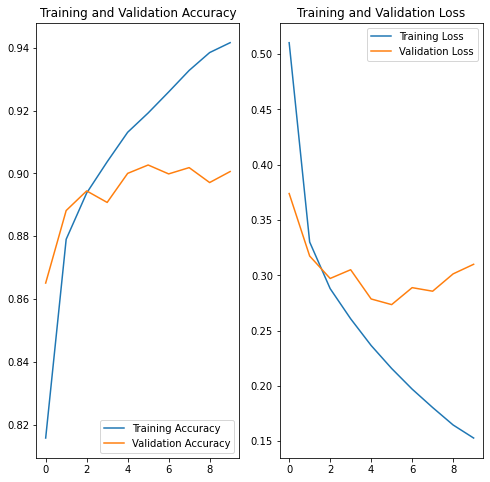

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

플롯에서 볼 수 있듯이 훈련 정확성과 검증 정확성은 큰 차이가 있으며, 모델은 검증 세트에서 약 60%의 정확성까지만 도달합니다.

무엇이 잘못되었는지 살펴보고 모델의 전반적인 성능을 향상해 보겠습니다.

## 과대적합

위의 플롯에서 훈련 정확성은 시간이 지남에 따라 선형적으로 증가하는 반면, 검증 정확성은 훈련 과정에서 약 60%를 벗어나지 못합니다. 또한 훈련 정확성과 검증 정확성 간의 정확성 차이가 상당한데, 이는 [과대적합](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)의 징후입니다.

훈련 예제가 적을 때 모델은 새로운 예제에서 모델의 성능에 부정적인 영향을 미치는 정도까지 훈련 예제의 노이즈나 원치 않는 세부까지 학습합니다. 이 현상을 과대적합이라고 합니다. 이는 모델이 새 데이터세트에서 일반화하는 데 어려움이 있음을 의미합니다.

훈련 과정에서 과대적합을 막는 여러 가지 방법들이 있습니다. 이 튜토리얼에서는 *데이터 증강*을 사용하고 모델에 *드롭아웃*을 추가합니다.

## 데이터 증강

과대적합은 일반적으로 훈련 예제가 적을 때 발생합니다. [데이터 증강](https://www.tensorflow.org/tutorials/images/data_augmentation)은 증강한 다음 믿을 수 있는 이미지를 생성하는 임의 변환을 사용하는 방법으로 기존 예제에서 추가 훈련 데이터를 생성하는 접근법을 취합니다. 그러면 모델이 데이터의 더 많은 측면을 파악하게 되므로 일반화가 더 쉬워집니다.

여기서는 실험적인 [Keras 전처리 레이어](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/?version=nightly)를 사용하여 데이터 증강을 구현합니다. 이들 레이어는 다른 레이어와 마찬가지로 모델 내에 포함될 수 있으며, GPU에서 실행됩니다.

In [18]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

동일한 이미지에 데이터 증강을 여러 번 적용하여 몇 가지 증강된 예제가 어떻게 보이는지 시각화하겠습니다.

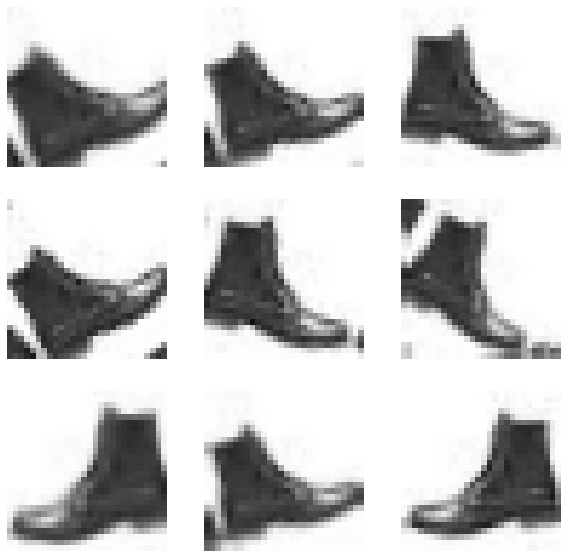

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

잠시 후에 데이터 증강을 사용하여 모델을 훈련하겠습니다.

## 드롭아웃

과대적합을 줄이는 또 다른 기술은 *정규화*의 한 형태인 [드롭아웃](https://developers.google.com/machine-learning/glossary#dropout_regularization)을 네트워크에 도입하는 것입니다.

드롭아웃을 레이어에 적용하면, 훈련 프로세스 중에 레이어에서 여러 출력 단위가 무작위로 드롭아웃됩니다(활성화를 0으로 설정). 드롭아웃은 0.1, 0.2, 0.4 등의 형식으로 소수를 입력 값으로 사용합니다. 이는 적용된 레이어에서 출력 단위의 10%, 20% 또는 40%를 임의로 제거하는 것을 의미합니다.

`layers.Dropout`을 사용하여 새로운 신경망을 생성한 다음, 증강 이미지를 사용하여 훈련해 보겠습니다.

In [20]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## 모델 컴파일 및 훈련하기

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 28, 28, 3)         0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)         

In [23]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
1500/1500 [==============================] - 105s 69ms/step - loss: 1.0685 - accuracy: 0.6047 - val_loss: 0.5766 - val_accuracy: 0.7846
Epoch 2/15
1500/1500 [==============================] - 126s 84ms/step - loss: 0.6100 - accuracy: 0.7756 - val_loss: 0.4837 - val_accuracy: 0.8184
Epoch 3/15
1500/1500 [==============================] - 98s 65ms/step - loss: 0.5300 - accuracy: 0.8027 - val_loss: 0.4474 - val_accuracy: 0.8317
Epoch 4/15
1500/1500 [==============================] - 110s 74ms/step - loss: 0.4886 - accuracy: 0.8188 - val_loss: 0.4264 - val_accuracy: 0.8377
Epoch 5/15
1500/1500 [==============================] - 97s 64ms/step - loss: 0.4662 - accuracy: 0.8276 - val_loss: 0.3872 - val_accuracy: 0.8545
Epoch 6/15
1500/1500 [==============================] - 88s 59ms/step - loss: 0.4391 - accuracy: 0.8396 - val_loss: 0.4065 - val_accuracy: 0.8489
Epoch 7/15
1500/1500 [==============================] - 106s 71ms/step - loss: 0.4203 - accuracy: 0.8458 - val_loss: 0.37

## 훈련 결과 시각화하기

데이터 증강 및 드롭아웃을 적용한 후, 이전보다 과대적합이 줄어들고 훈련 및 검증 정확성이 더 가깝게 조정됩니다. 

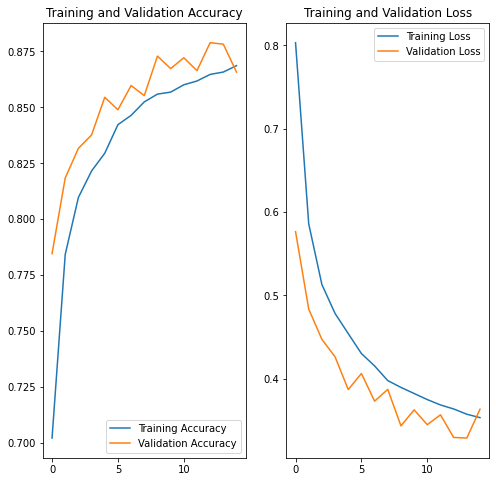

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 새로운 데이터로 예측하기

마지막으로, 모델을 사용하여 훈련 또는 검증 세트에 포함되지 않은 이미지를 분류해 보겠습니다.

참고: 데이터 증강 및 드롭아웃 레이어는 추론 시 비활성화됩니다.

In [25]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

122880/117948 [===============================] - 0s 0us/step
This image most likely belongs to Pullover with a 85.18 percent confidence.
